# Calculating the LSD profiles

## 0 Packages and data

In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

In [2]:
import LSDpy.lsdpy as lsdpy

In [3]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages

loading specpolFlow package


In [4]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [5]:
import itertools

### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")


## Graph of line masks for comparison (one case)

There is also a table in Pandas format at the end, to compare the numerical values



In [6]:
Observations

1  Unnamed: 1  Unnamed: 2       Name        LSDfileName     NameAsif  \
0    185         1.0           1     hd6226     hd6226_1.lsd.s     hd6226_1   
1    193         2.0           1     hd7636     hd7636_1.lsd.s     hd7636_1   
2    194         2.0           2     hd7636     hd7636_2.lsd.s     hd7636_2   
3      2         3.0           1    hd10144    hd10144_1.lsd.s    hd10144_1   
4      3         4.0           1    hd10516    hd10516_1.lsd.s    hd10516_1   
..   ...         ...         ...        ...                ...          ...   
196  137        74.0           1   hd221507   hd221507_1.lsd.s   hd221507_1   
197  140        75.0           1   hd224686   hd224686_1.lsd.s   hd224686_1   
198  141        75.0           2   hd224686   hd224686_2.lsd.s   hd224686_2   
199  145        76.0           1   hd239712   hd239712_1.lsd.s   hd239712_1   
200    1        77.0           1  bd-134933  bd-134933_1.lsd.s  bd-134933_1   

                          NameOfMask  Unnamed: 7  \
0    mask_T15000g40lamb3700_9000.dat           0   
1    mask_T15000g40lamb3700_9000.dat           0   
2    mask_T15000g40lamb3700_9000.dat           0   
3    mask_T20000g35lamb3700_9000.dat           1   
4    mask_T25000g40lamb3700_9000.dat           0   
..                               ...         ...   
196  mask_T10500g40lamb3700_9000.dat           1   
197  mask_T13000g40lamb3700_9000.dat           1   
198  mask_T13000g40lamb3700_9000.dat           1   
199  mask_T21000g40lamb3700_9000.dat           0   
200  mask_T30000g40lamb3700_9000.dat           0   

                     NameOfSymbolicLinkToData  Unnamed: 9  Unnamed: 10  \
0                  hd6226_11AP14_1310132pnv.s      110.34   -60.297909   
1                  hd7636_11AP14_1314767pnv.s      230.00     0.000000   
2                  hd7636_11AP14_1316457pnv.s      230.00     0.000000   
3     hd10144_187.D-0917A_2011-12-11_01_pnv.s      245.31    12.981952   
4                 hd10516_11AP14_1311181pnv.s      382.04   -60.990786   
..                                        ...         ...          ...   
196  hd221507_187.D-0917A_2012-07-19_01_pnv.s       20.00     0.000072   
197  hd224686_187.D-0917A_2011-12-09_01_pnv.s      286.16    11.694301   
198  hd224686_187.D-0917A_2011-12-12_01_pnv.s      286.16     8.724928   
199              hd239712_11BP14_1331344pnv.s      304.86    -0.002959   
200              bd-134933_06BF15_861711pnv.s      239.56    -0.001092   

     Unnamed: 11  
0     -70.000000  
1       0.000000  
2       0.000000  
3      12.981952  
4     -60.990786  
..           ...  
196     0.000072  
197    11.694301  
198     8.724928  
199    -0.002959  
200    -0.001092  

[201 rows x 12 columns]

In [8]:
#hd = 'hd148184' # A star with a lot of emission
hd = 'hd189687' # A well behaved star
star = StarData[StarData["Name"]==hd]

obs = Observations[Observations["Name"] == hd]

o = 1
ob = obs[obs["Unnamed: 2"]==o]

star
ob

modelcode = star["ModelCode"].item().upper()
maskUS = path+'/02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_depth0.02.mask'.format(modelcode)
maskAsifClean = path+'/00-InputMaterial/AsifMaskClean/{}_clean_{}.mask'.format(hd,o)
maskAsifCleanTweak = path+'/00-InputMaterial/AsifMaskCleanTweak/{}_clean_{}.mask_auto_twk'.format(hd,o)

synth_name = path+'/01-Synth-calculations/Synth-hybrid-spectra/{}_{}_noise.s'.format(hd, o)
obs_name = path+'/00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(hd, o)

mk_AsifClean = pol.iolsd.read_mask(fname=maskAsifClean)
mk_AsifCleanTweak = pol.iolsd.read_mask(fname=maskAsifCleanTweak)
mk_US = pol.iolsd.read_mask(fname=maskUS)

spec_obs = pol.iolsd.read_spectrum(obs_name)
spec_synth = pol.iolsd.read_spectrum(synth_name)

(0.9, 1.1)

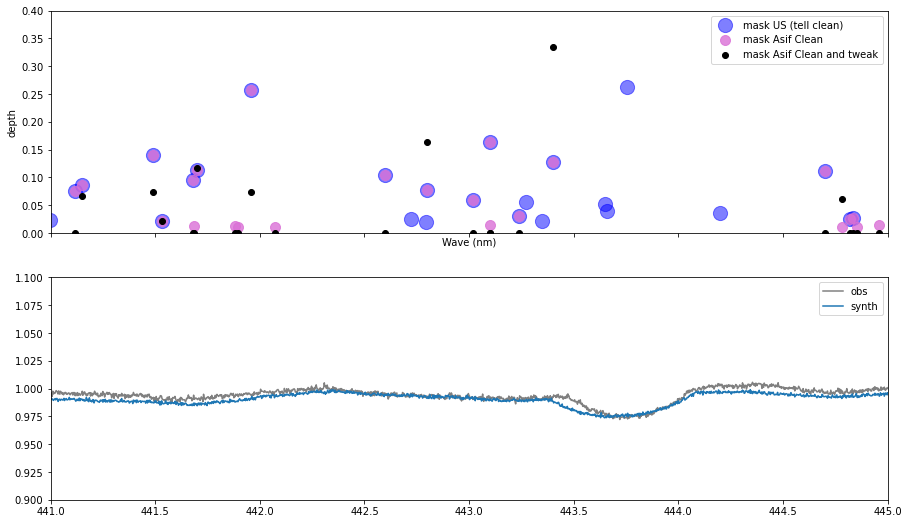

In [9]:
fig, ax = plt.subplots(2,1, figsize=(15,9), sharex=True)
ax[0].set_ylabel('depth')
ax[0].set_xlabel('Wave (nm)')
n = mk_US.iuse == 1
ax[0].scatter(mk_US.wl[n], mk_US.depth[n], label='mask US (tell clean)', s=200, alpha=0.5, c='blue')

n = mk_AsifClean.iuse == 1
ax[0].scatter(mk_AsifClean.wl[n], mk_AsifClean.depth[n], label='mask Asif Clean', s=100, alpha=0.8, c='orchid')

n = mk_AsifClean.iuse == 1
ax[0].scatter(mk_AsifCleanTweak.wl[n], mk_AsifCleanTweak.depth[n], label='mask Asif Clean and tweak', c='k')

ax[0].legend(loc=0)
ax[0].set_ylim(0,0.4)
#ax[0].set_xlim(420,455)
ax[0].set_xlim(441,445)

ax[1].plot(spec_obs.wl, spec_obs.specI, c='0.5', label='obs')
ax[1].plot(spec_synth.wl, spec_synth.specI, label='synth')
ax[1].legend(loc=0)
ax[1].set_ylim(0.9,1.1)

In [10]:
import pandas as pd

n = mk_US.wl>=441
nA = mk_AsifClean.wl >=441
nAT = mk_AsifCleanTweak.wl >=441

t = 15

dic = {
       'US wl':mk_US.wl[n][0:t],
       'US el':mk_US.element[n][0:t],
       'US d':mk_US.depth[n][0:t],
       'US iuse':mk_US.iuse[n][0:t],
       'A wl':mk_AsifClean.wl[nA][0:t],
       'A el':mk_AsifClean.element[nA][0:t],
       'A d':mk_AsifClean.depth[nA][0:t],
       'A iuse':mk_AsifClean.iuse[nA][0:t],
       'AT wl':mk_AsifCleanTweak.wl[nA][0:t],
       'AT el':mk_AsifCleanTweak.element[nA][0:t],
       'AT d':mk_AsifCleanTweak.depth[nA][0:t],
       'AT iuse':mk_AsifCleanTweak.iuse[nA][0:t]

       }
toto = pd.DataFrame(dic)


In [11]:
toto

US wl  US el   US d  US iuse      A wl   A el    A d  A iuse     AT wl  \
0   441.1152   6.01  0.075        1  441.0210  26.01  0.015       0  441.0210   
1   441.1510   6.01  0.087        1  441.1152   6.01  0.075       1  441.1152   
2   441.4905   8.01  0.141        1  441.1510   6.01  0.087       1  441.1510   
3   441.5339  16.01  0.022        1  441.4905   8.01  0.141       1  441.4905   
4   441.6819  26.01  0.096        1  441.5339  16.01  0.022       1  441.5339   
5   441.6974   8.01  0.114        1  441.6819  26.01  0.096       1  441.6819   
6   441.9596  26.02  0.258        1  441.6864  16.01  0.012       1  441.6864   
7   442.6001  18.01  0.105        1  441.6974   8.01  0.114       1  441.6974   
8   442.7233   7.01  0.025        1  441.8836  16.02  0.013       1  441.8836   
9   442.7963   7.01  0.020        1  441.8941  26.01  0.011       1  441.8941   
10  442.7994  12.01  0.077        1  441.9596  26.02  0.258       1  441.9596   
11  443.0189  18.01  0.059        1  442.0712  15.01  0.011       1  442.0712   
12  443.1001  26.02  0.164        1  442.6001  18.01  0.105       1  442.6001   
13  443.2368  16.01  0.031        1  442.7994  12.01  0.077       1  442.7994   
14  443.2736   7.01  0.055        1  443.0189  18.01  0.059       1  443.0189   

    AT el    AT d  AT iuse  
0   26.01  0.0150        0  
1    6.01  0.0000        1  
2    6.01  0.0660        1  
3    8.01  0.0745        1  
4   16.01  0.0210        1  
5   26.01  0.0000        1  
6   16.01  0.0000        1  
7    8.01  0.1172        1  
8   16.02  0.0000        1  
9   26.01  0.0000        1  
10  26.02  0.0733        1  
11  15.01  0.0000        1  
12  18.01  0.0000        1  
13  12.01  0.1628        1  
14  18.01  0.0000        1

## Histogram of line depths (one case)

In [13]:
#hd = 'hd148184' # A star with a lot of emission
hd = 'hd189687' # A well behaved star
star = StarData[StarData["Name"]==hd]

obs = Observations[Observations["Name"] == hd]

o = 1
ob = obs[obs["Unnamed: 2"]==o]

star
ob

modelcode = star["ModelCode"].item().upper()
maskUS = path+'/02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_depth0.02.mask'.format(modelcode)
maskAsifClean = path+'/00-InputMaterial/AsifMaskClean/{}_clean_{}.mask'.format(hd,o)
maskAsifCleanTweak = path+'/00-InputMaterial/AsifMaskCleanTweak/{}_clean_{}.mask_auto_twk'.format(hd,o)

synth_name = path+'/01-Synth-calculations/Synth-hybrid-spectra/{}_{}_noise.s'.format(hd, o)
obs_name = path+'/00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(hd, o)

mk_AsifClean = pol.iolsd.read_mask(fname=maskAsifClean)
mk_AsifCleanTweak = pol.iolsd.read_mask(fname=maskAsifCleanTweak)
mk_US = pol.iolsd.read_mask(fname=maskUS)

Text(0.5, 1.0, 'hd189687')

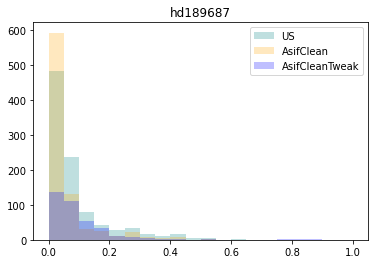

In [14]:
fig, ax = plt.subplots(1,1)

h=ax.hist(mk_US.depth[mk_US.iuse==1], label='US', range=[0,1], bins=20, fc='teal', alpha=0.25)
h=ax.hist(mk_AsifClean.depth[mk_AsifClean.iuse==1], alpha=0.25, label='AsifClean', range=[0,1], bins=20, fc='orange')
h=ax.hist(mk_AsifCleanTweak.depth[np.logical_and(mk_AsifCleanTweak.iuse==1,mk_AsifCleanTweak.depth>=0.0001)],
          label='AsifCleanTweak', range=[0,1], bins=20, fc='blue', alpha=0.25)

ax.legend(loc=0)
ax.set_title(hd)

## PDFs with histograms of line depths for all observations

Original code from Federico

> TODO arrange the paths and run again

C:\Users\pjsta\AppData\Local\Temp/ipykernel_4428/4021396188.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(10,5))


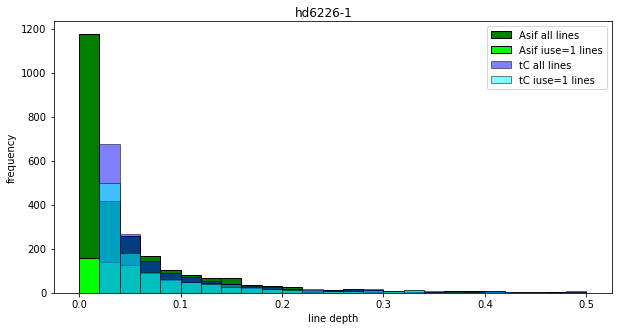

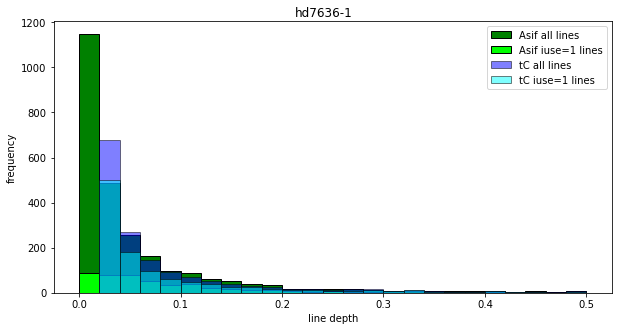

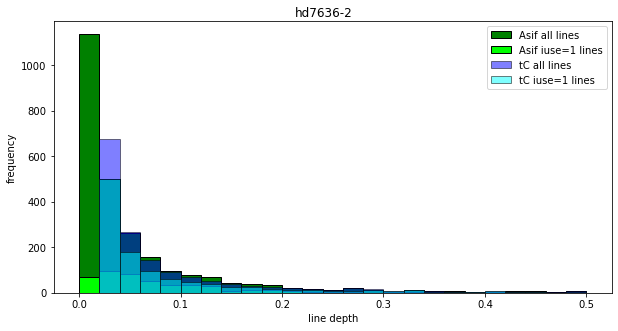

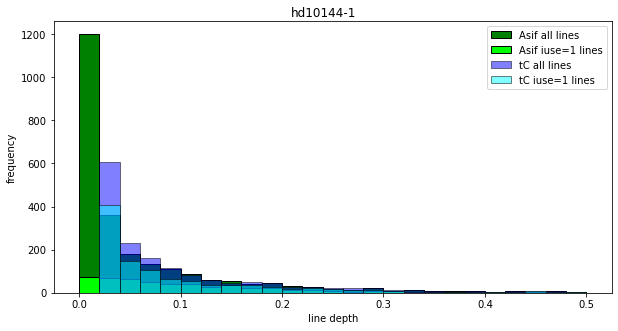

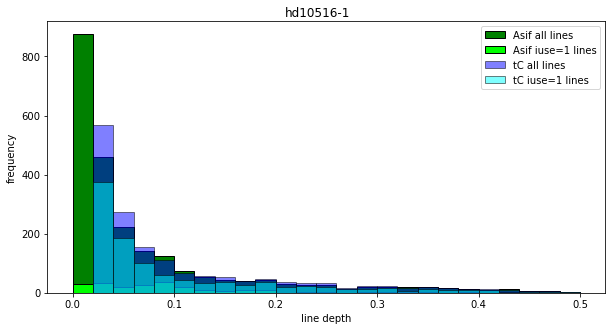

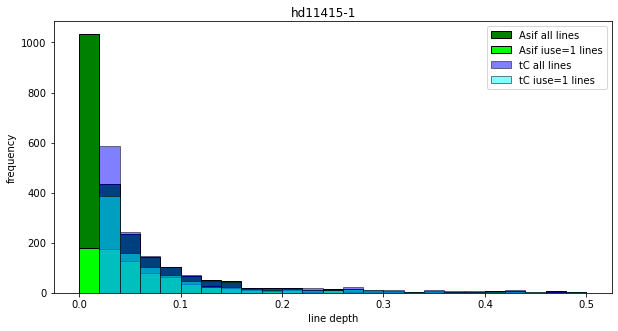

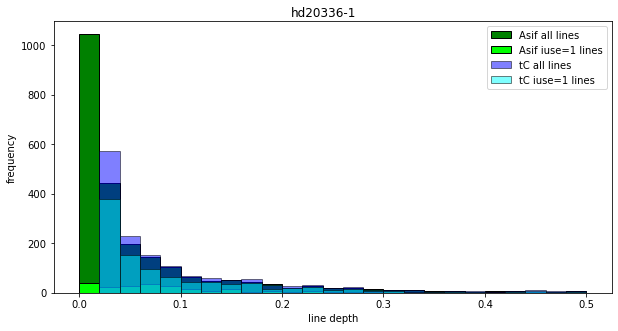

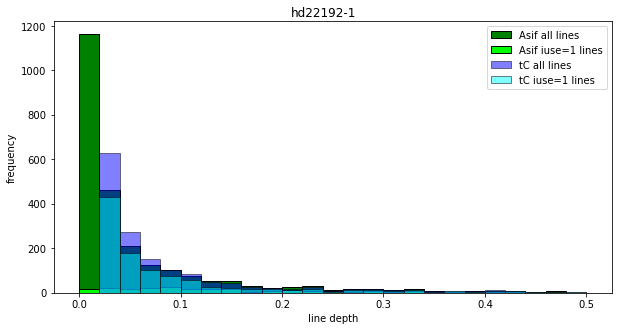

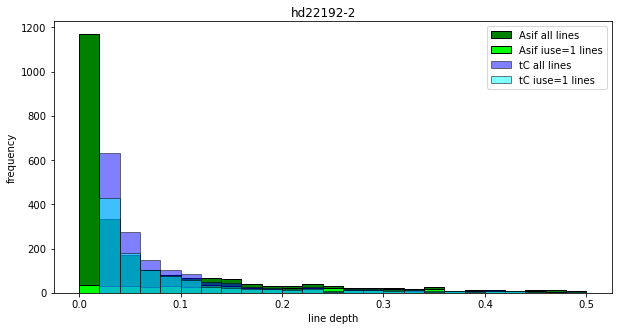

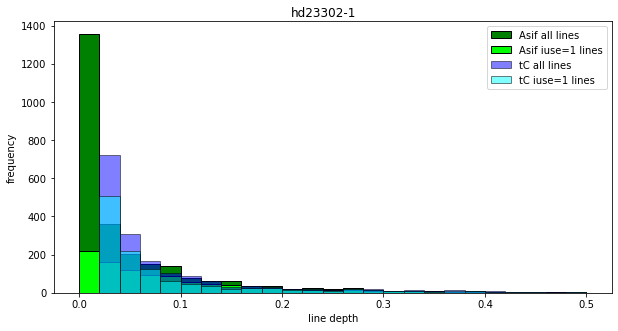

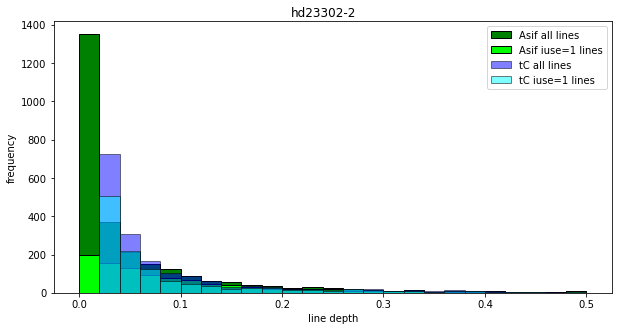

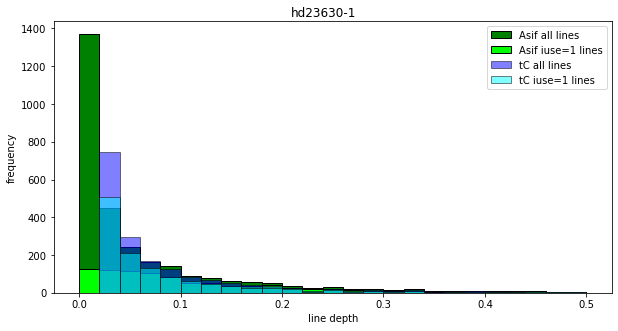

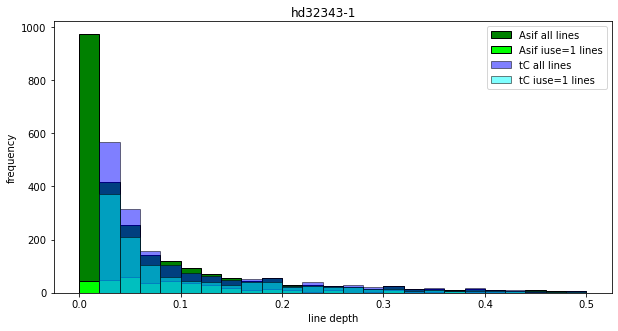

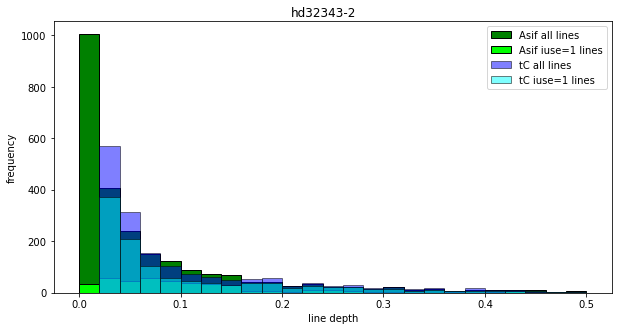

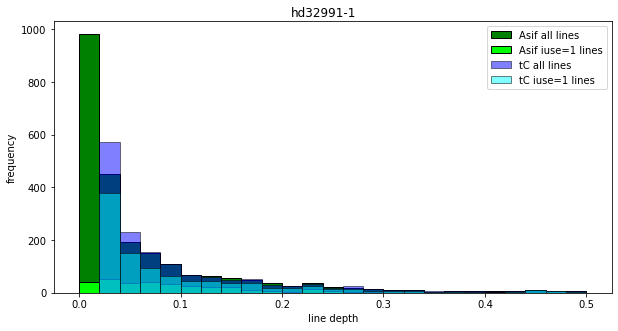

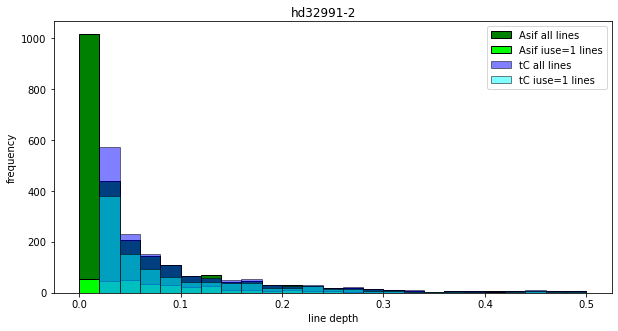

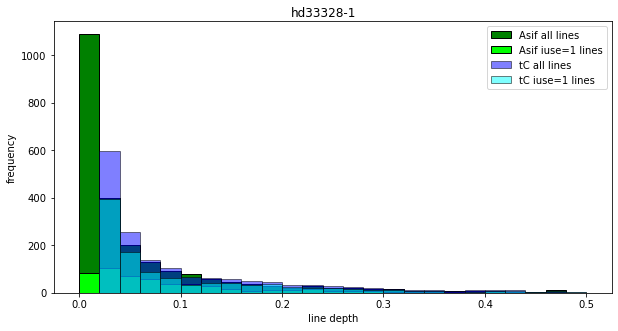

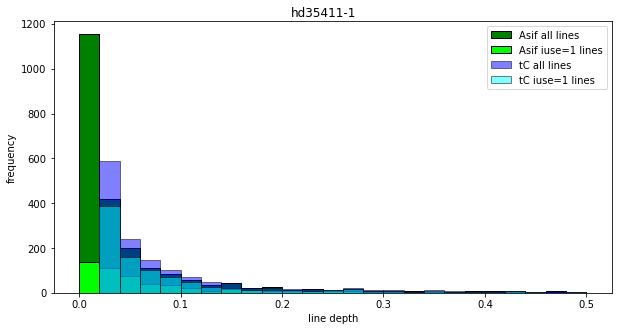

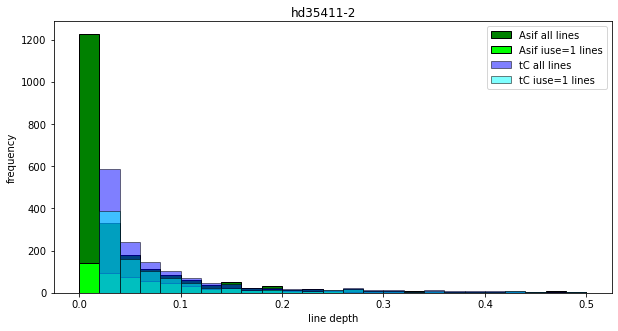

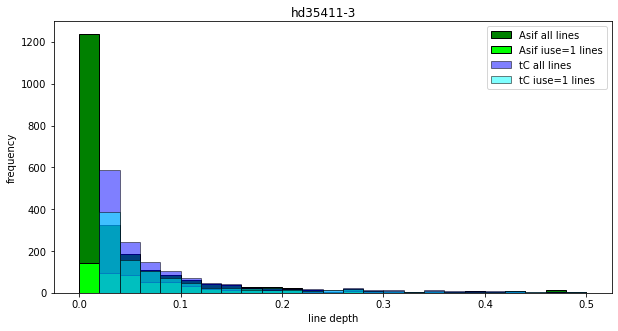

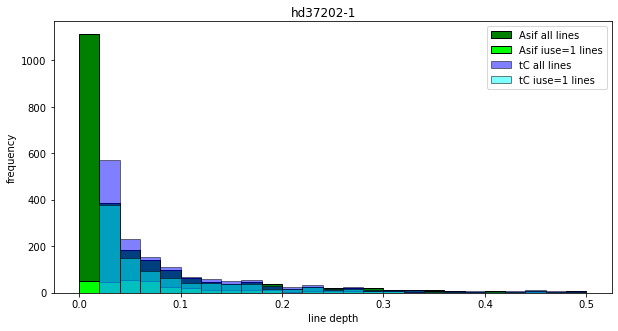

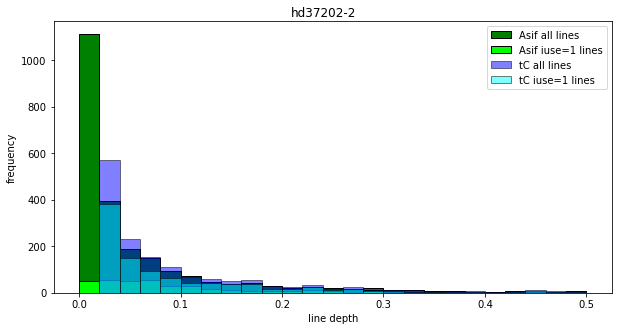

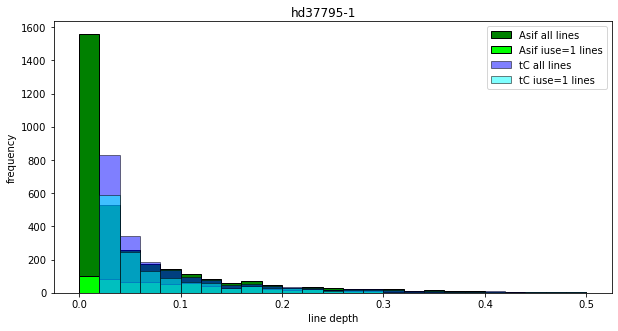

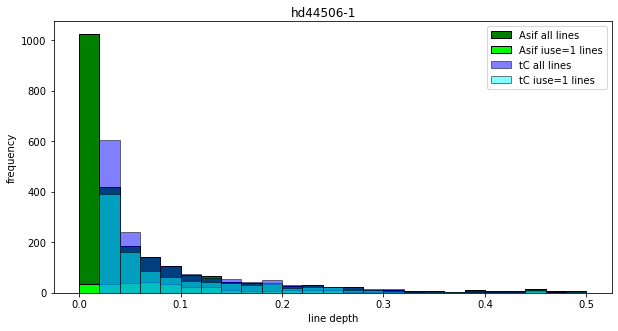

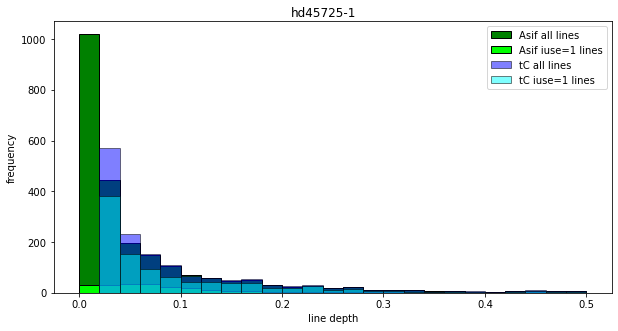

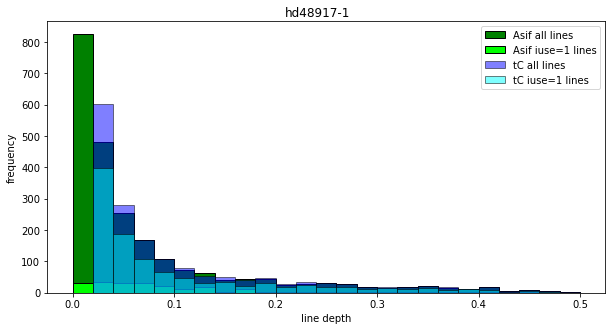

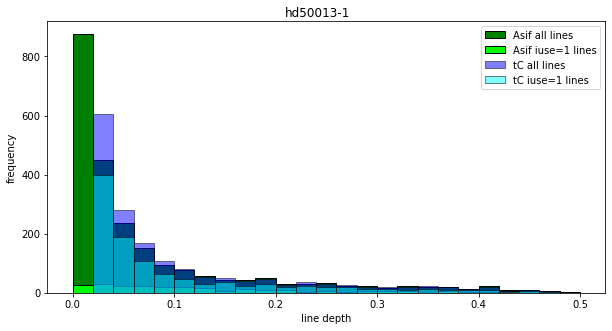

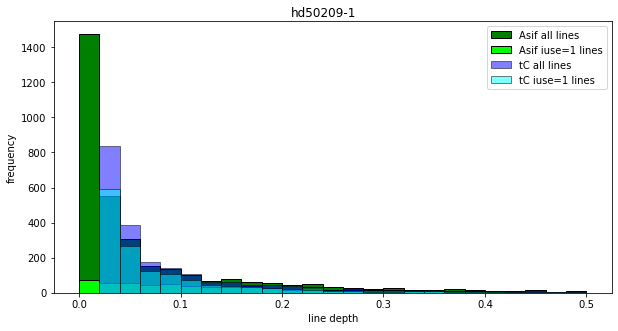

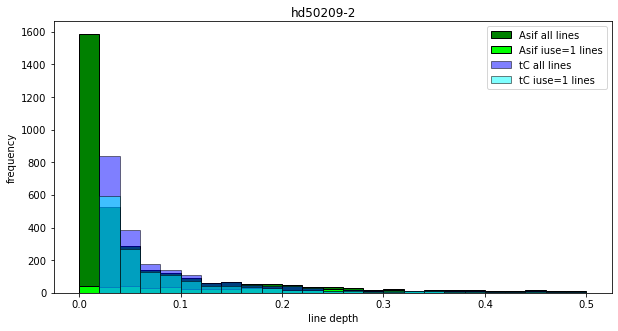

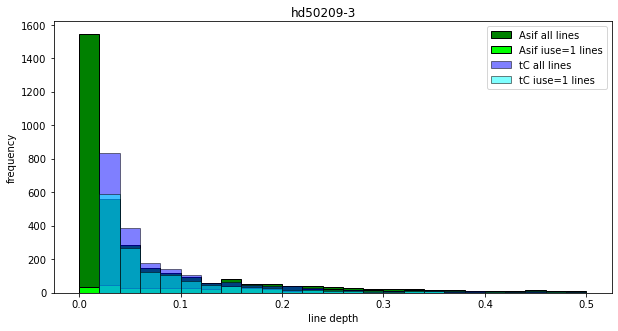

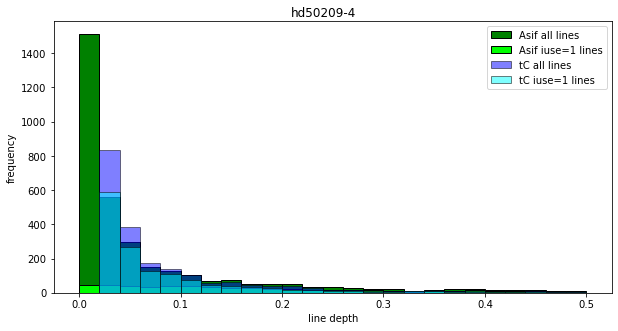

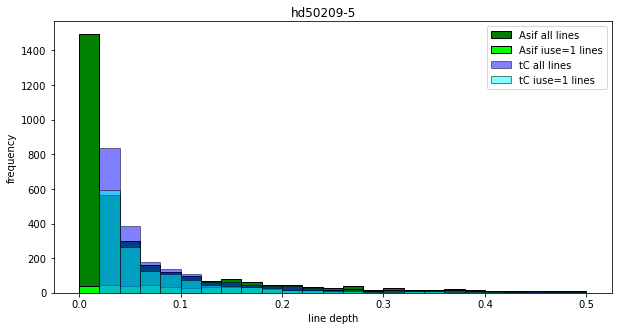

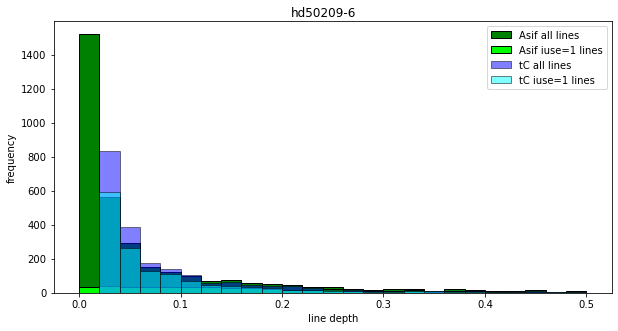

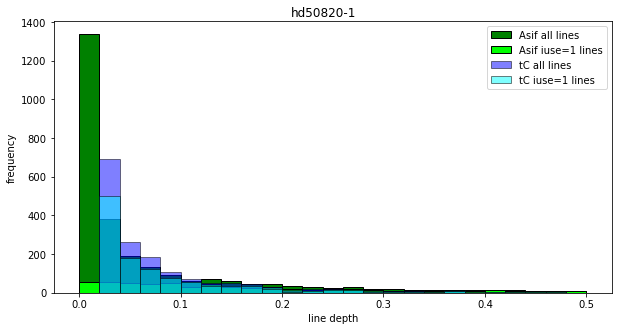

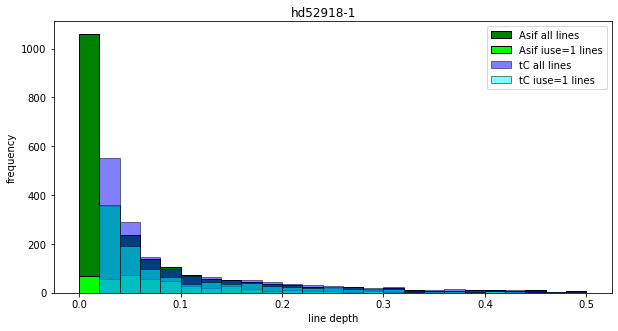

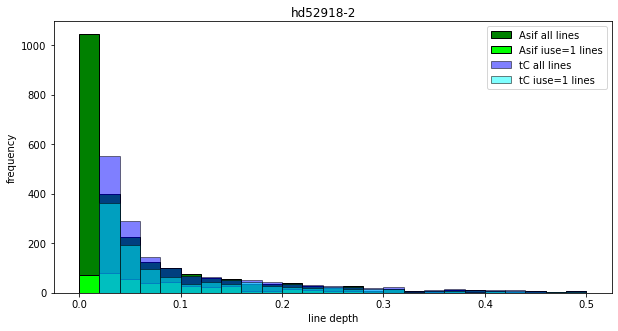

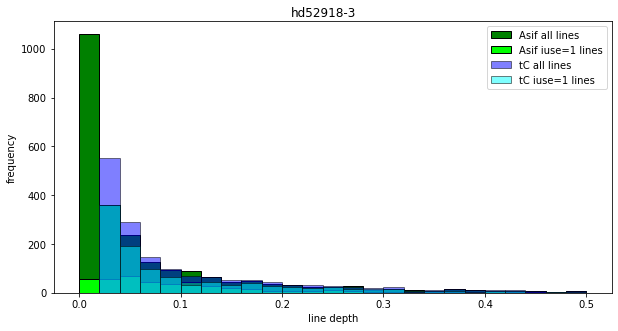

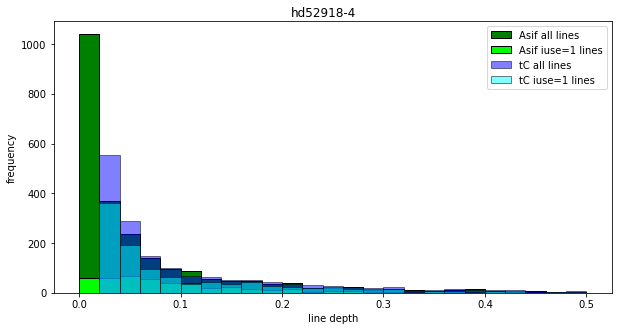

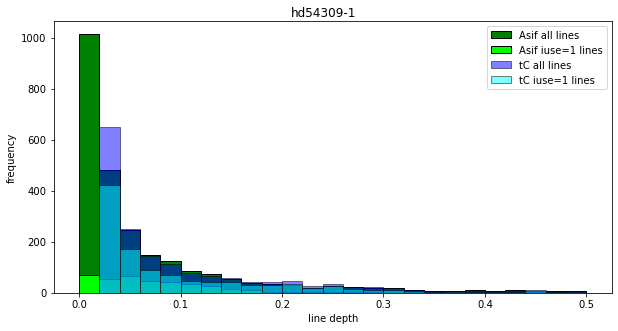

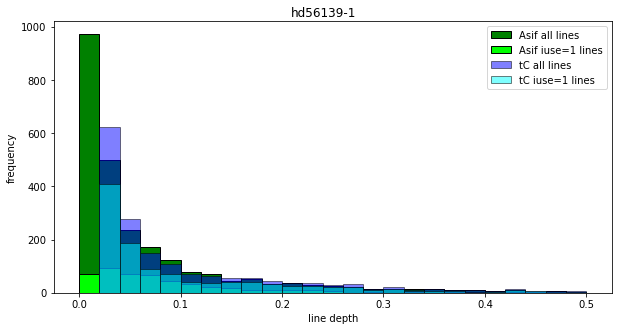

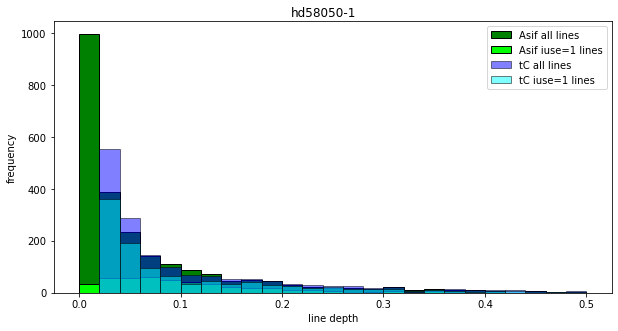

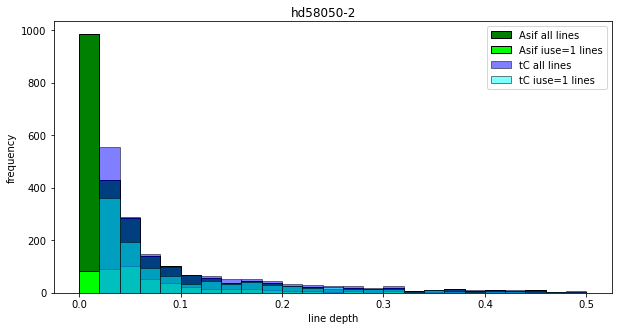

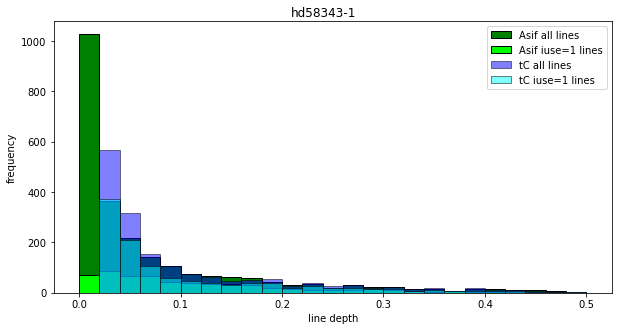

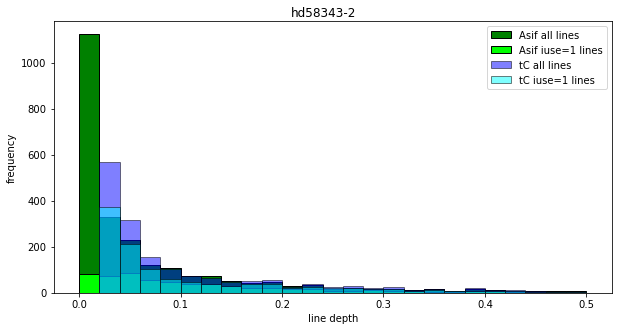

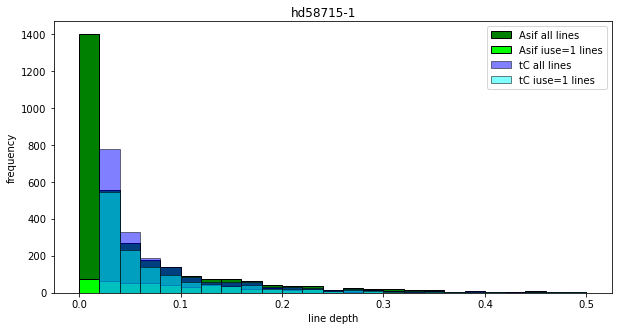

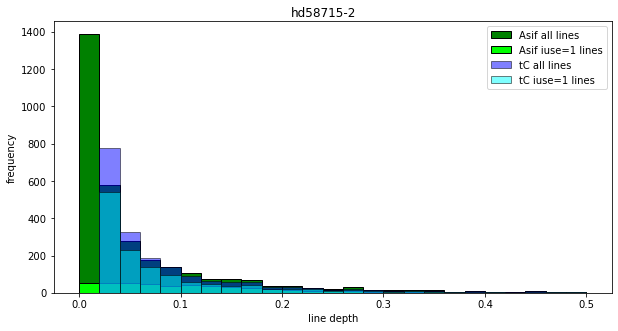

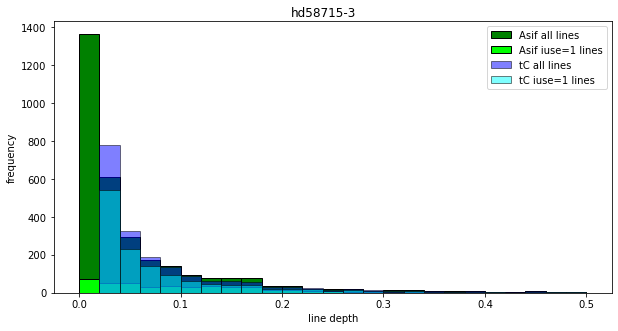

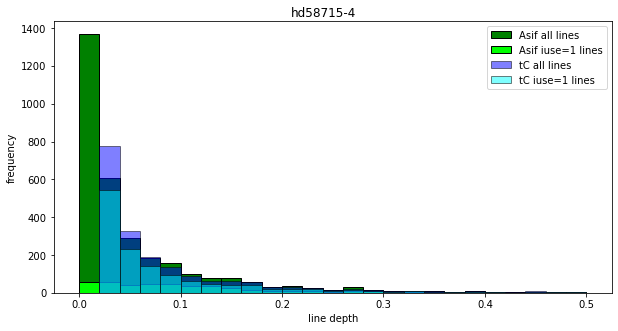

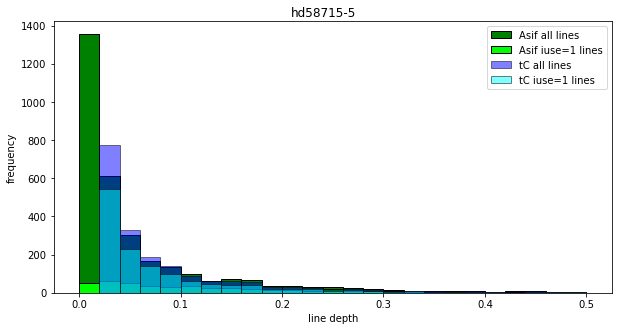

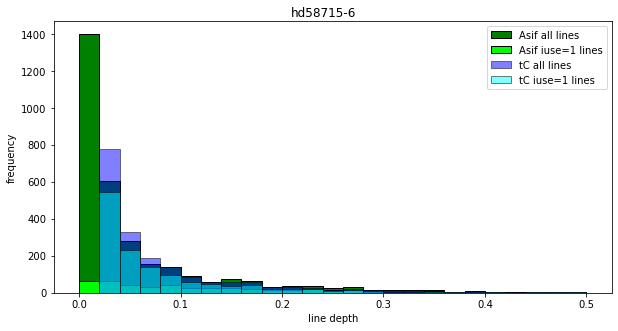

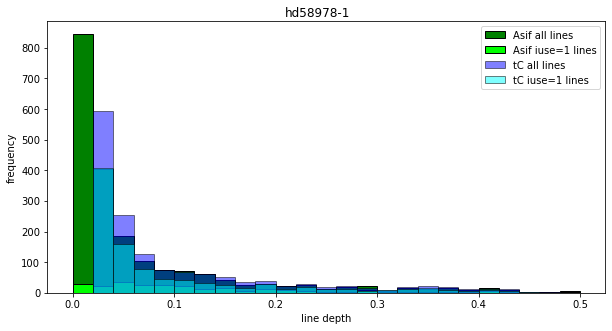

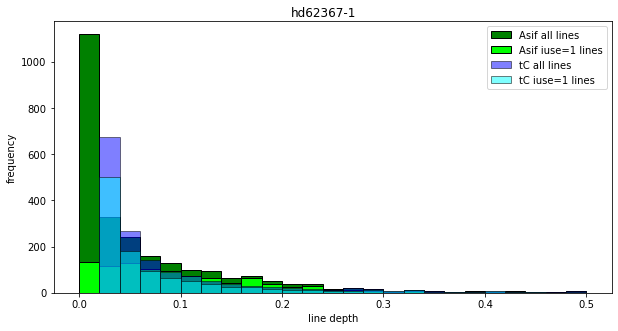

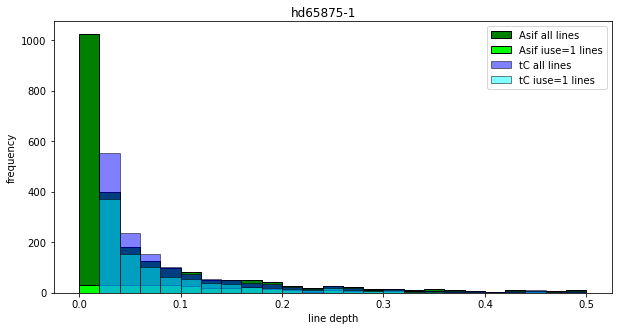

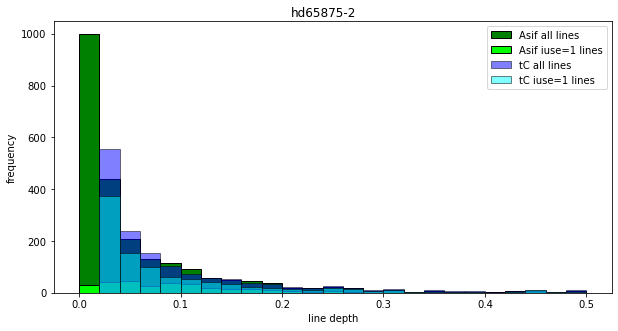

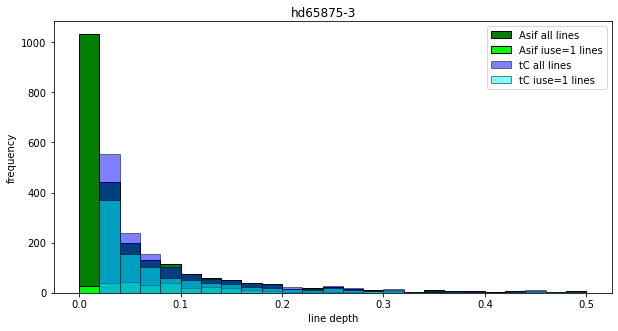

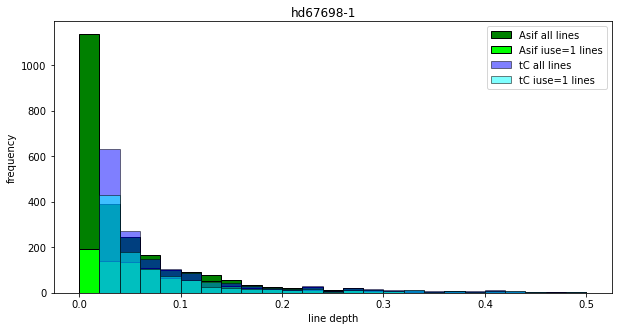

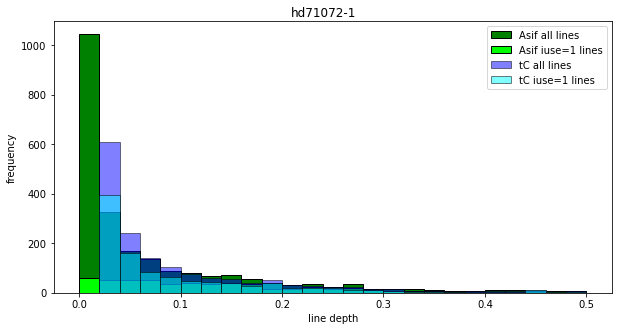

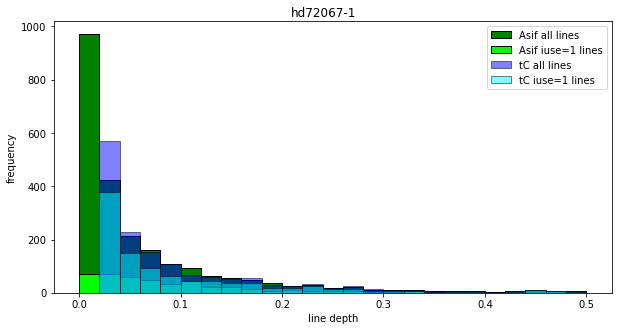

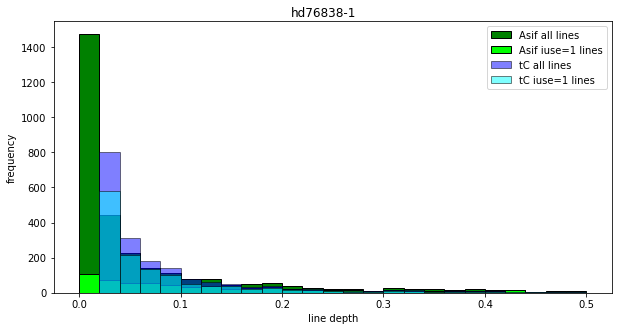

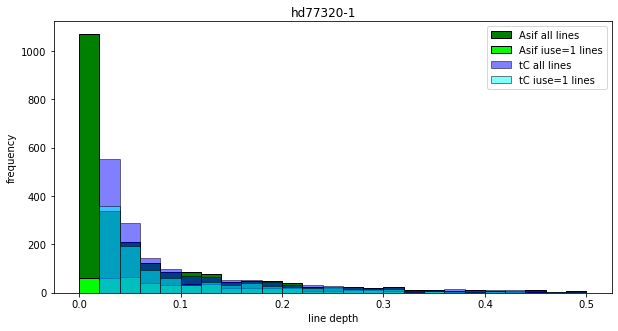

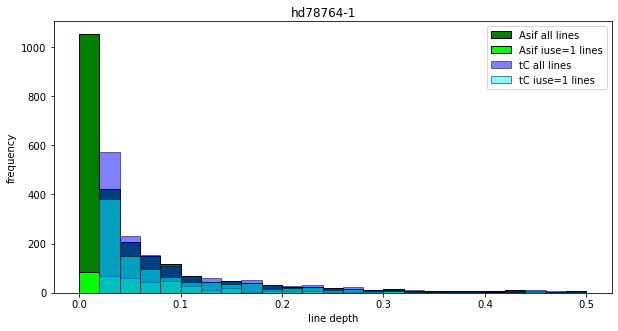

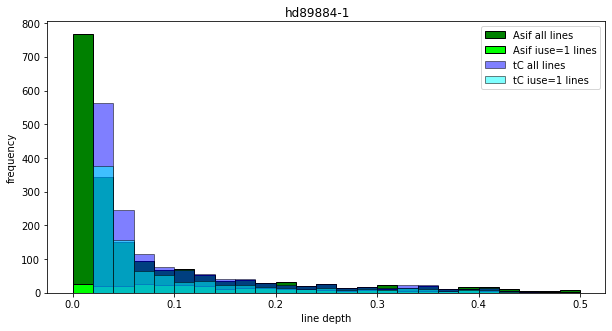

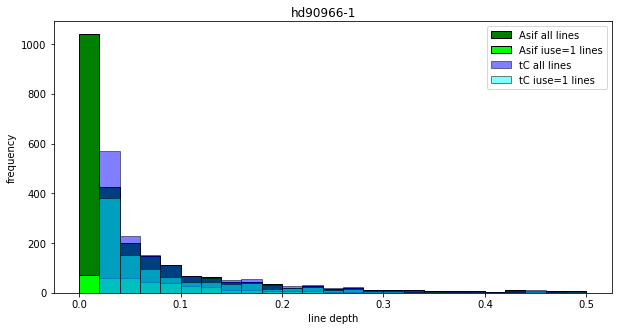

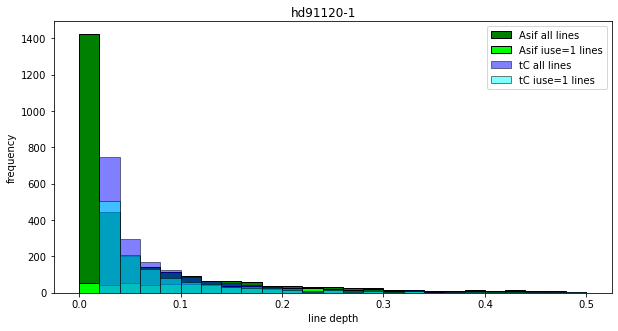

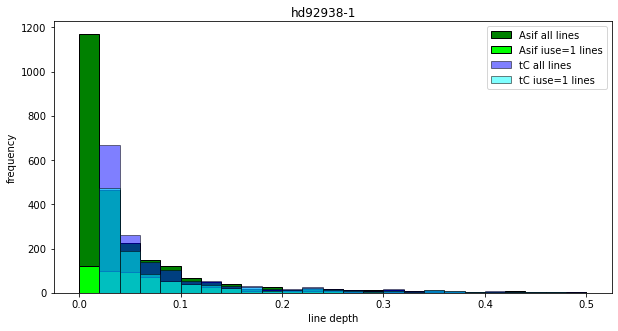

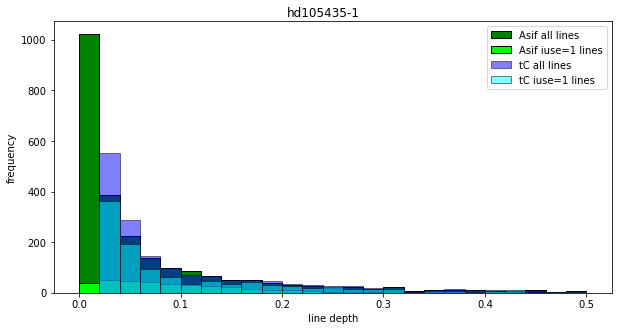

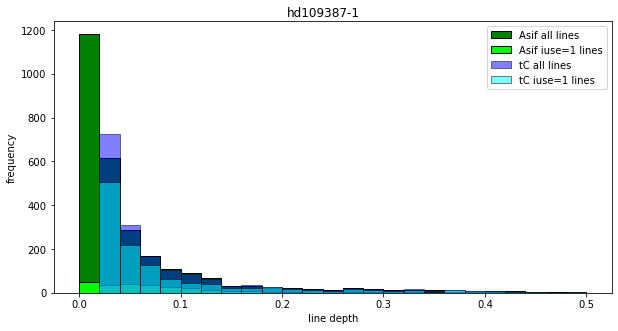

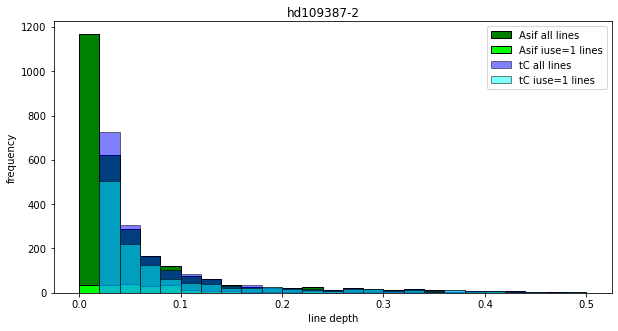

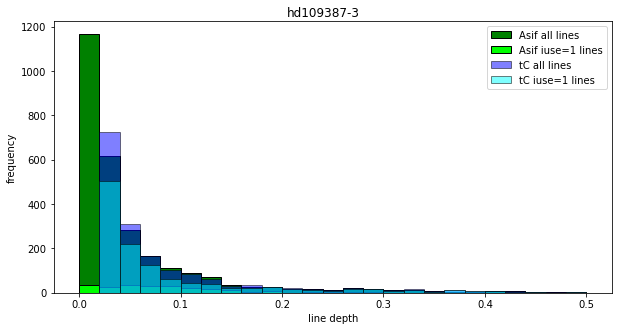

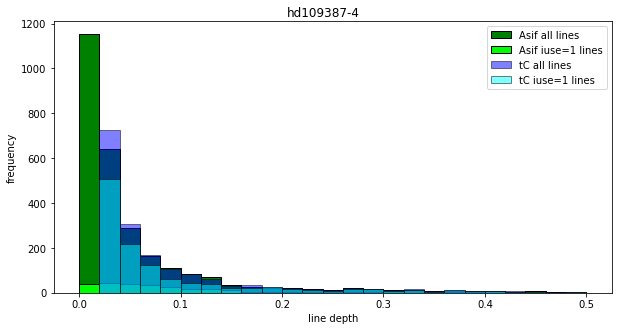

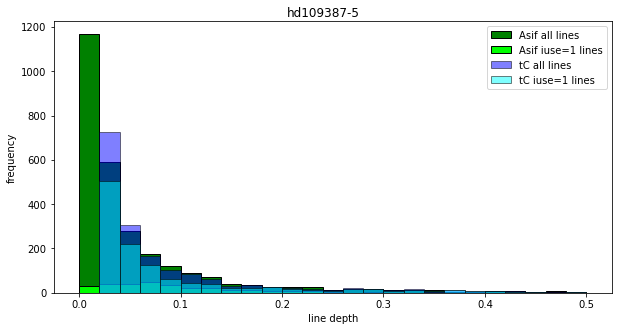

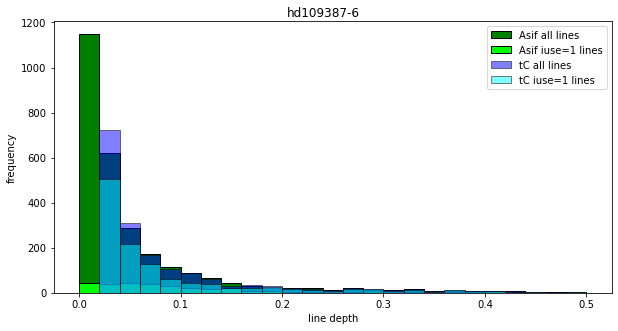

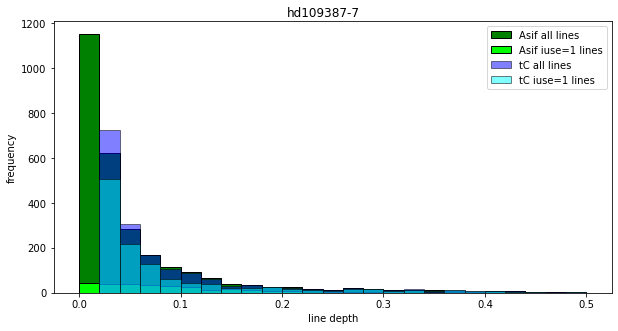

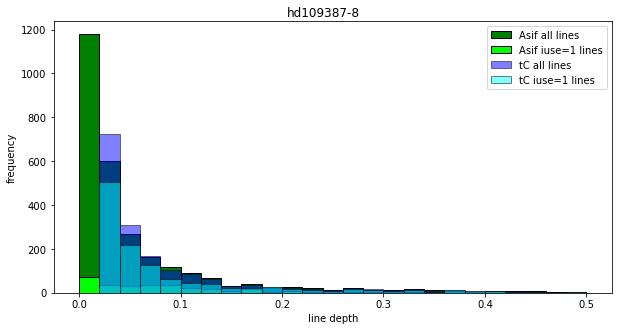

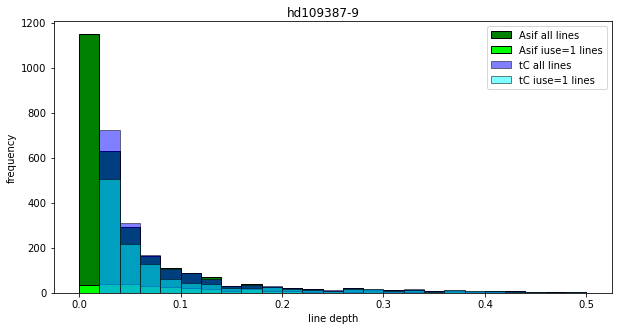

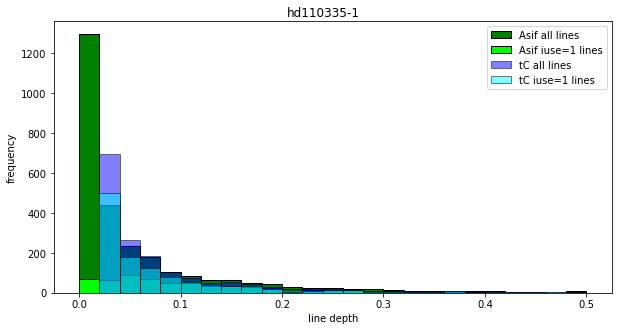

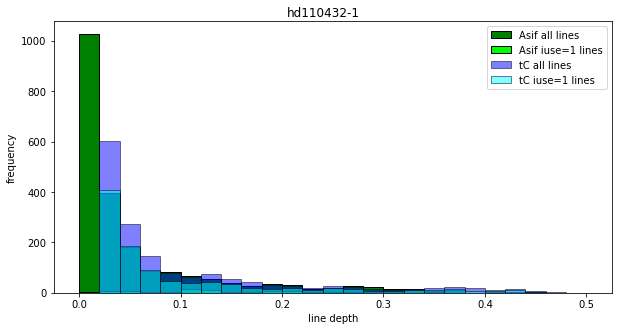

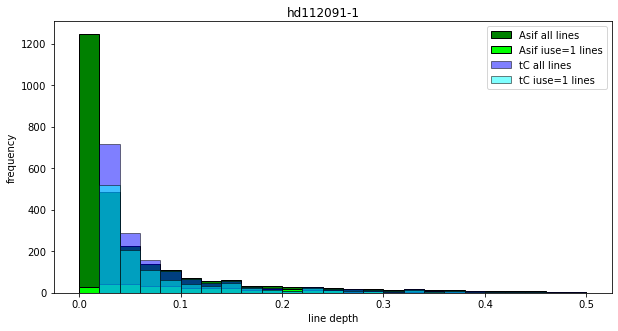

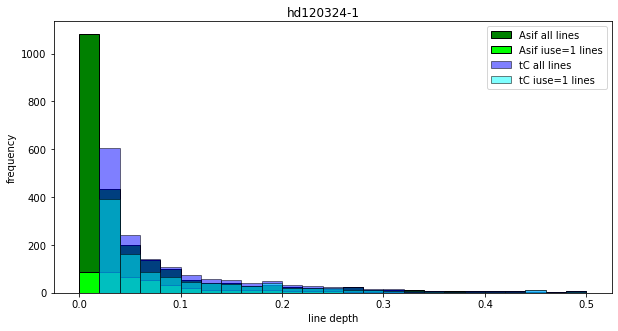

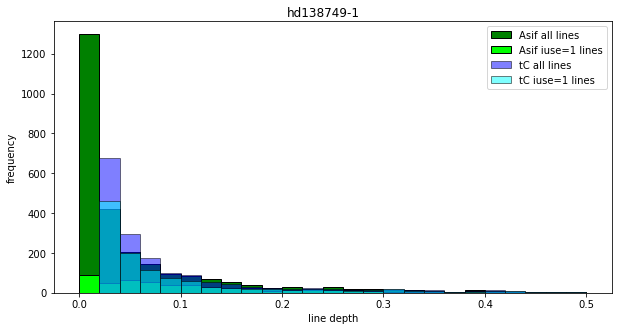

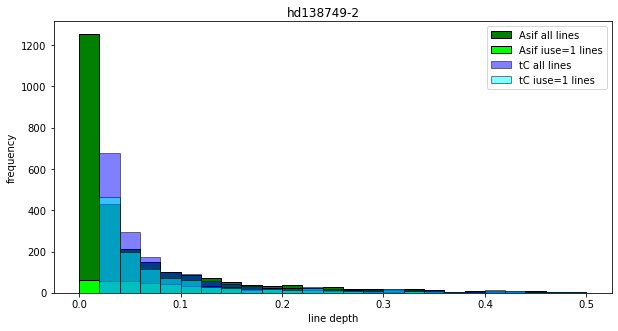

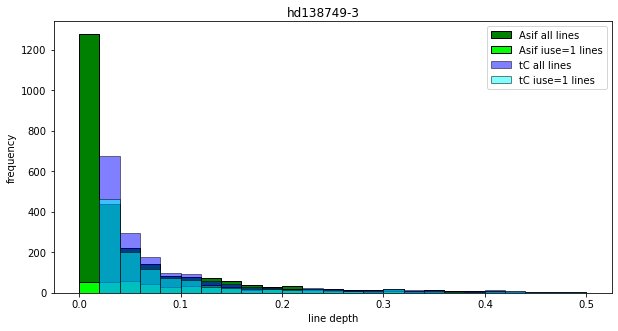

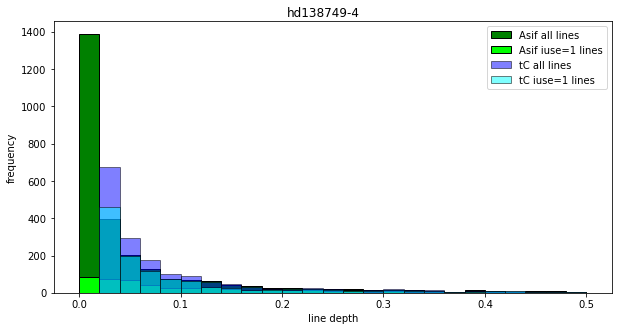

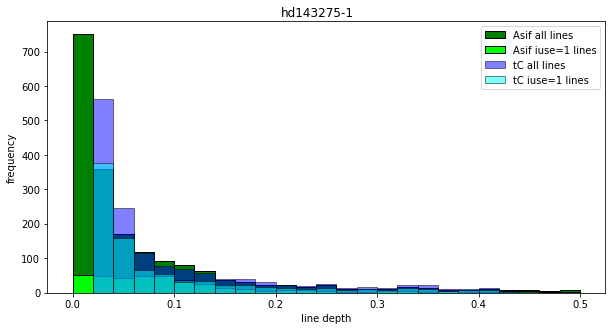

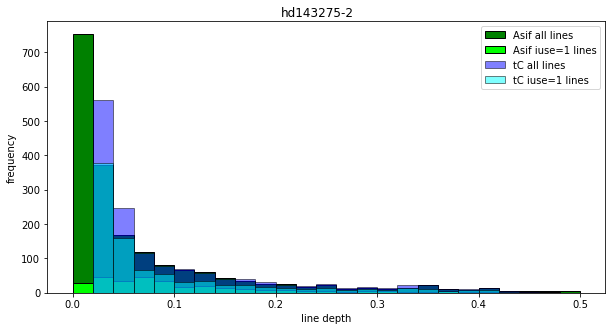

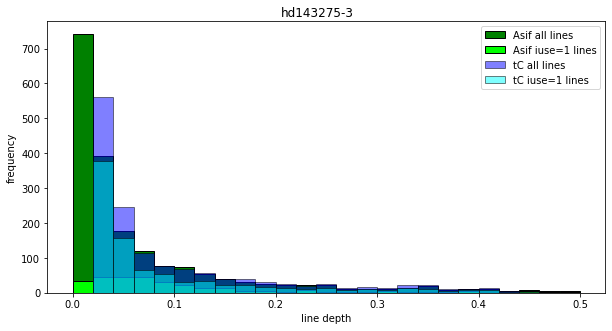

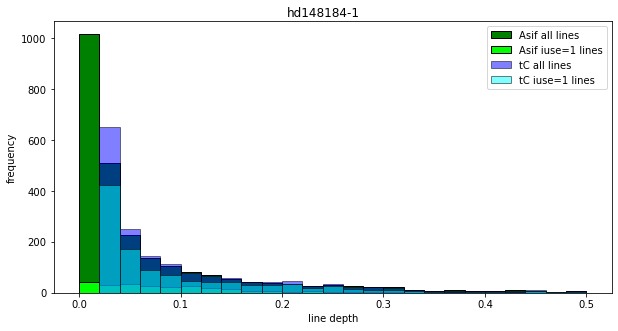

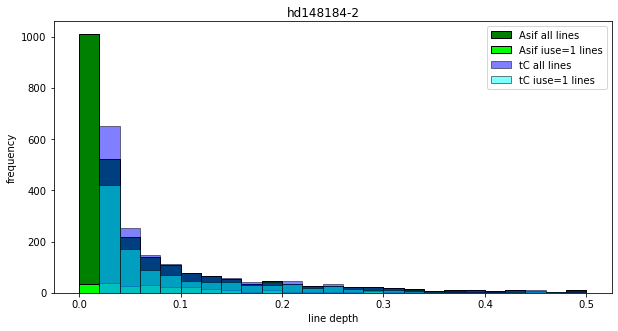

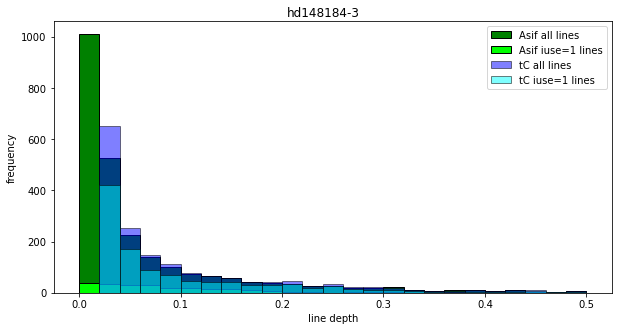

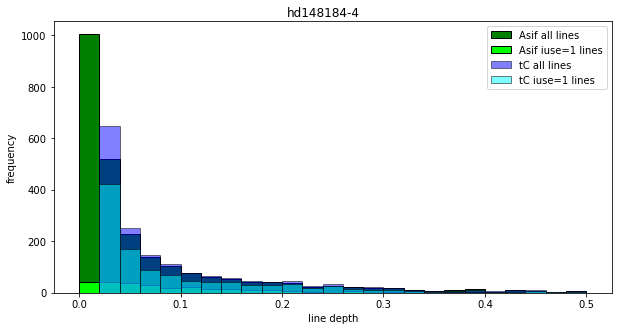

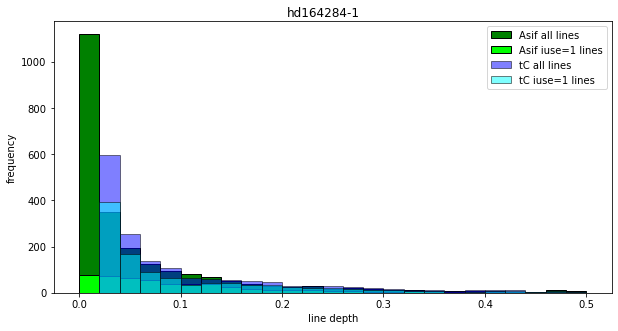

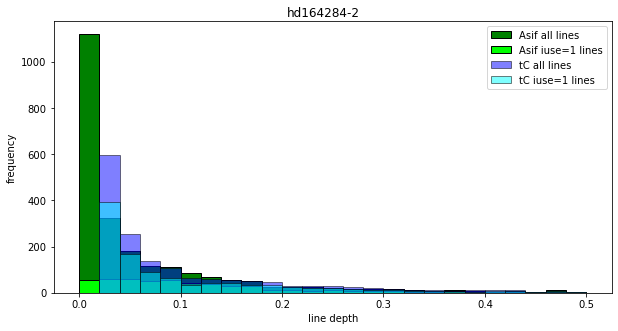

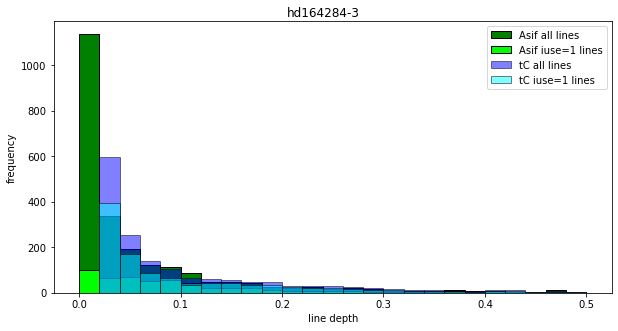

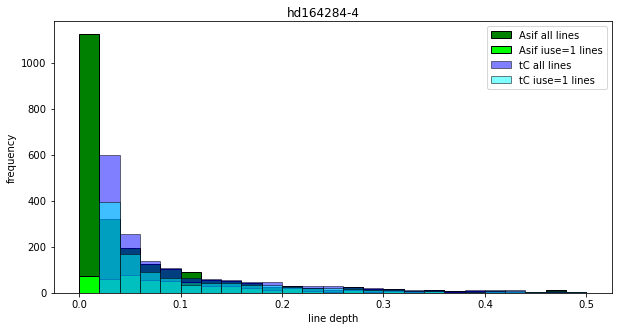

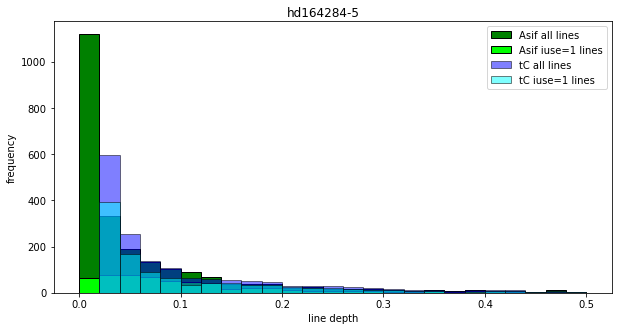

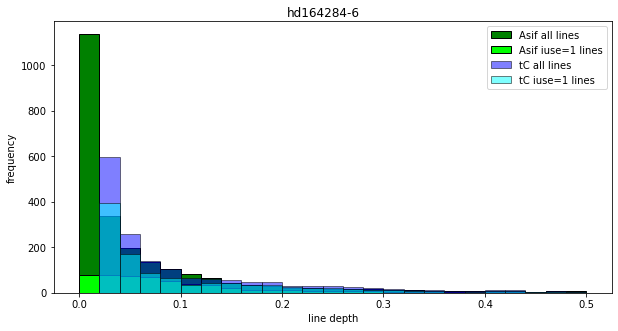

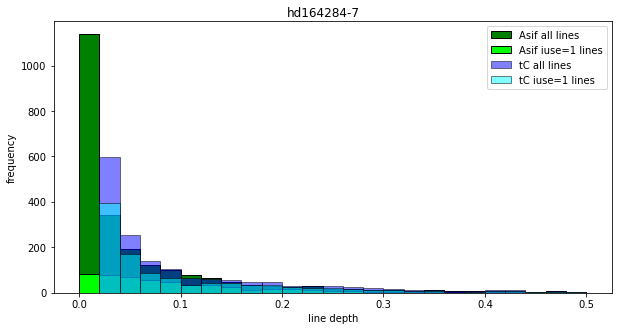

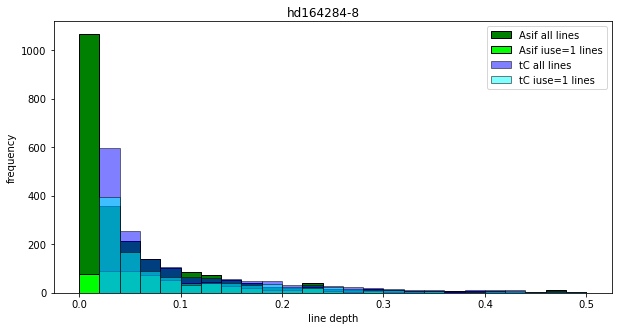

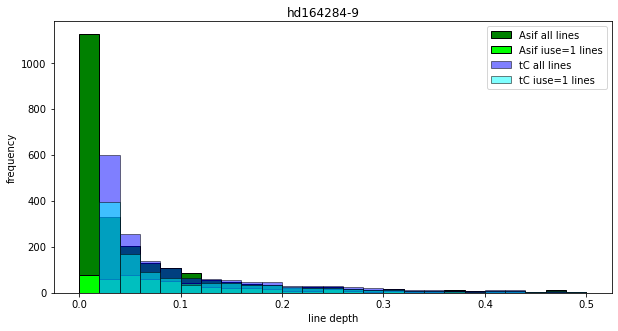

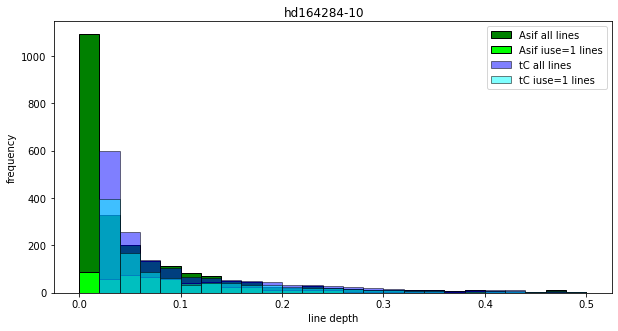

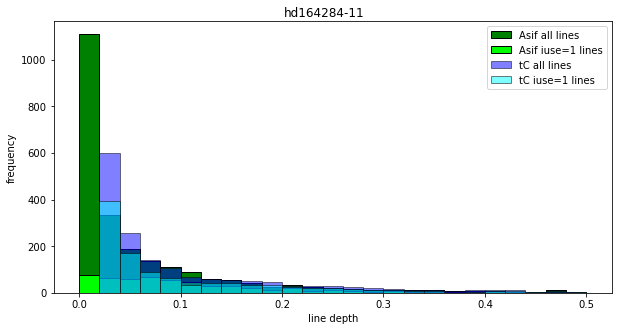

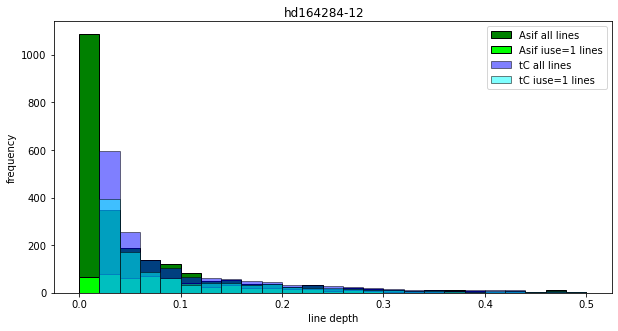

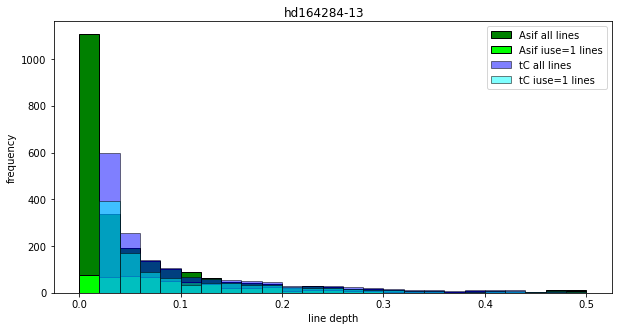

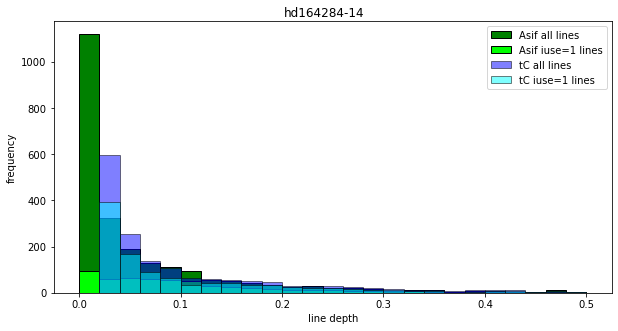

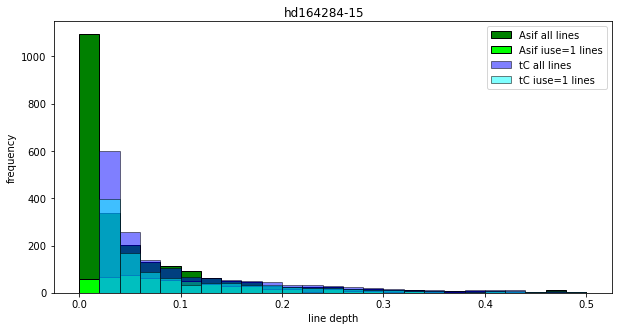

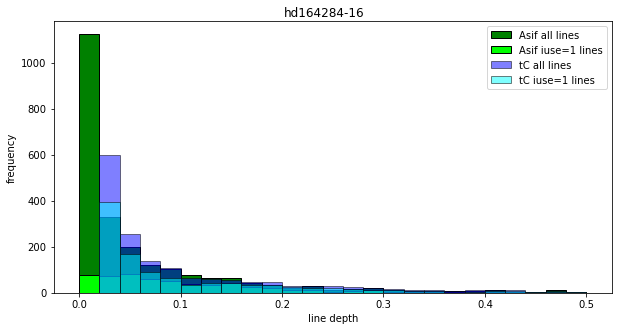

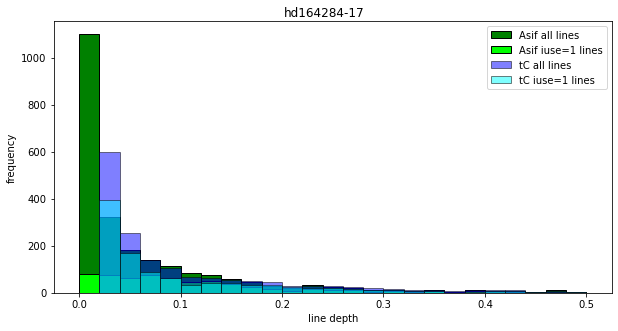

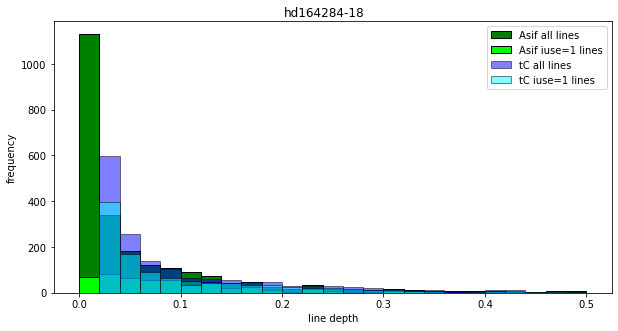

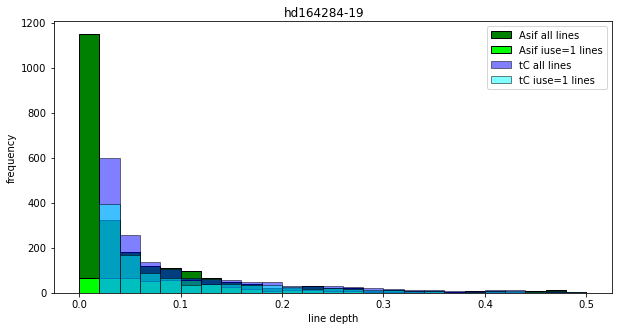

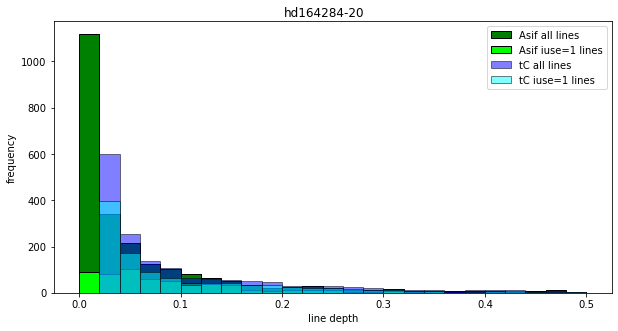

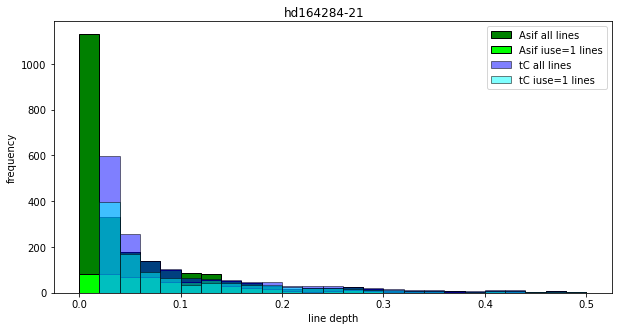

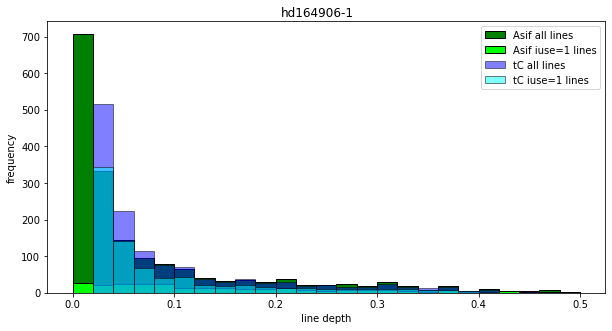

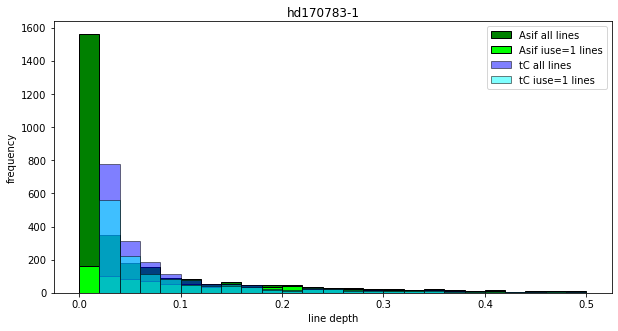

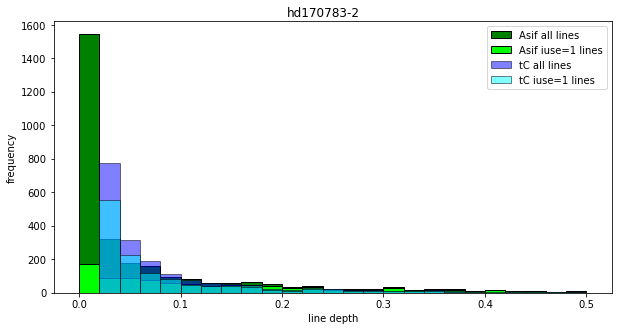

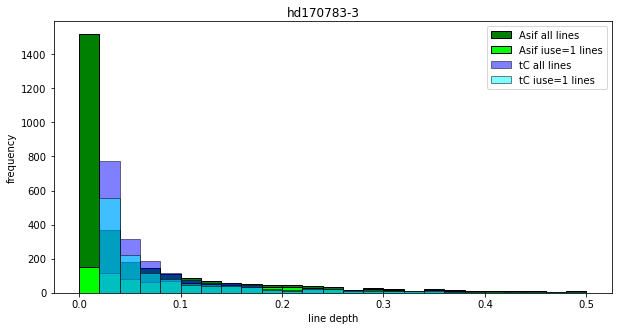

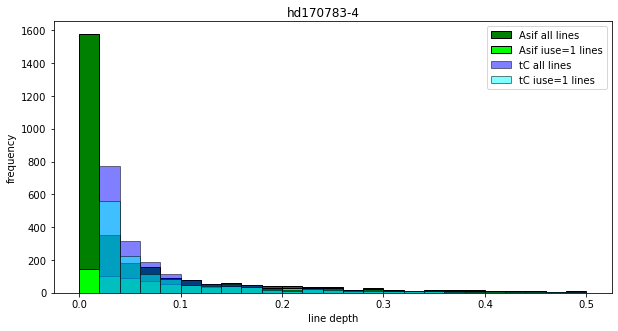

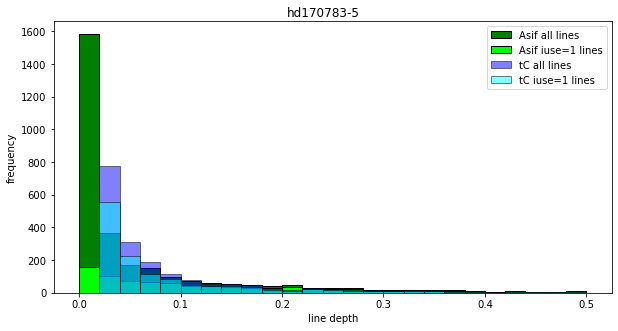

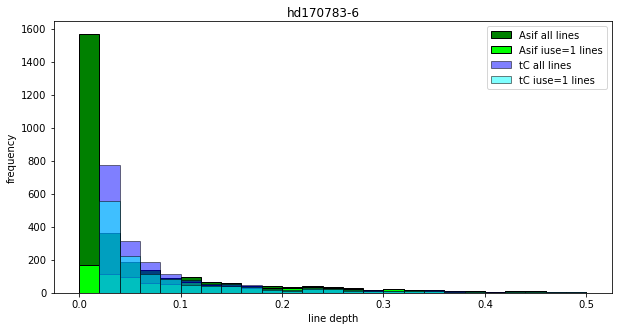

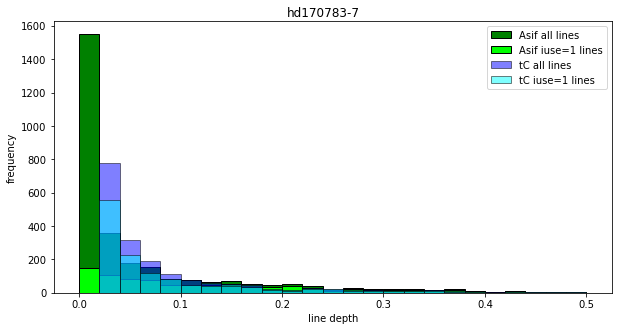

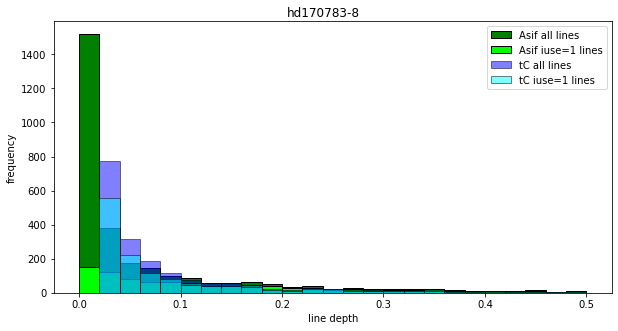

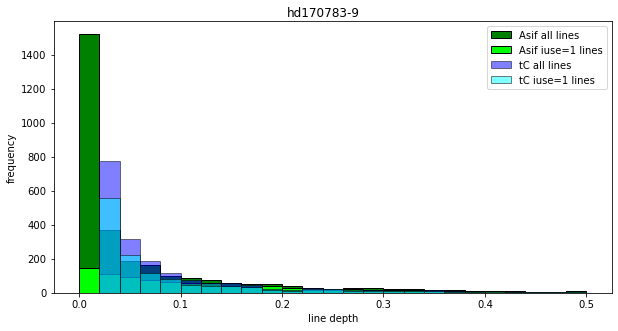

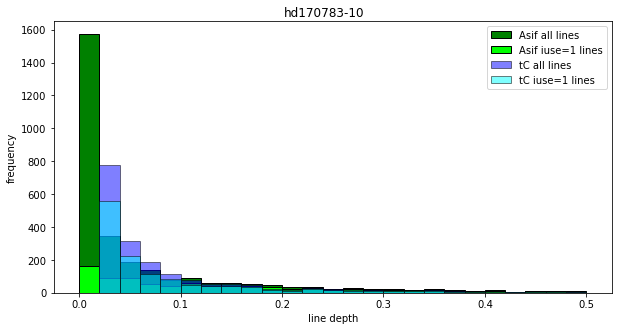

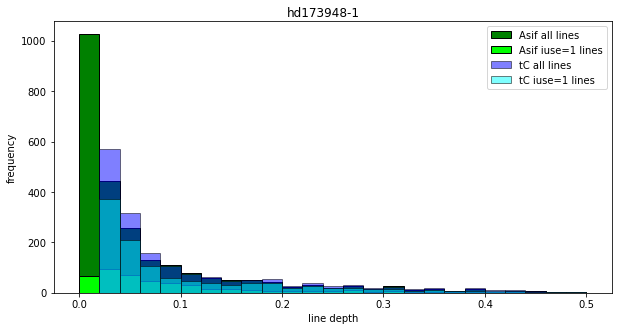

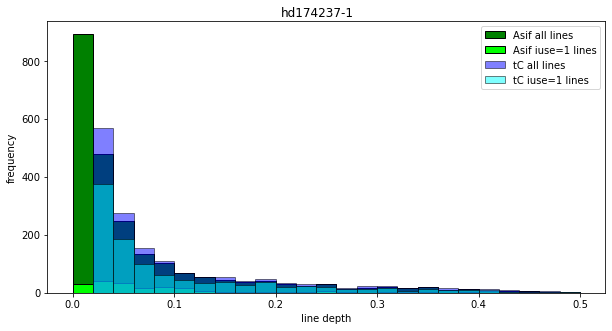

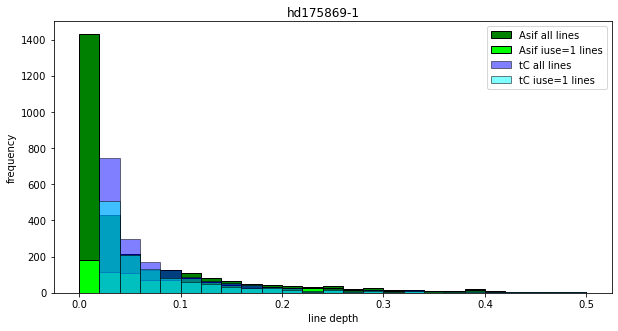

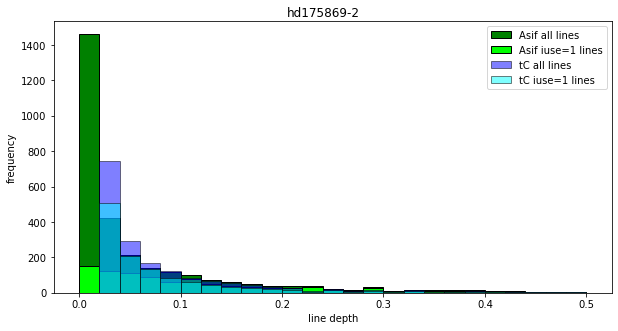

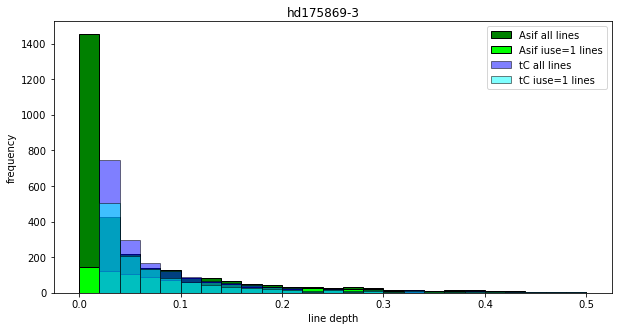

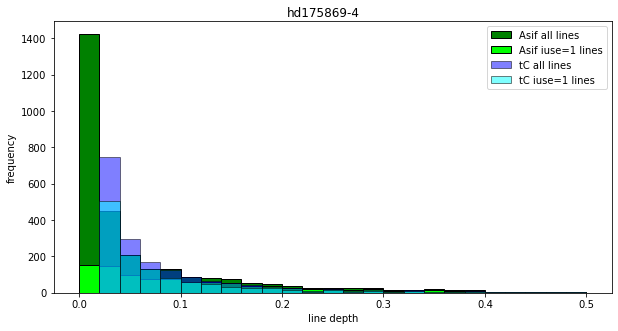

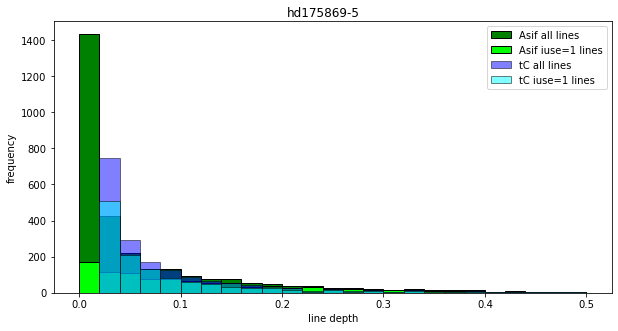

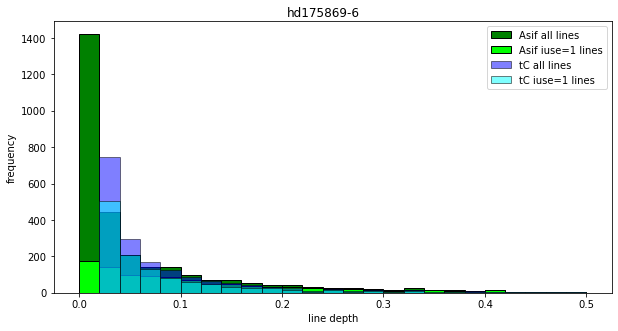

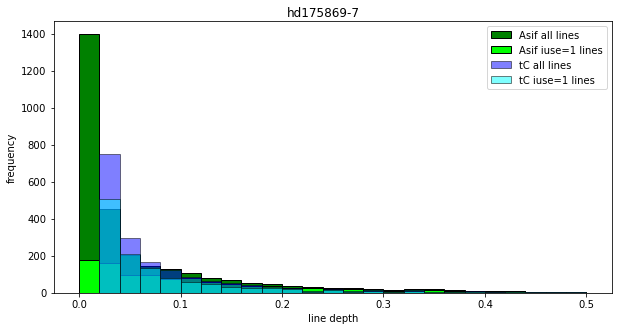

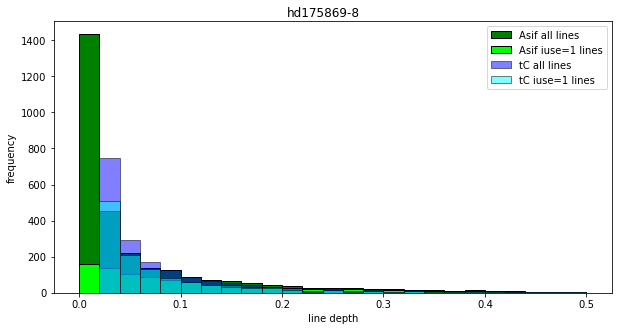

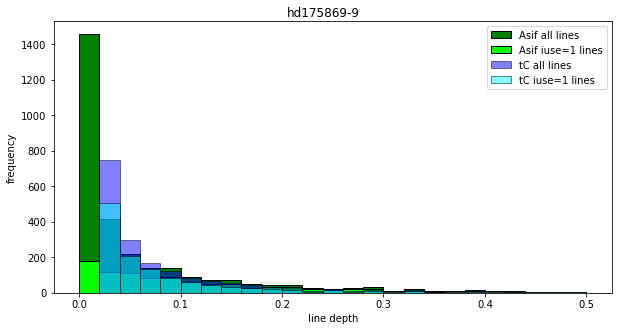

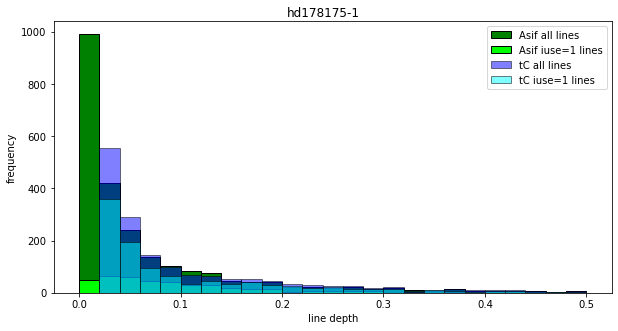

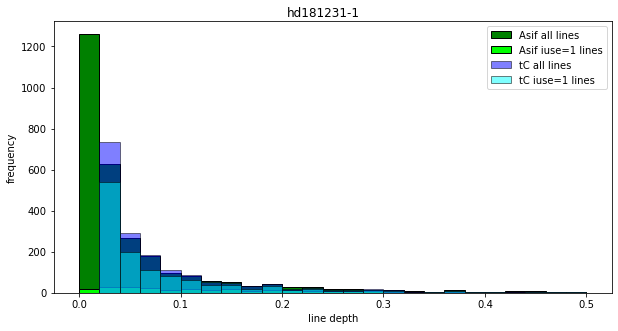

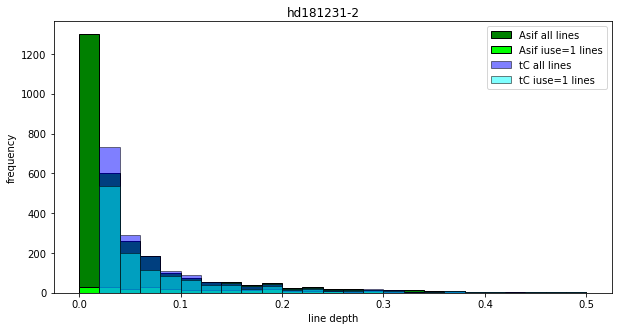

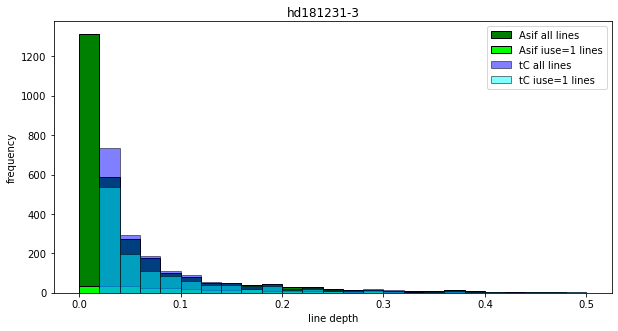

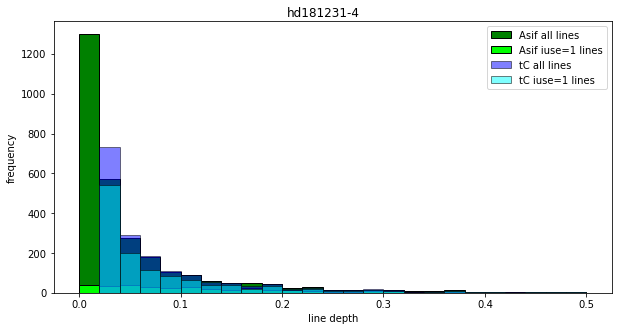

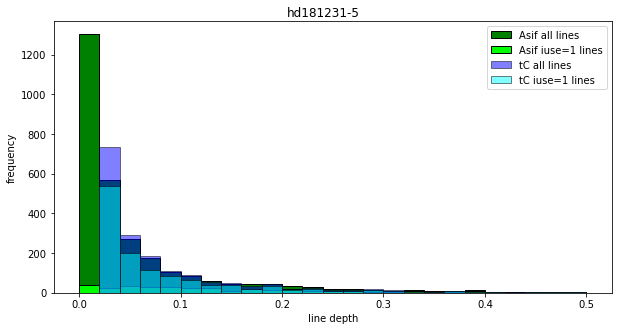

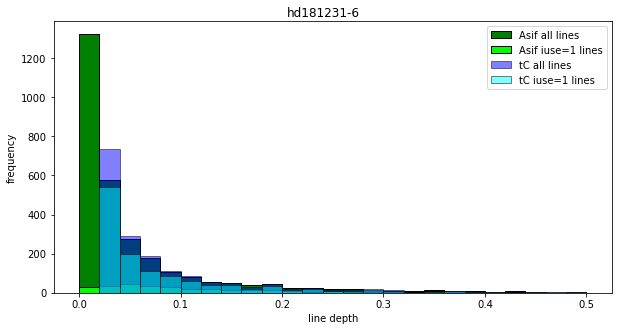

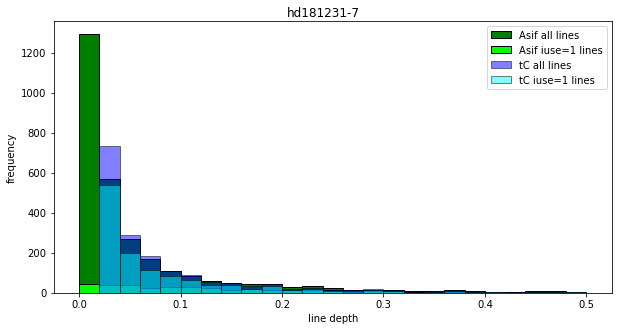

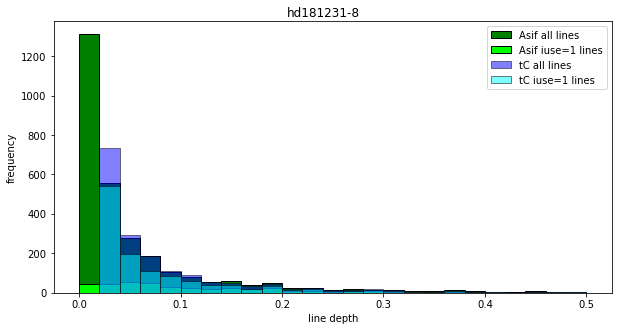

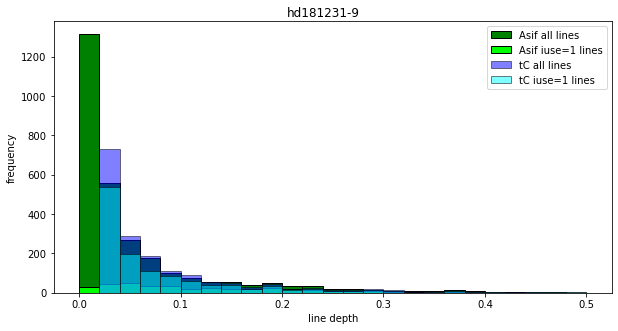

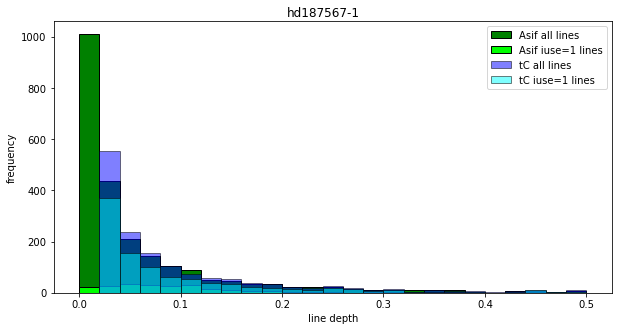

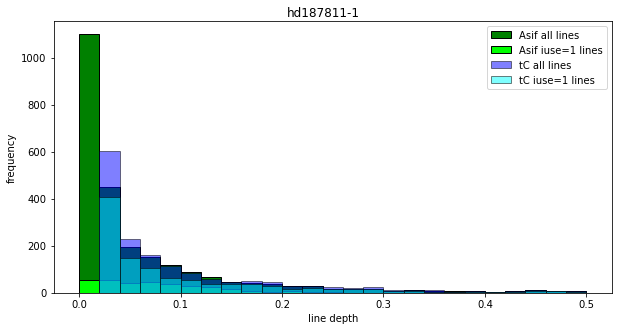

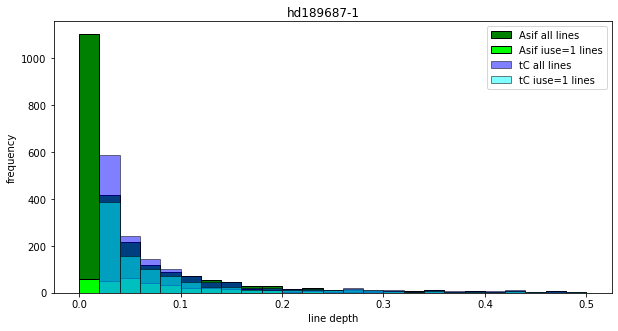

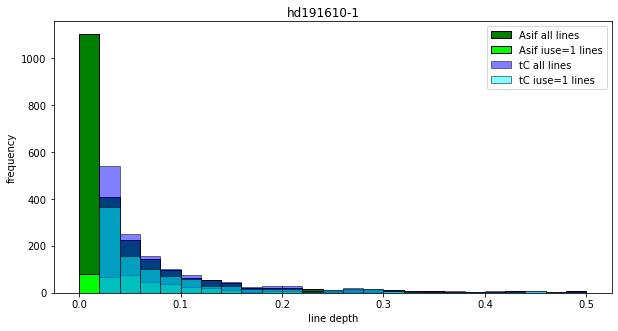

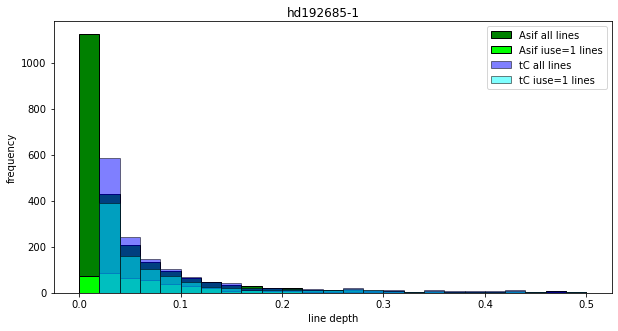

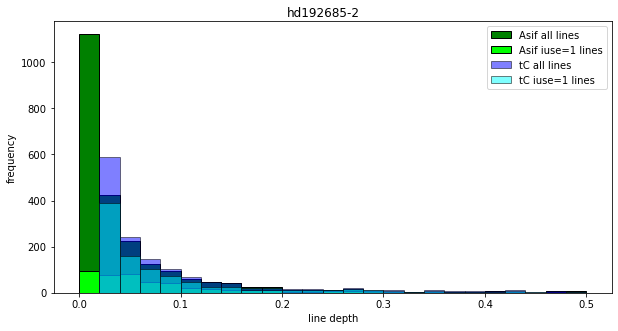

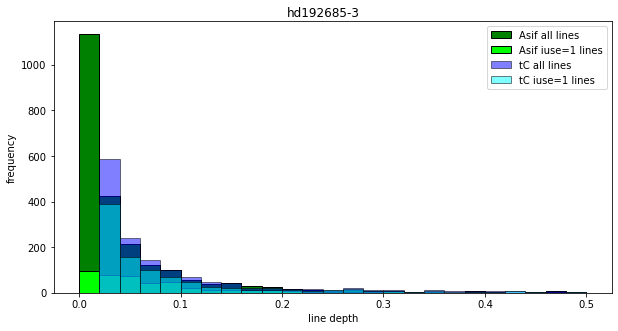

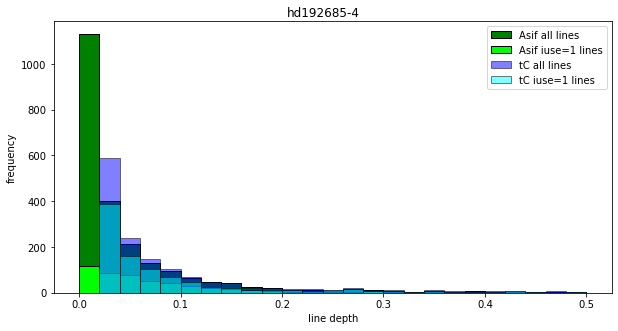

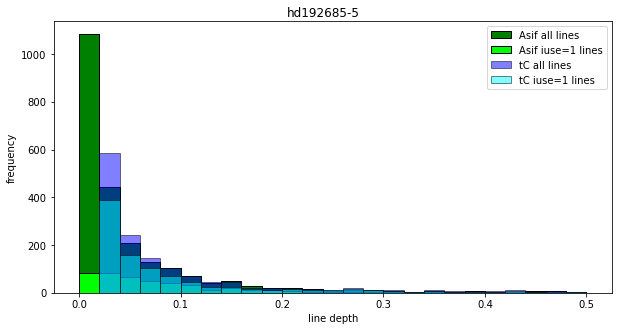

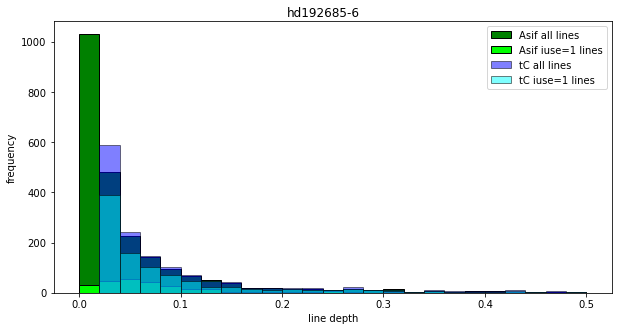

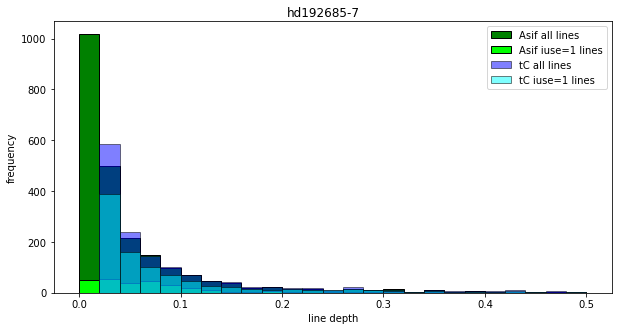

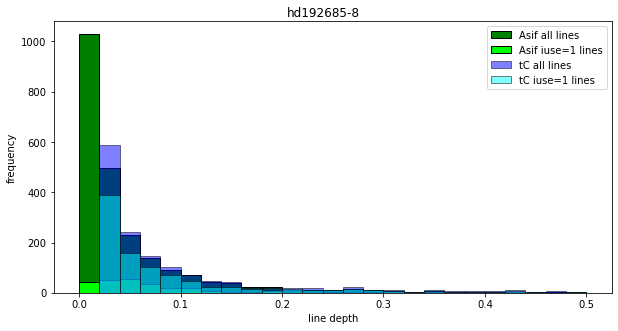

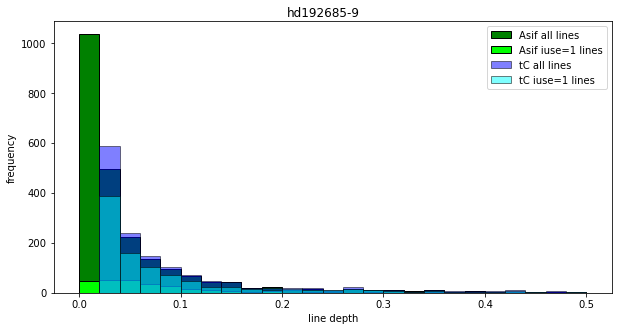

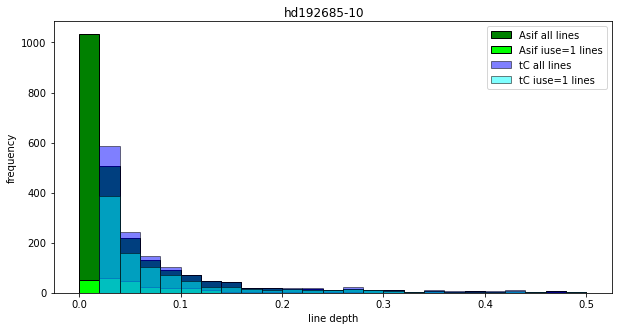

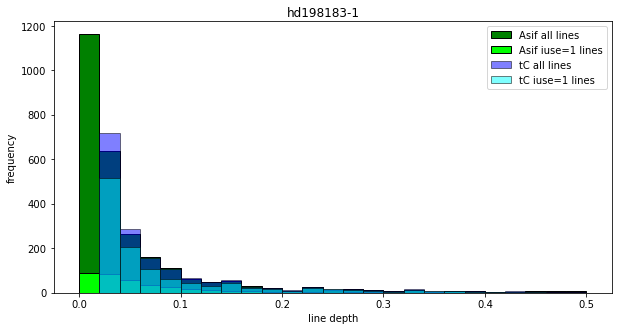

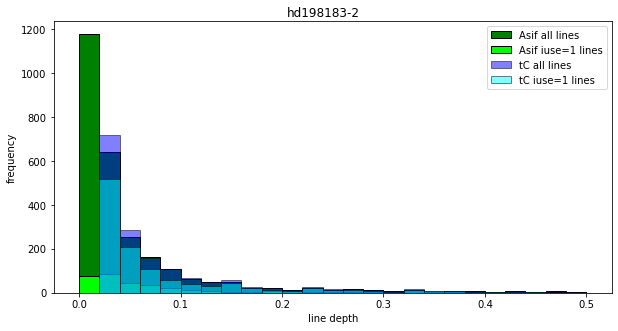

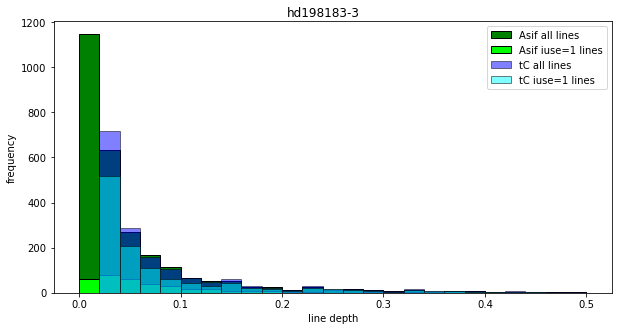

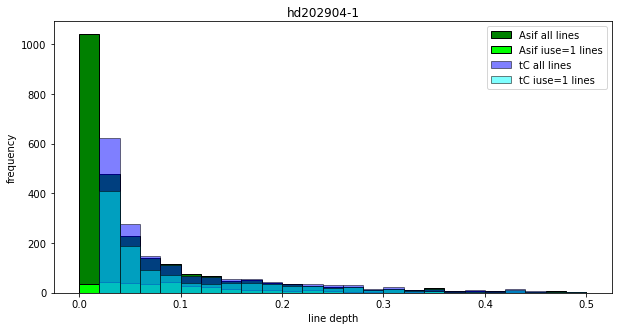

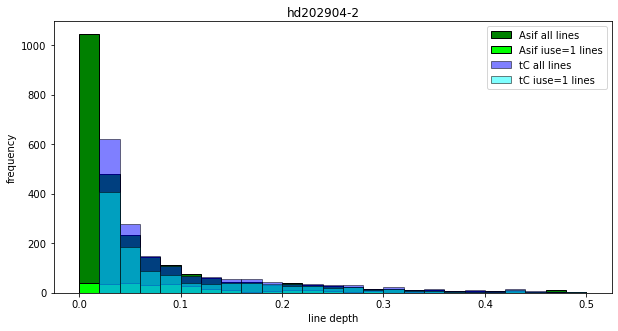

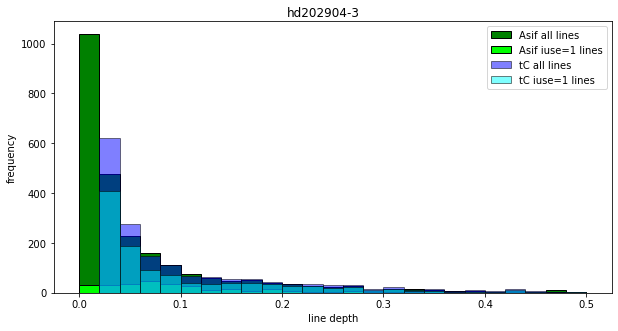

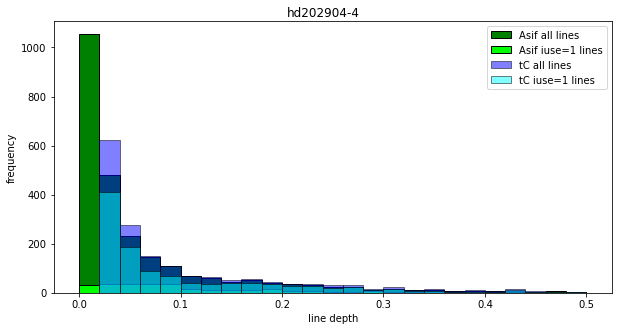

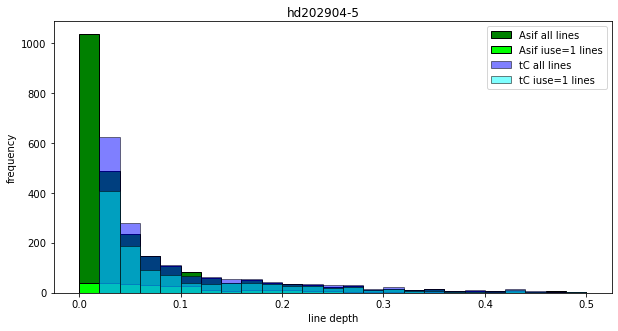

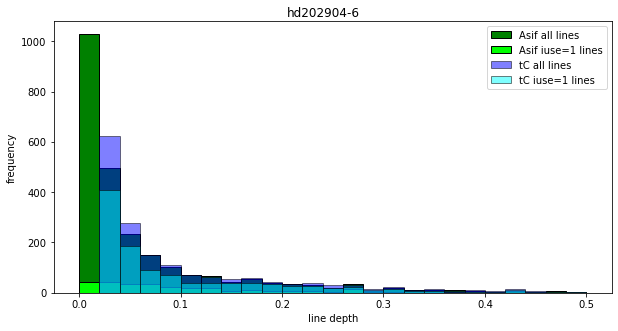

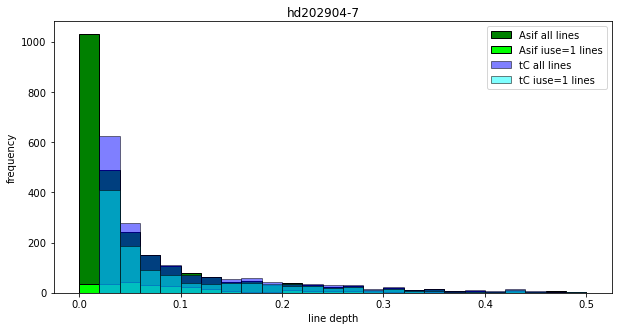

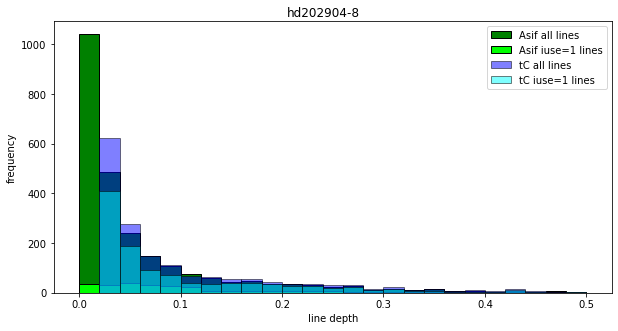

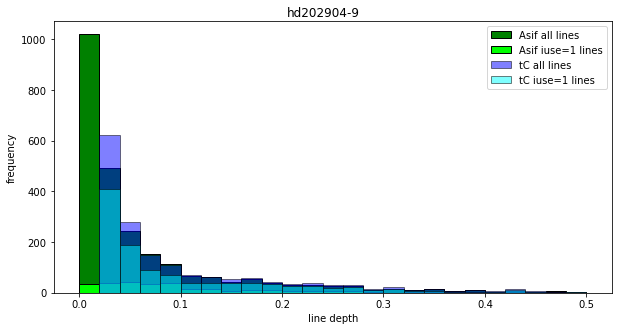

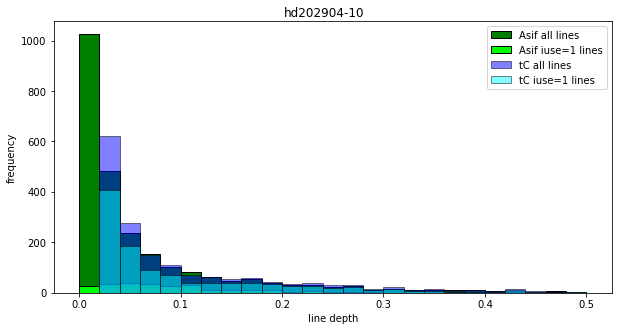

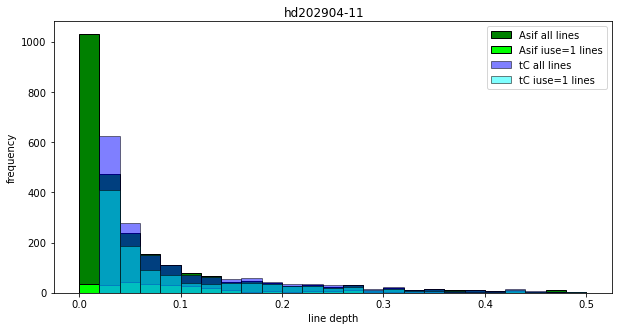

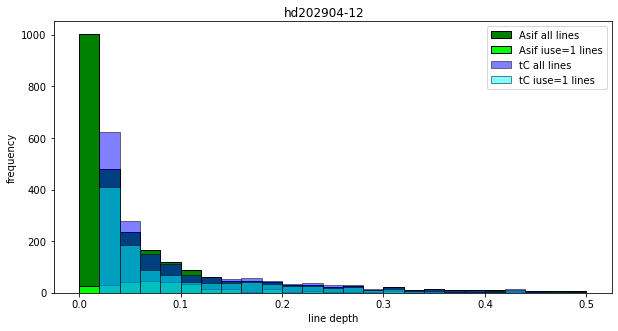

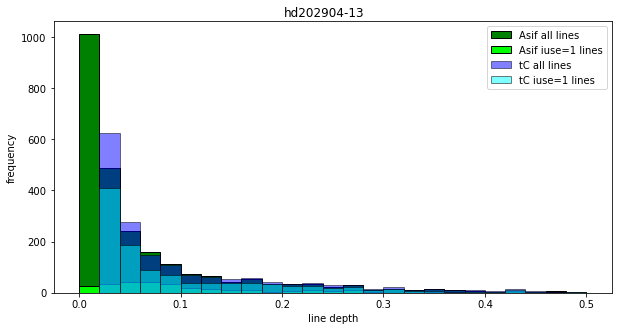

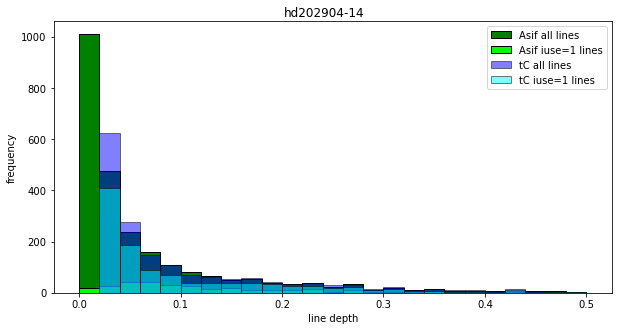

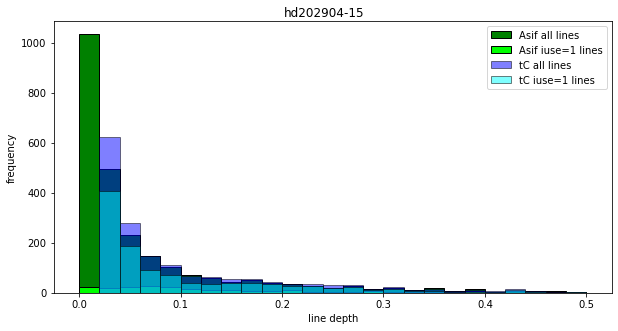

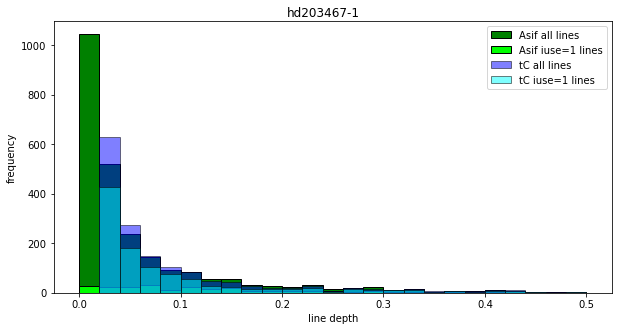

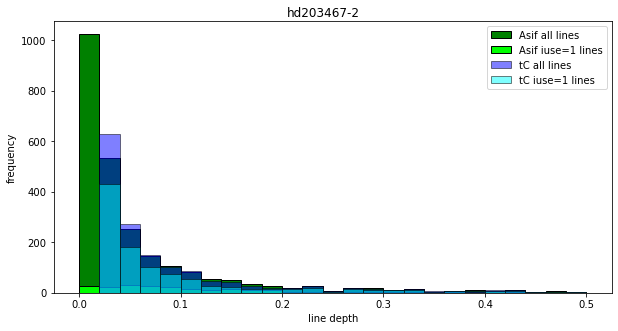

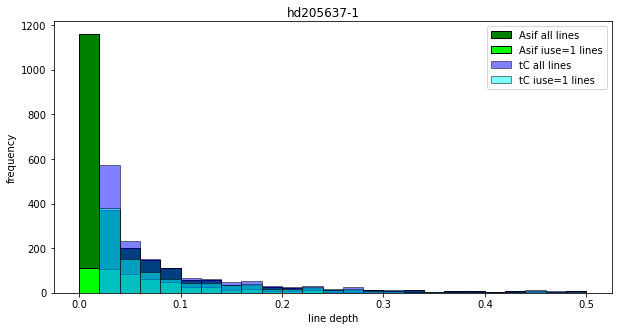

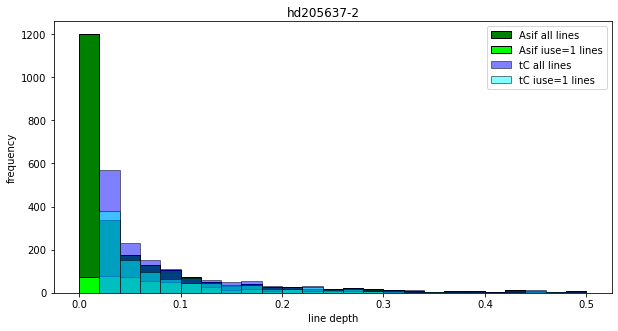

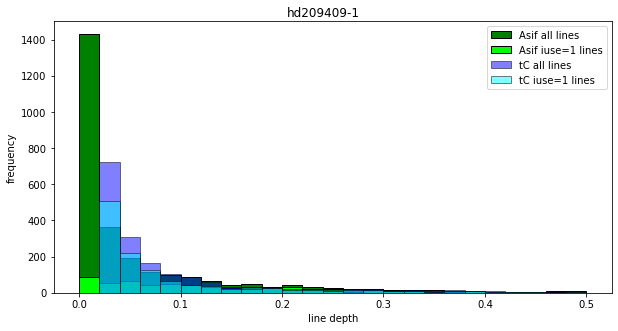

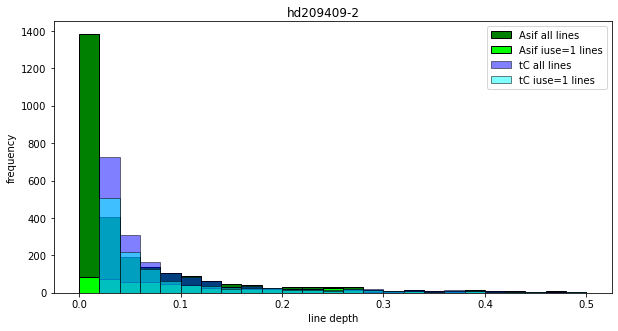

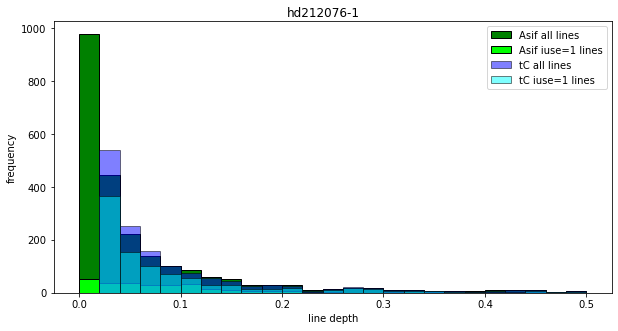

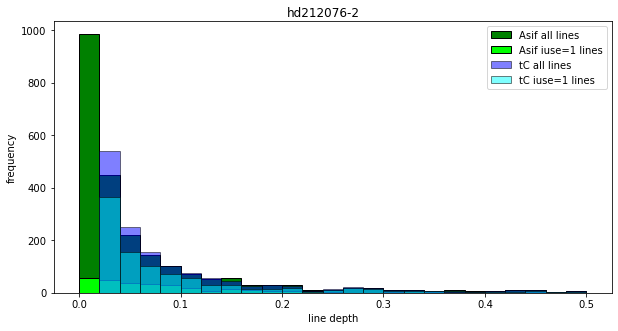

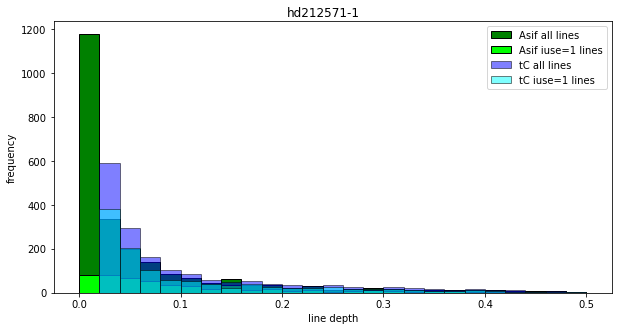

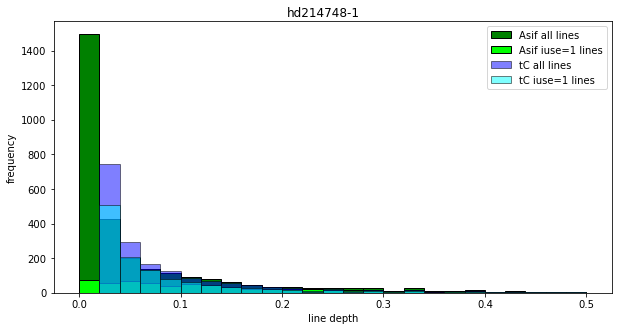

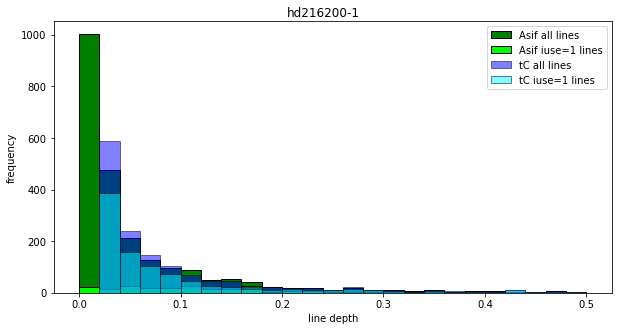

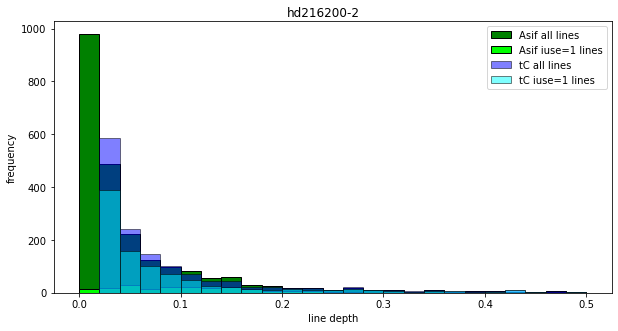

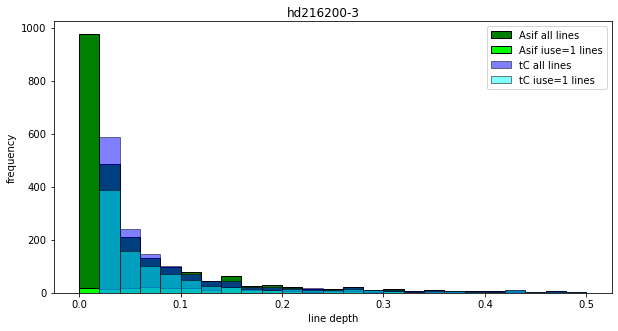

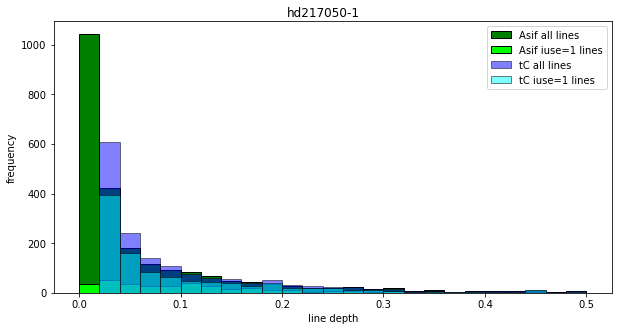

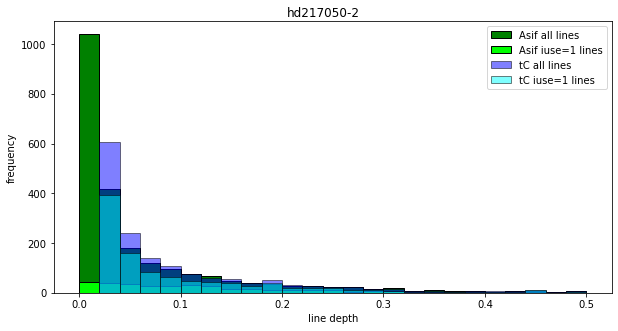

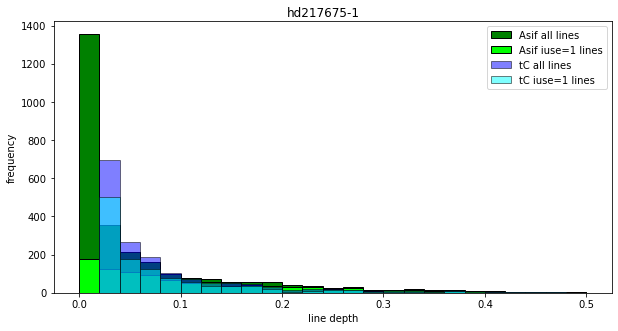

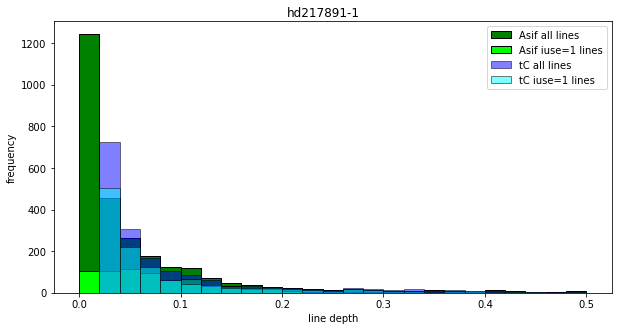

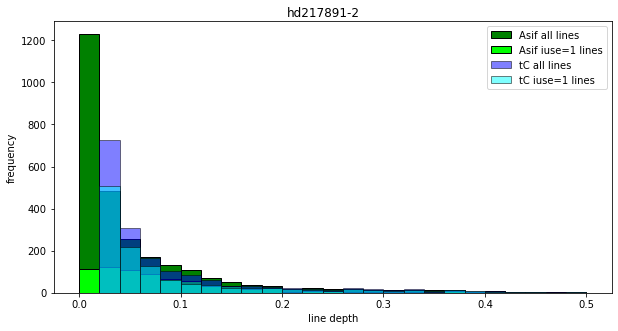

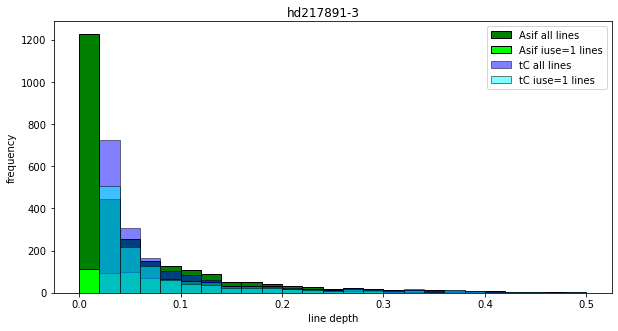

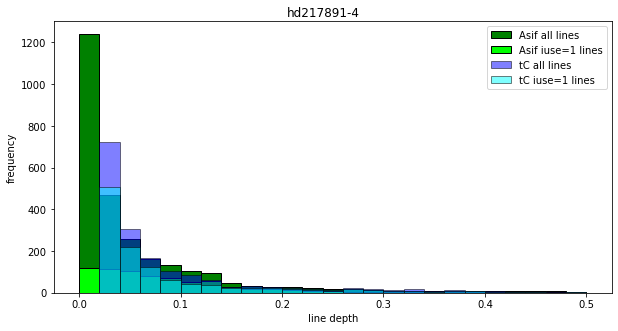

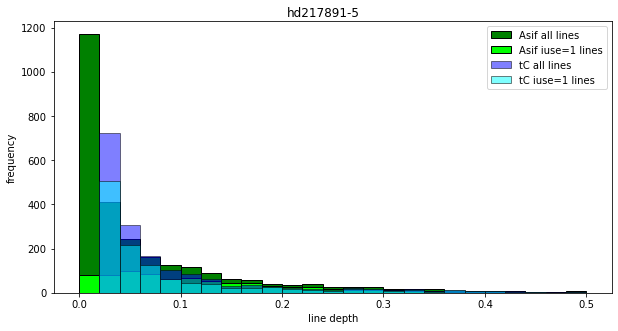

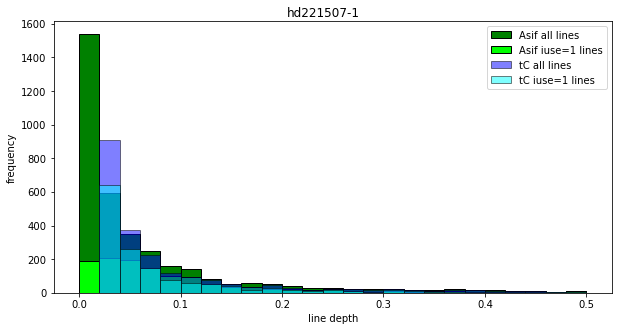

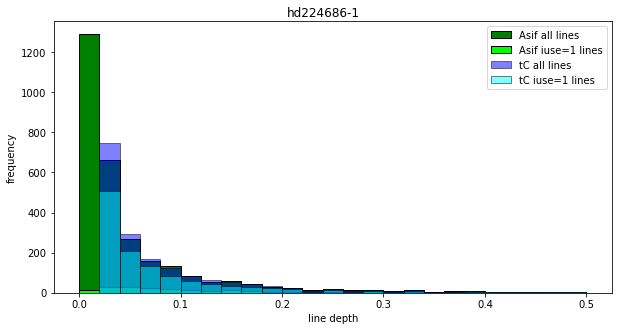

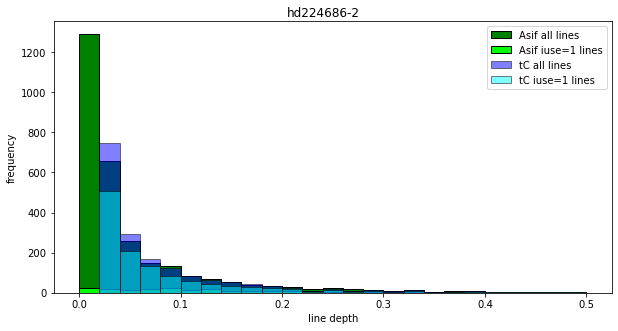

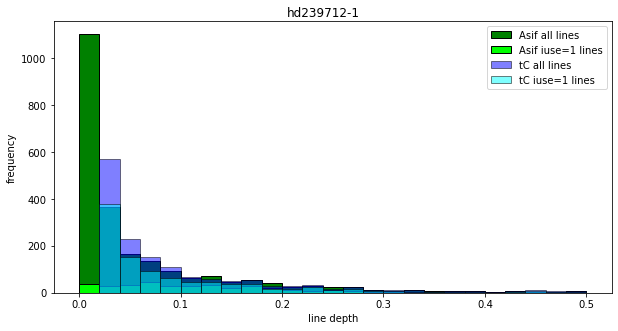

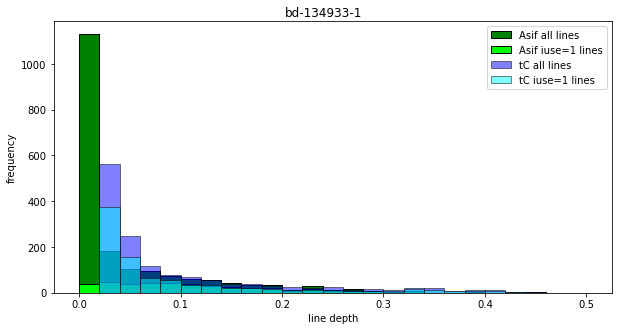

In [16]:



with PdfPages('{}/Mask_depth_hist_AsifMaskCleanTweak.pdf'.format(path)) as pdf:
  for i in range(len(StarData["Name"])):

    star = StarData["Name"][i]
    modelcode = StarData["ModelCode"][i].upper()

    for obs in range(1,StarData['Nobs'][i]+1):


      Asif_mask = '{}/02-Mask-calculations/MaskCleaning/AsifMaskCleanTweak_tellClean/{}_clean_{}.mask_auto_twk'.format(path,star,obs)

      A_mask = pol.iolsd.read_mask(fname=Asif_mask)

      AM=[]
      for i in range(len(A_mask.iuse)):
        if A_mask.iuse[i] != 0:
          AM.append(A_mask.depth[i])


      if obs==1:
        tellClean_mask = '{}/02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_depth0.02.mask'.format(path,modelcode)
        tC_mask = pol.iolsd.read_mask(fname=tellClean_mask)
        tCM =[]
        for i in range(len(tC_mask.iuse)):
          if tC_mask.iuse[i] != 0:
            tCM.append(tC_mask.depth[i])

      fig, ax = plt.subplots(1,1, figsize=(10,5))

      ax.set_xlabel('line depth')
      ax.set_ylabel('frequency')
      b=25



      ax.hist(A_mask.depth,edgecolor='black',alpha = 1 ,bins=b, color='green',range=[0, 0.5],label='Asif all lines')
      ax.hist(AM,bins=b,edgecolor='black',alpha = 1,color='lime',range=[0, 0.5],label='Asif iuse=1 lines')

      ax.hist(tC_mask.depth,edgecolor='black',bins=b ,color ='blue',alpha = 0.5 ,range=[0, 0.5],label='tC all lines')
      ax.hist(tCM,bins=b,edgecolor='black' ,color = 'cyan',alpha = 0.5 ,range=[0, 0.5] ,label ='tC iuse=1 lines')

      ax.legend()
      fig.suptitle(star + '-'+ str(obs),y=0.92)

      pdf.savefig(fig)

C:\Users\pjsta\AppData\Local\Temp/ipykernel_4428/509543412.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(10,5))


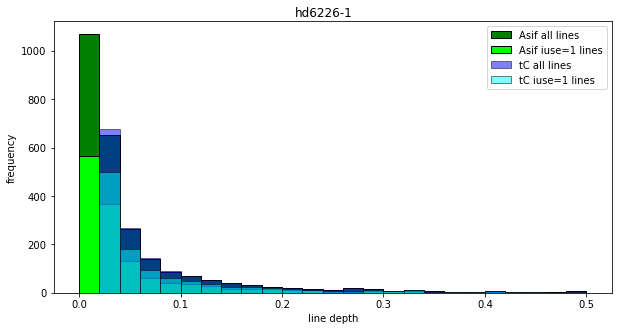

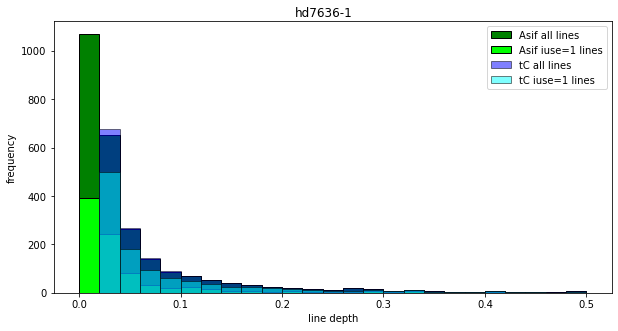

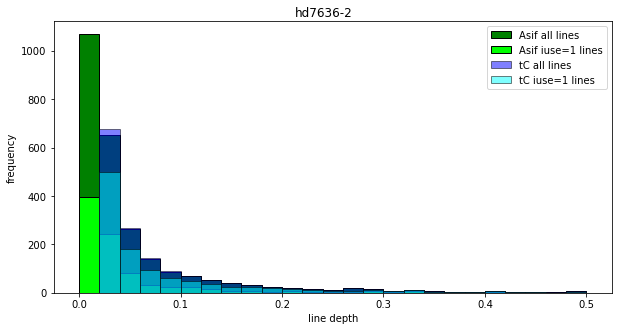

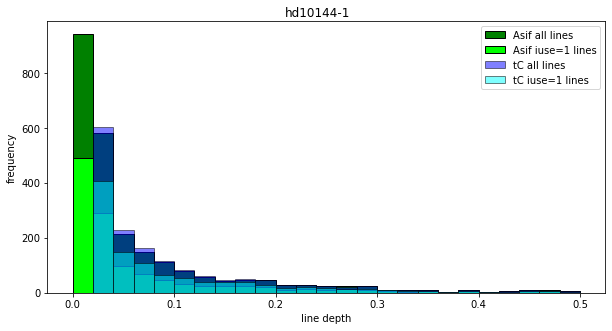

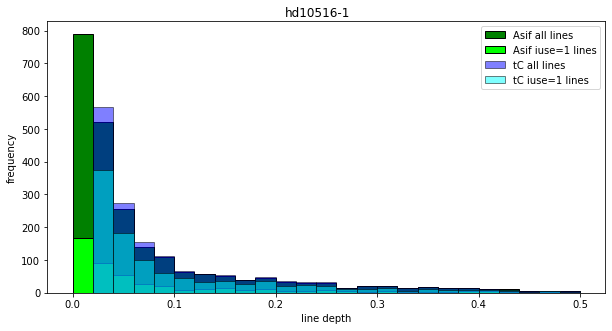

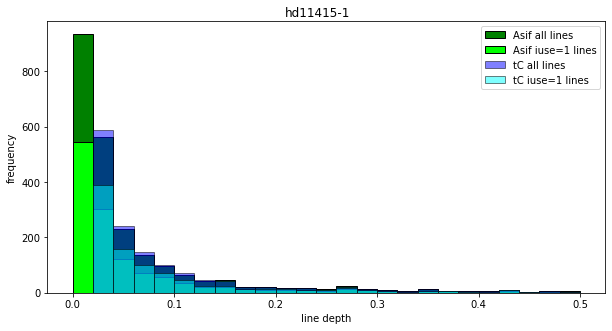

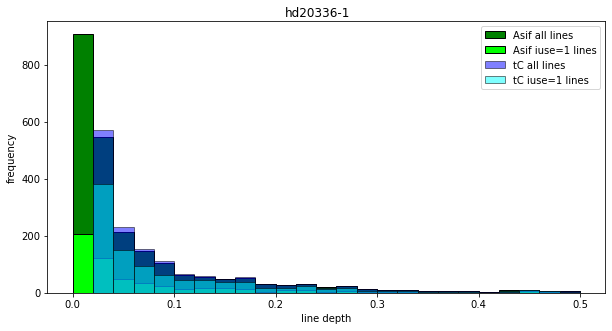

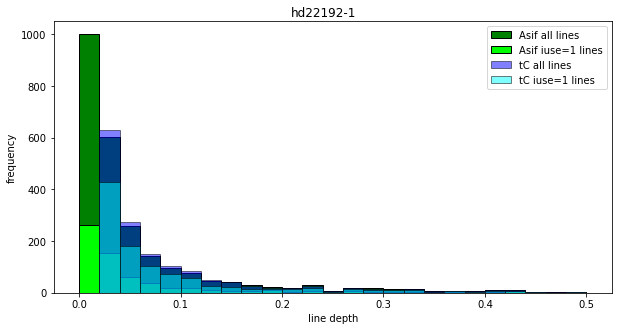

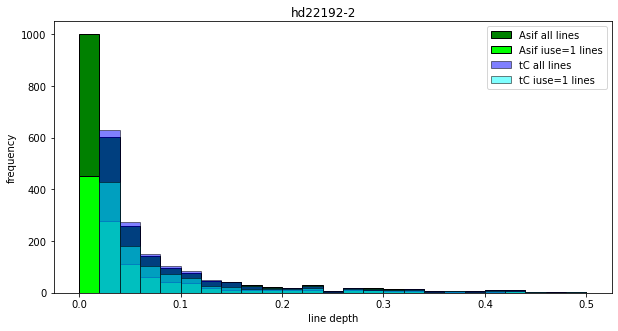

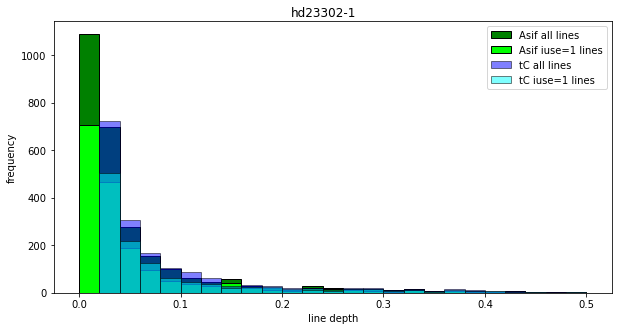

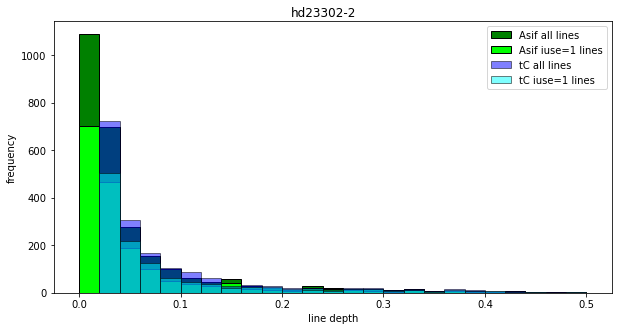

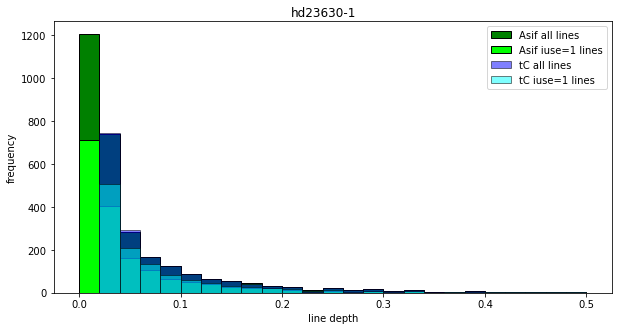

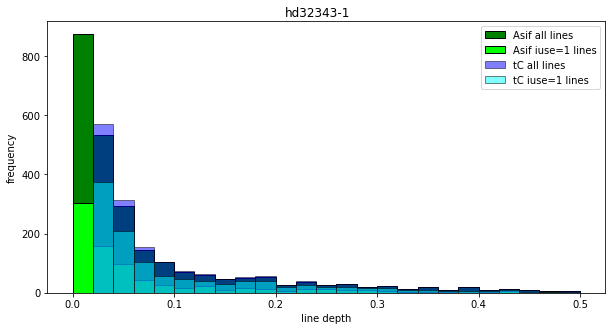

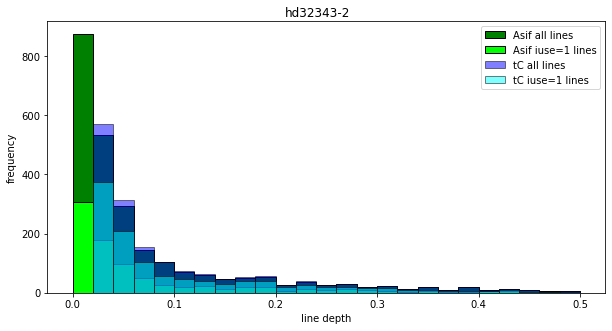

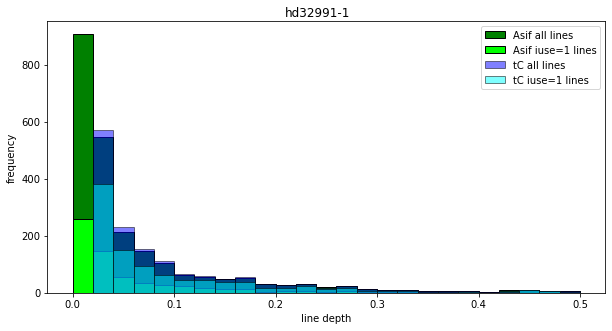

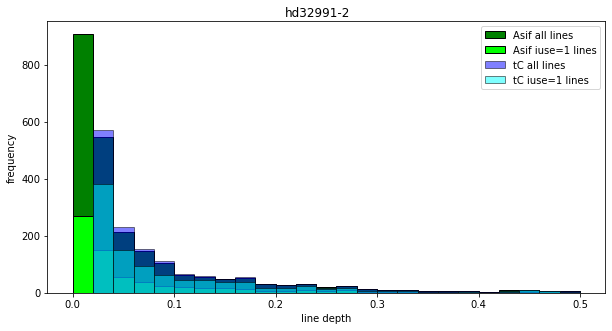

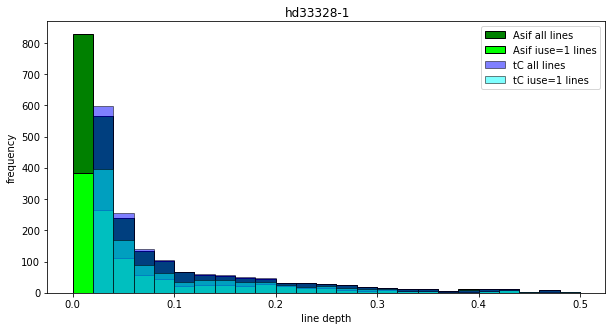

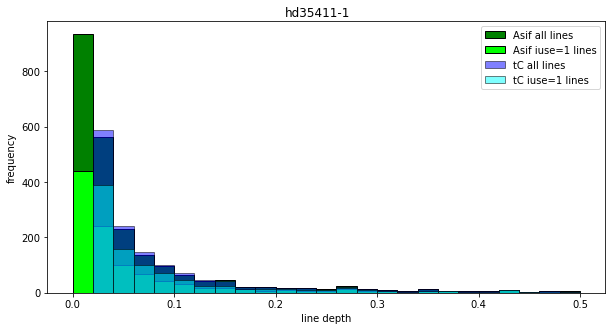

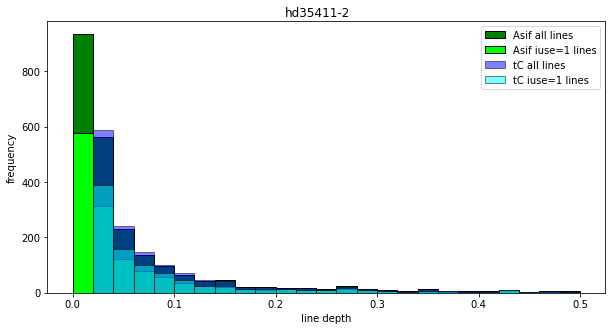

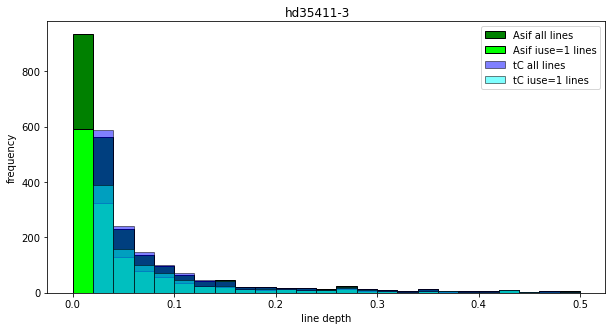

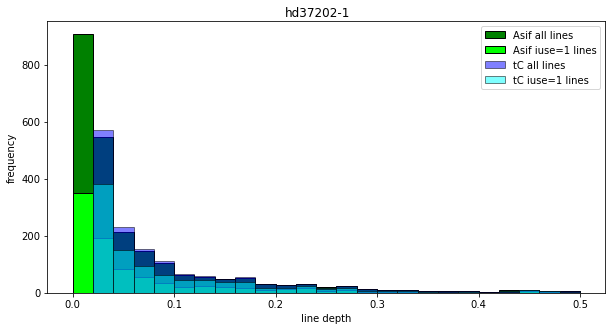

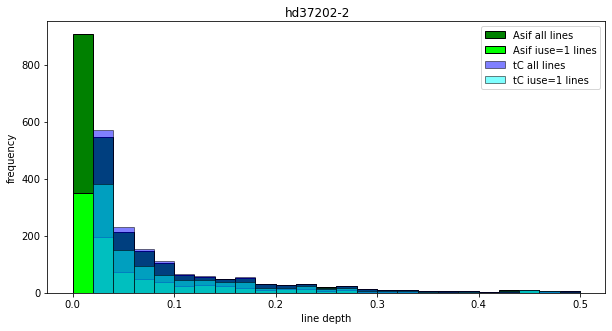

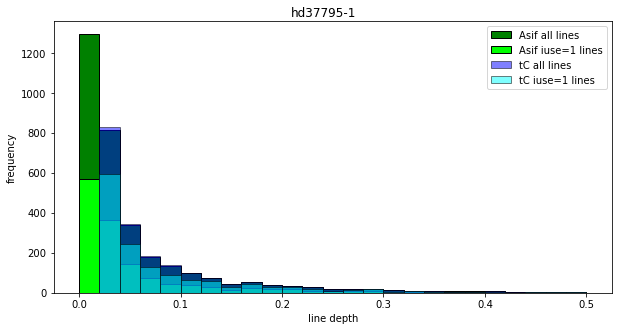

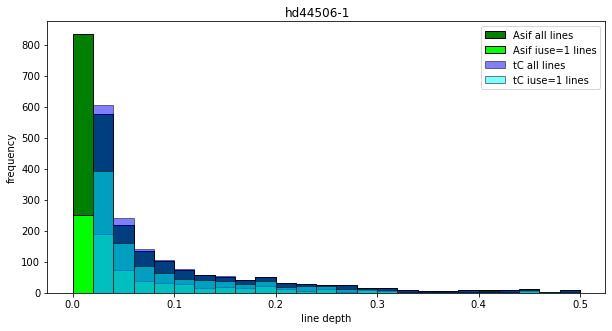

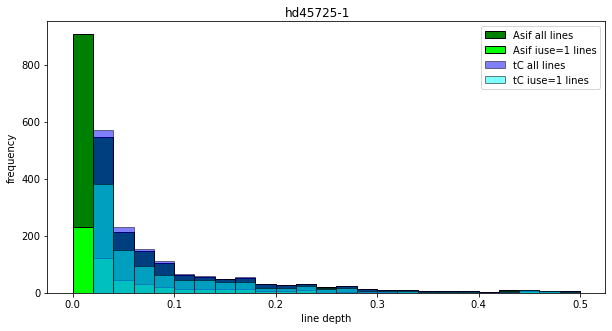

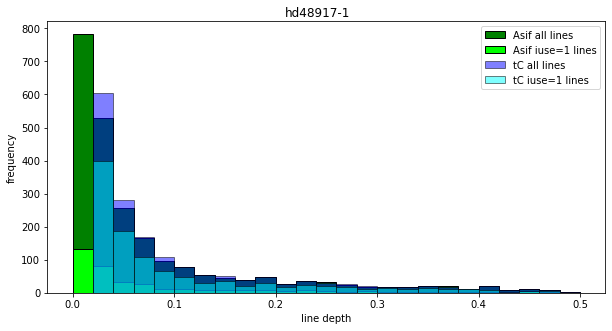

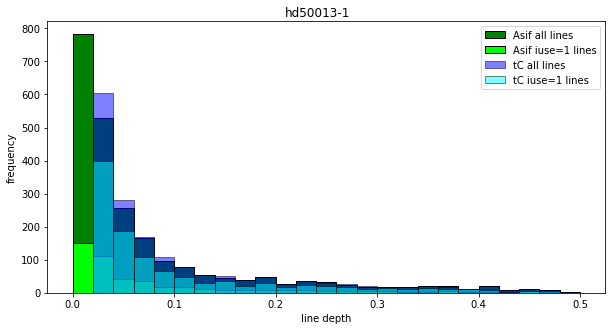

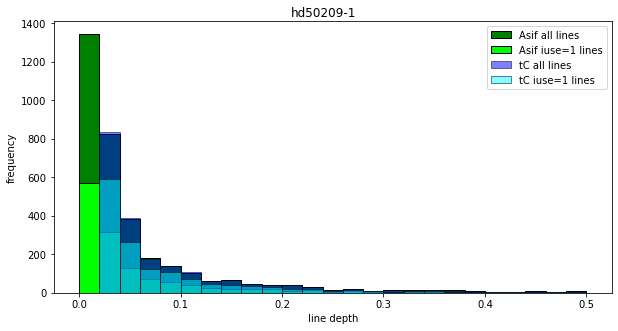

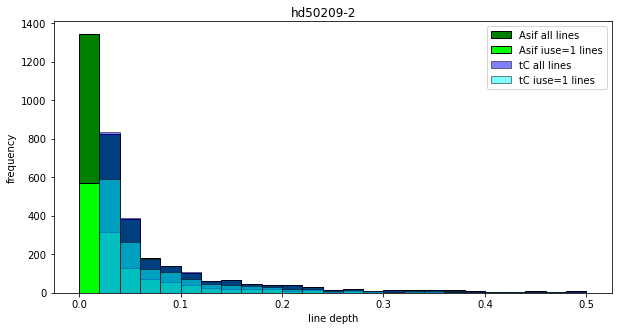

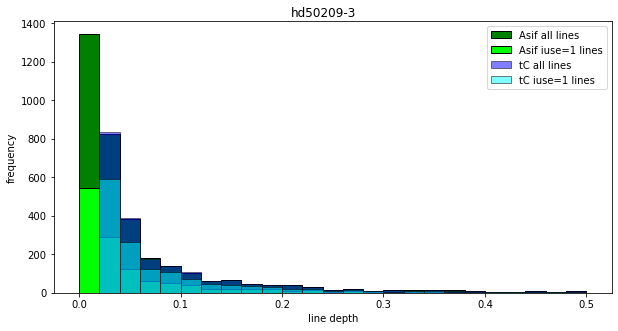

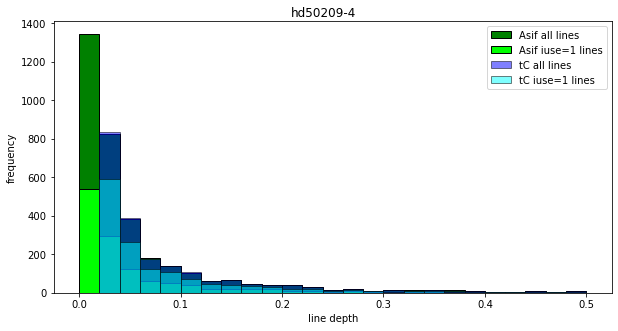

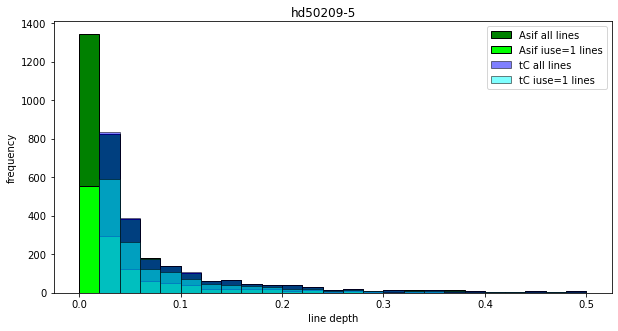

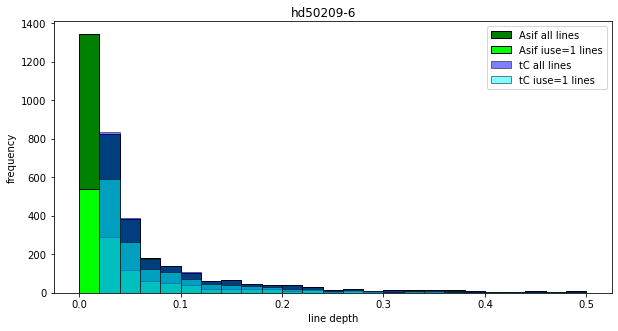

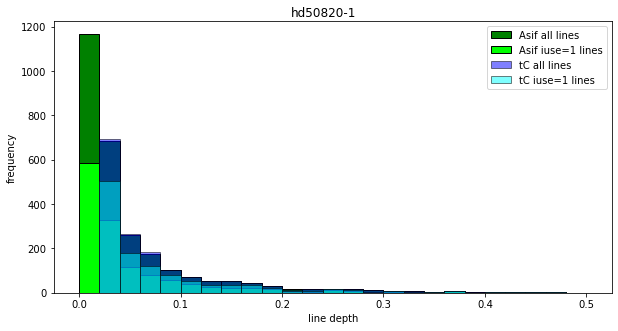

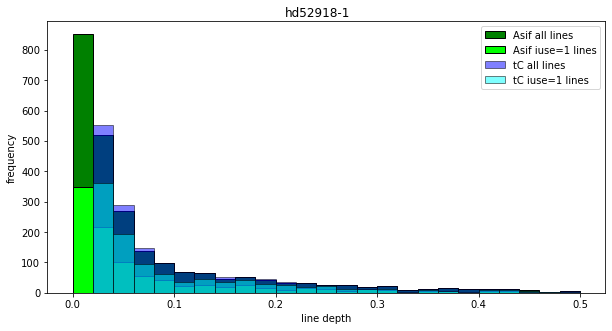

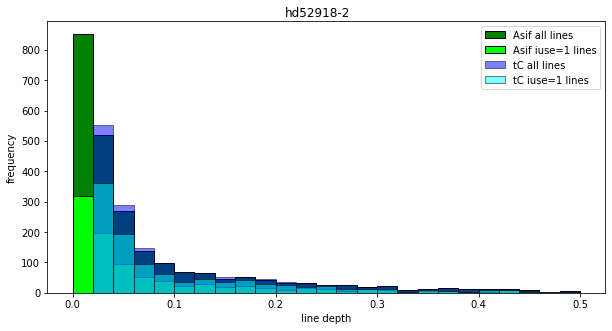

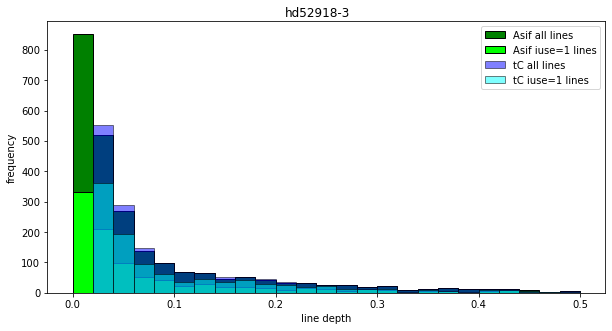

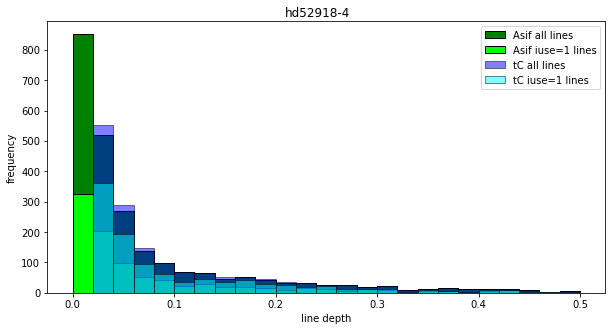

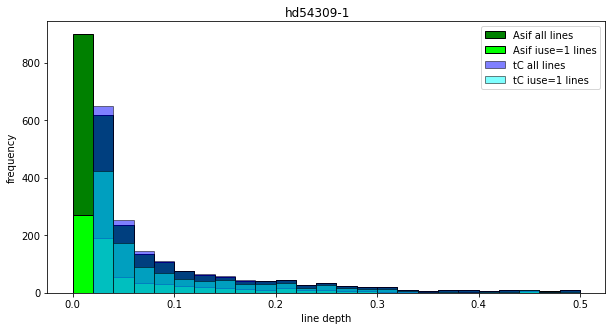

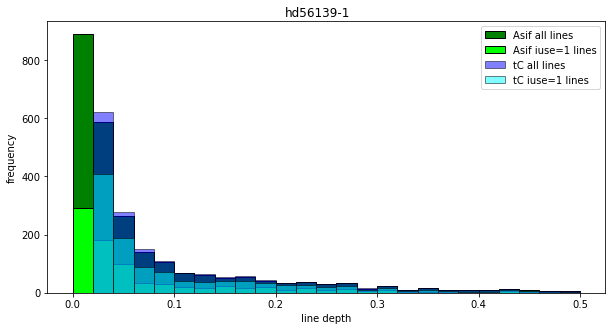

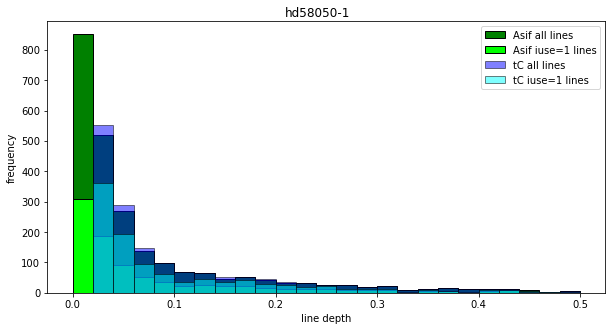

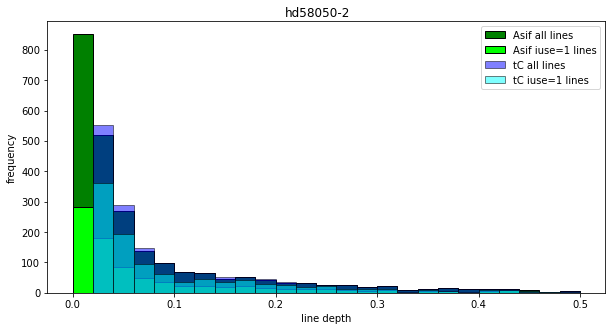

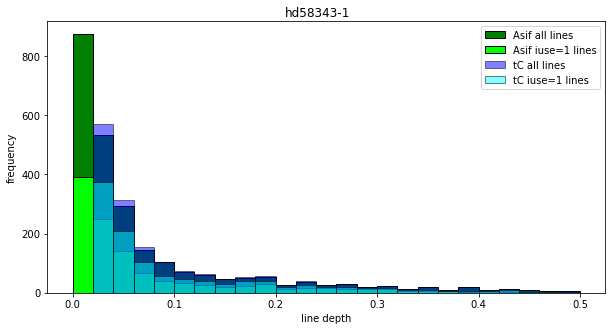

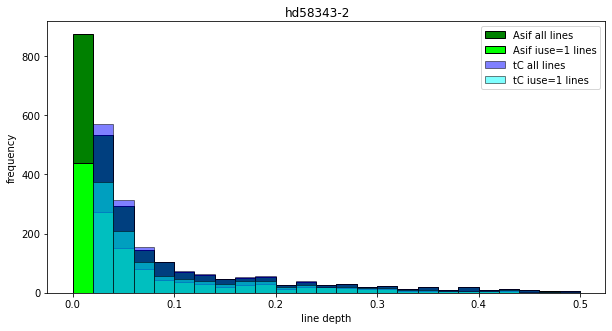

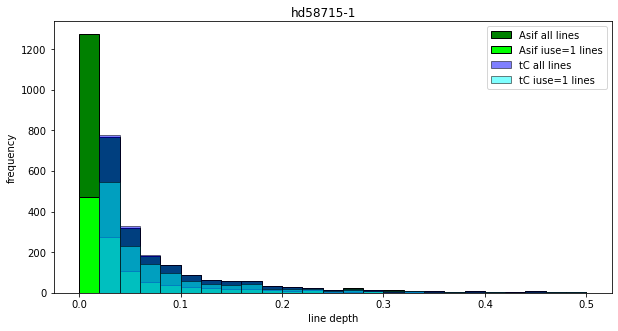

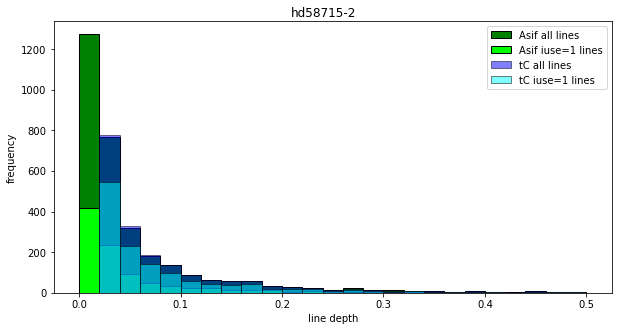

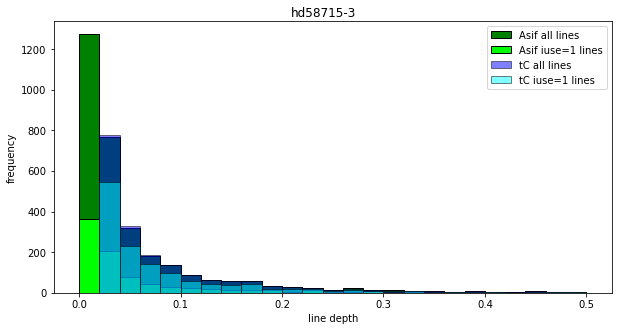

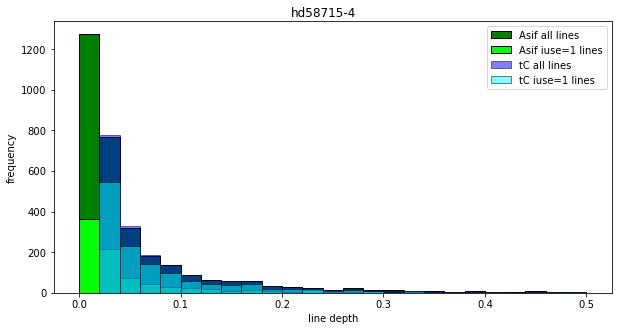

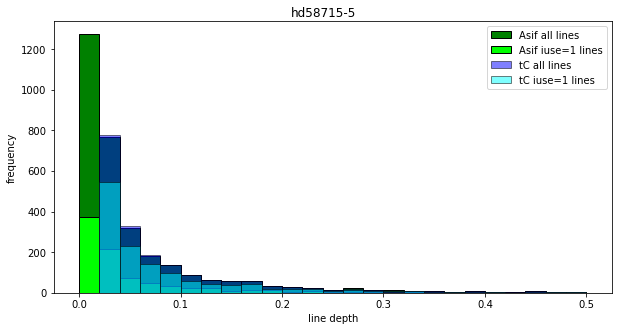

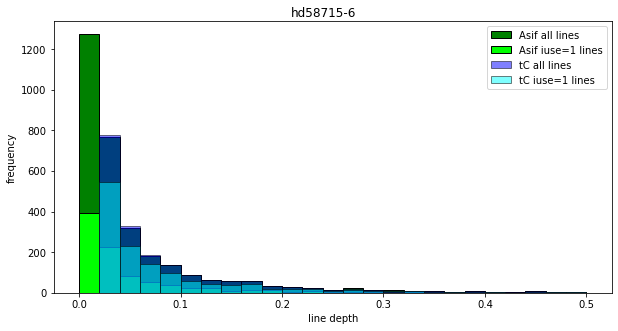

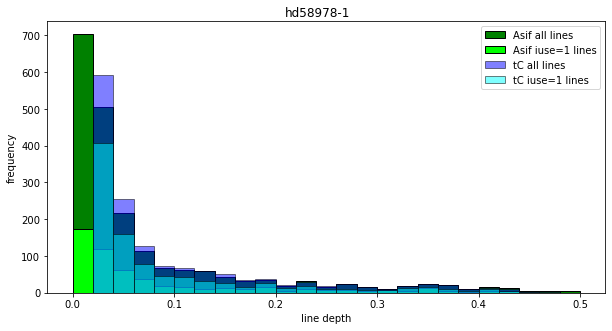

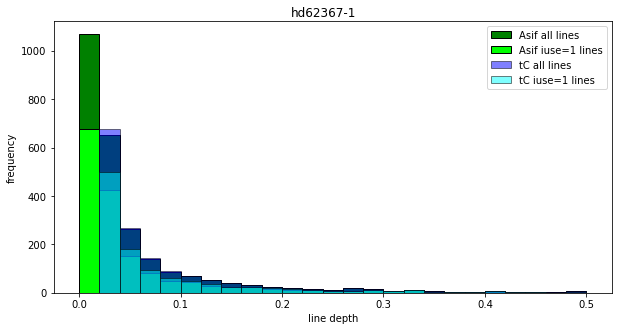

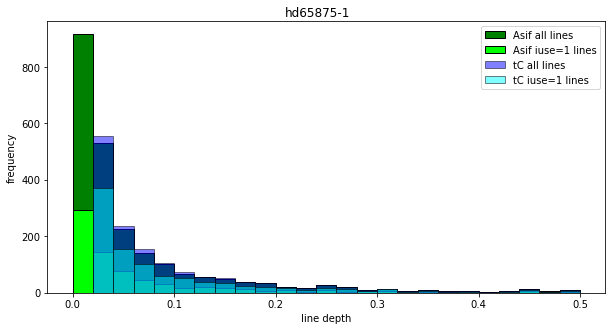

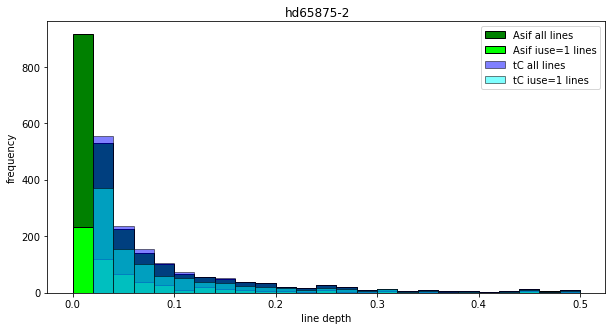

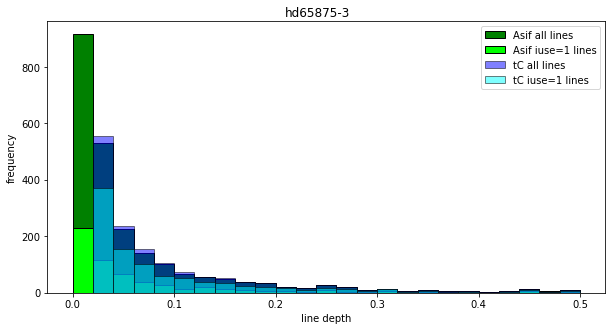

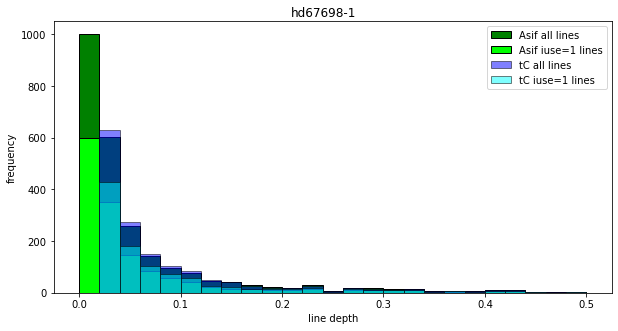

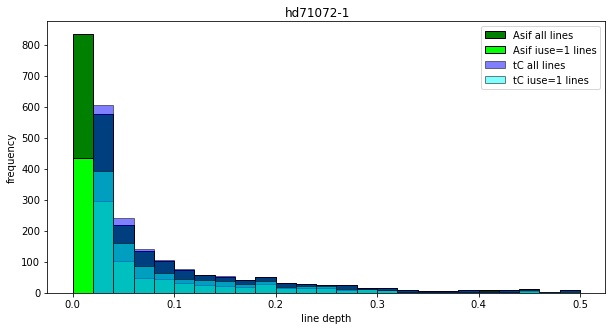

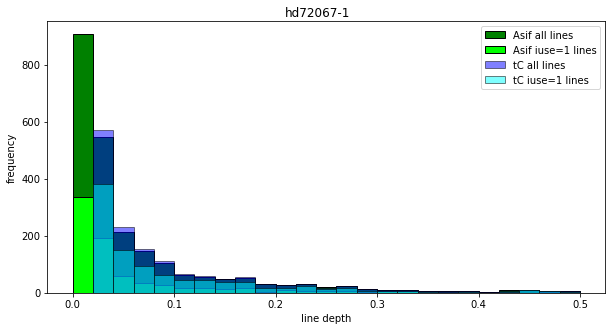

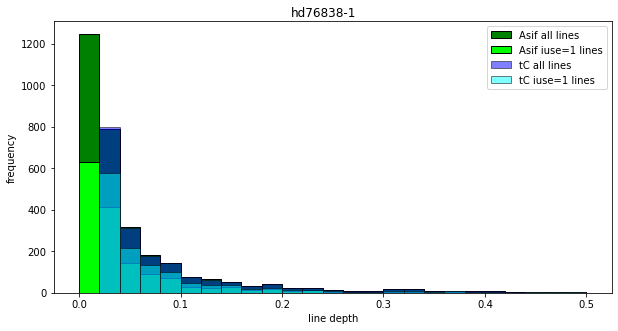

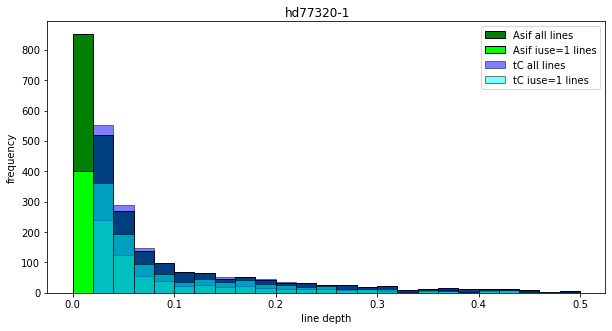

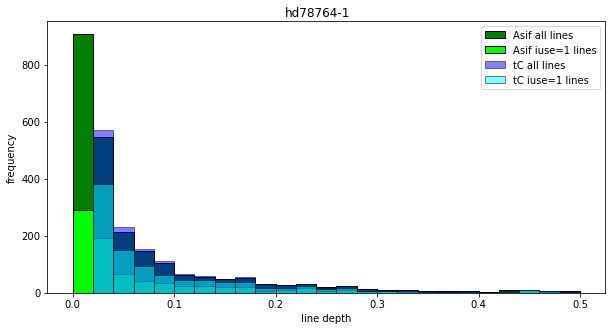

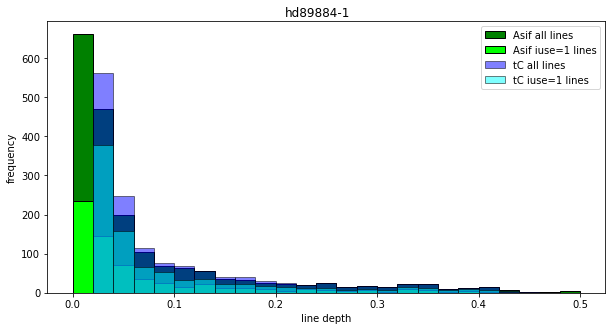

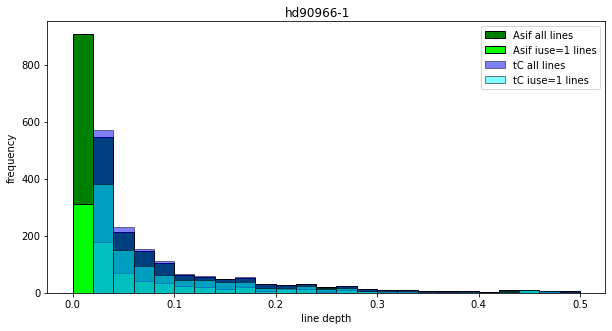

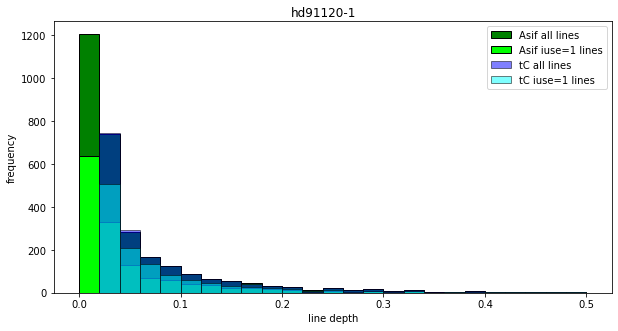

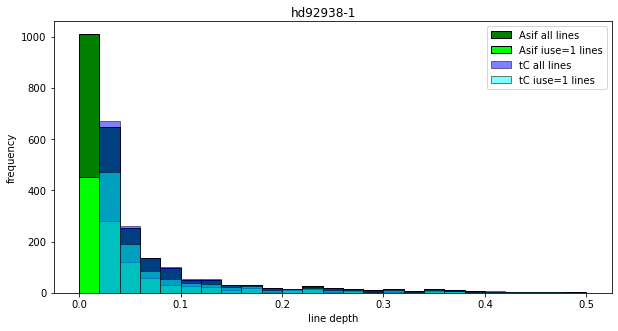

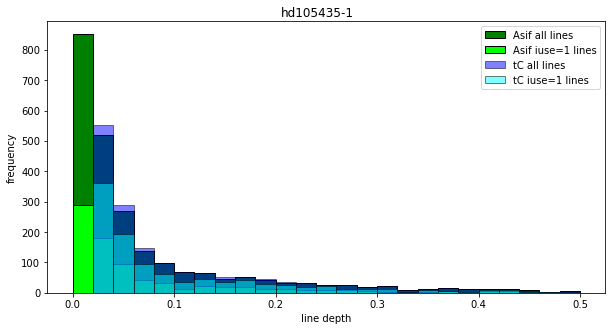

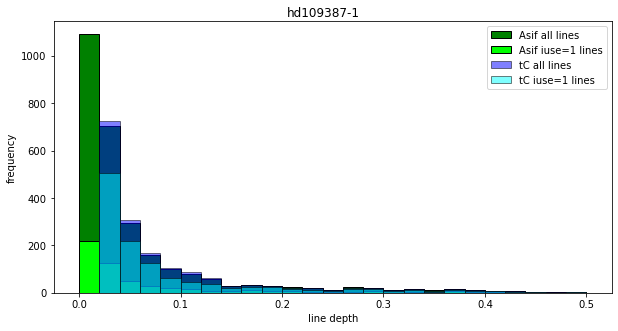

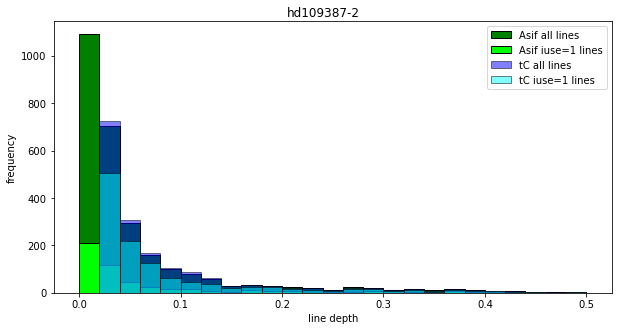

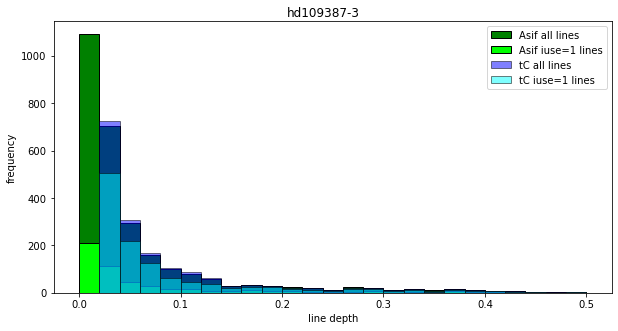

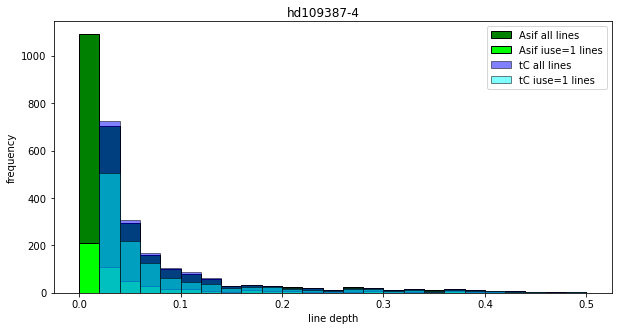

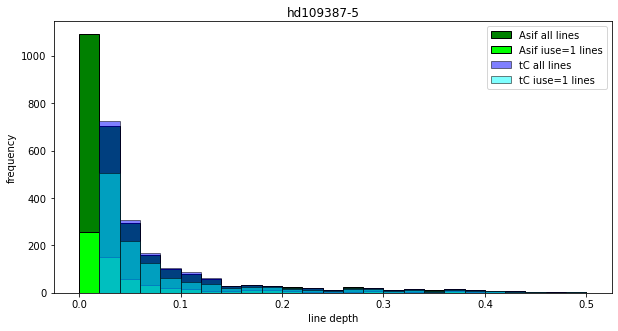

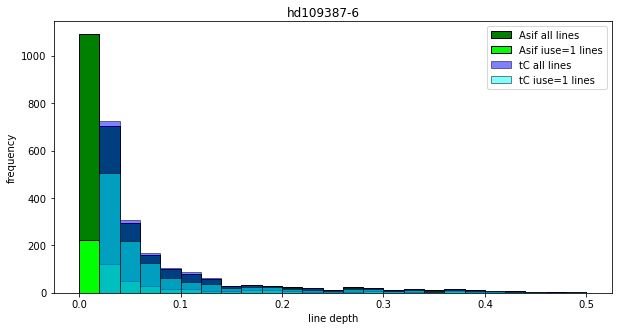

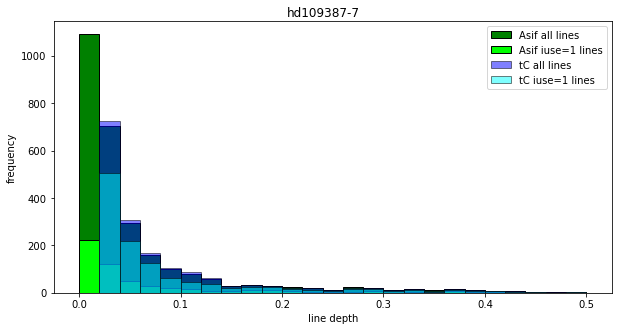

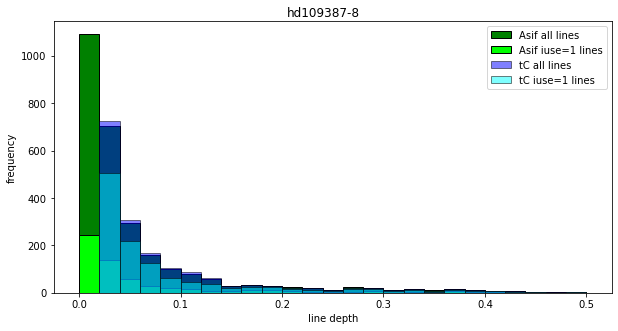

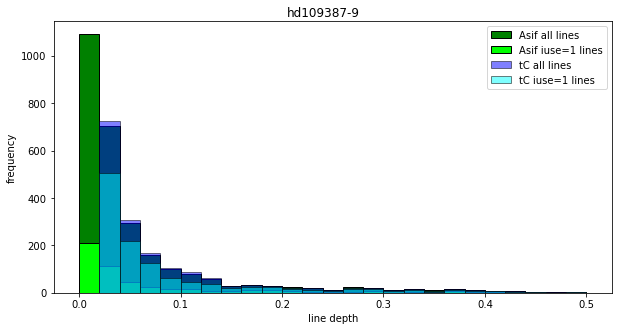

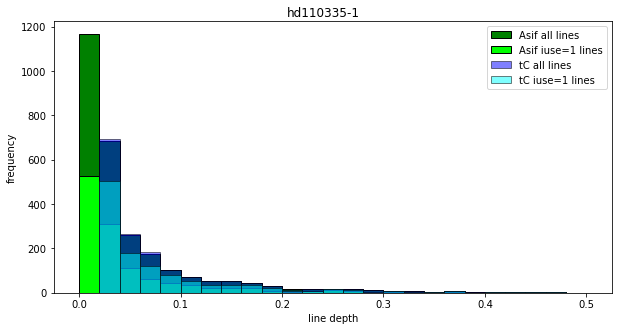

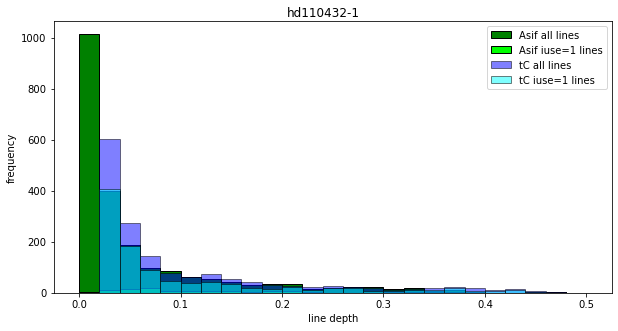

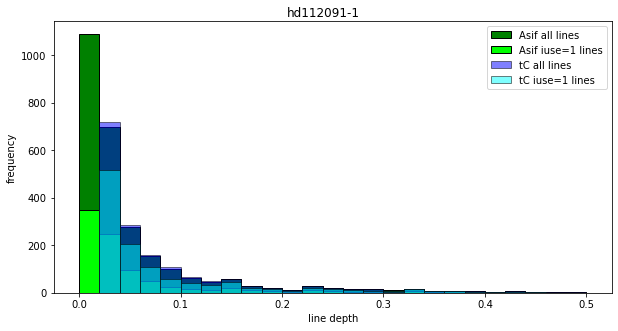

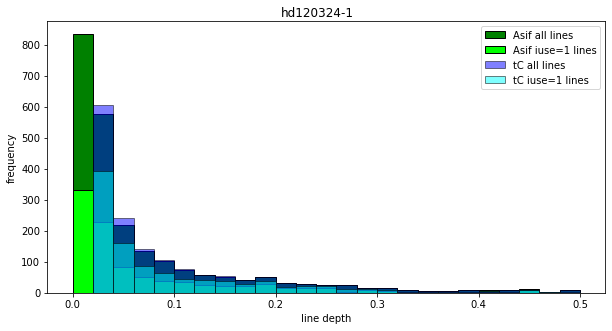

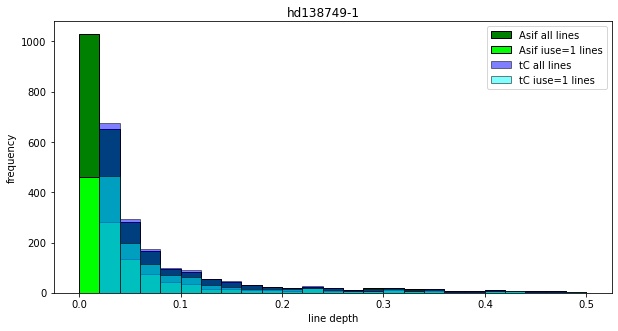

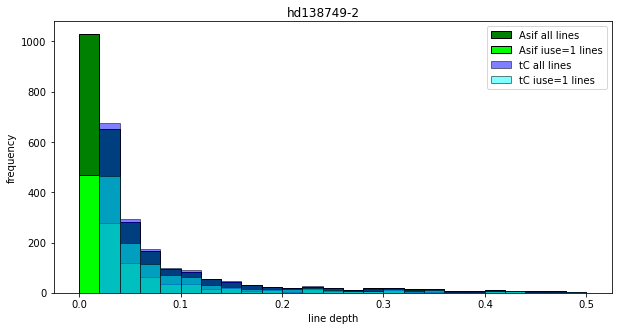

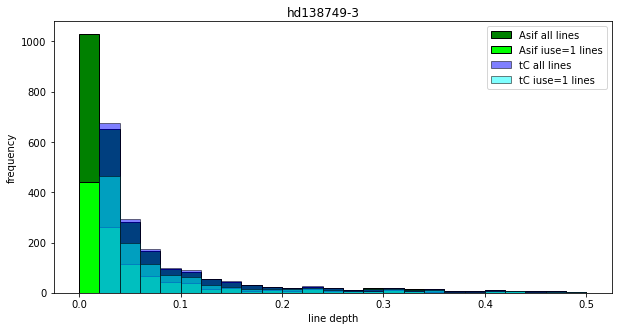

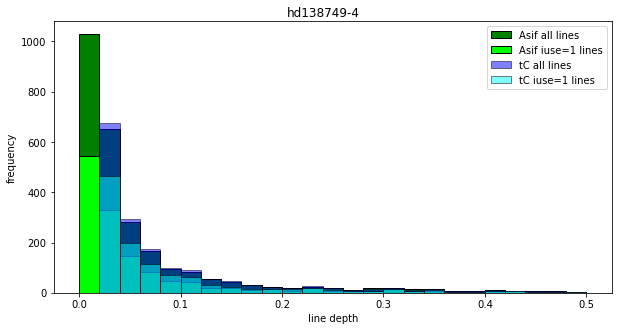

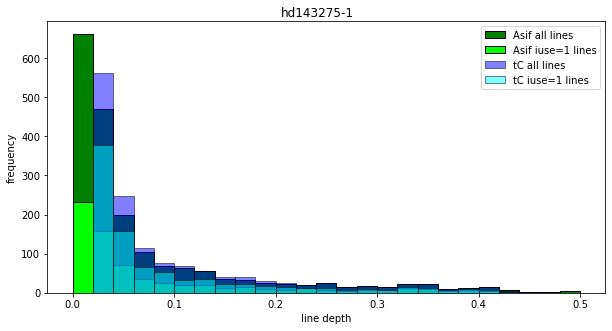

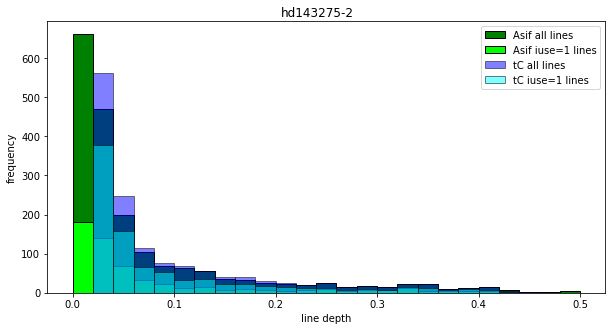

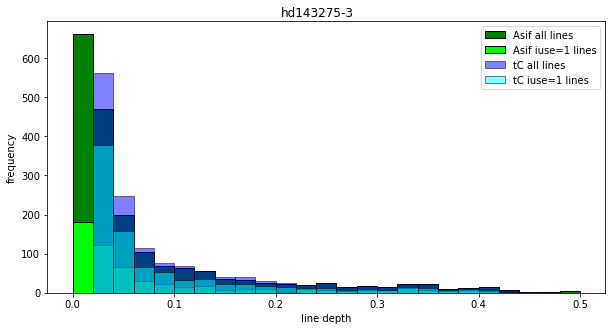

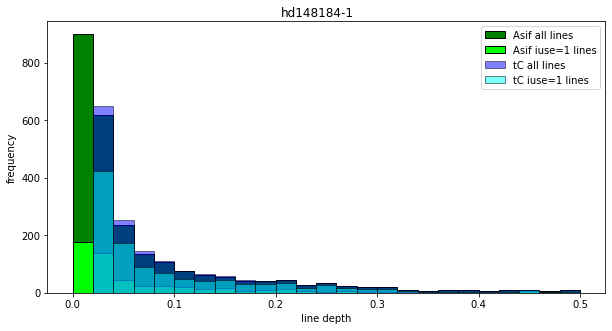

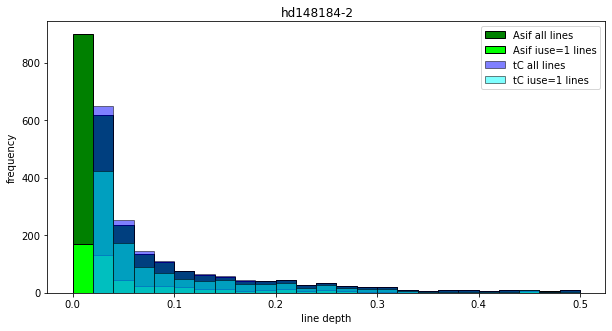

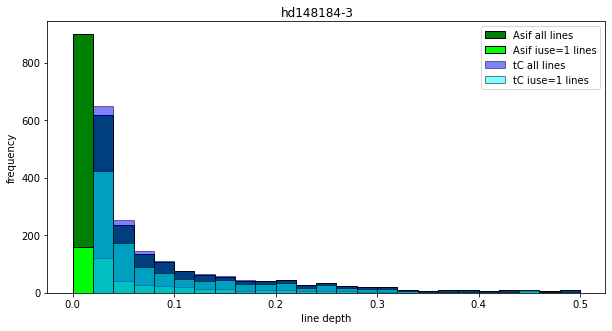

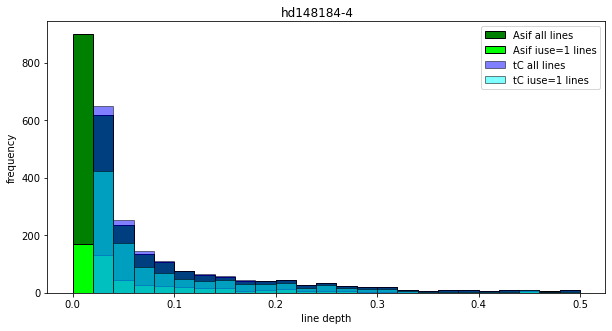

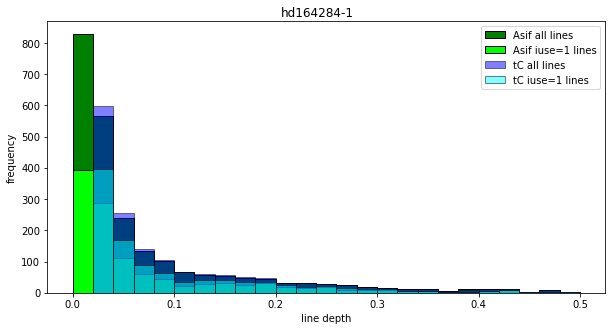

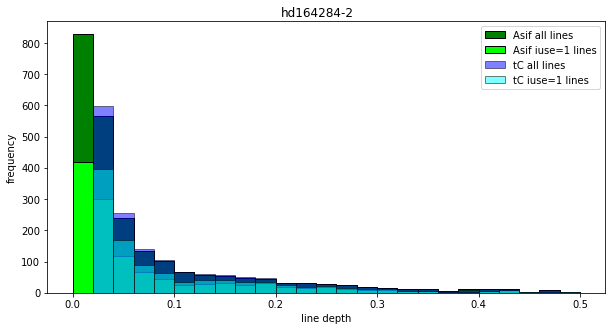

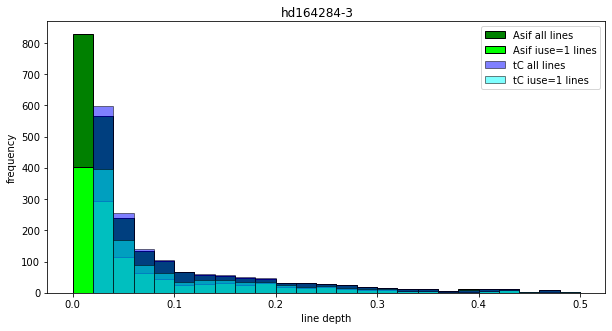

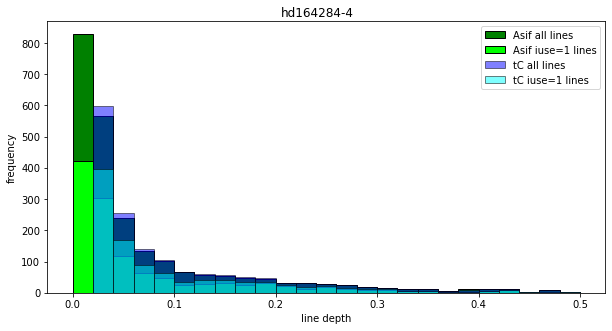

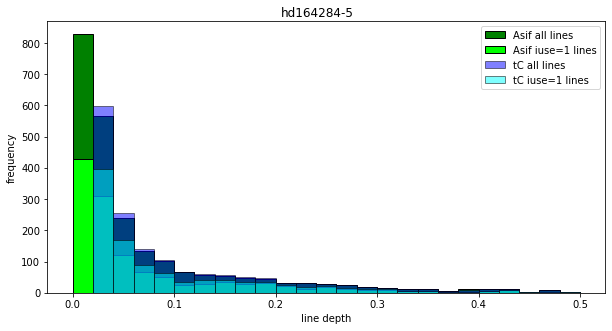

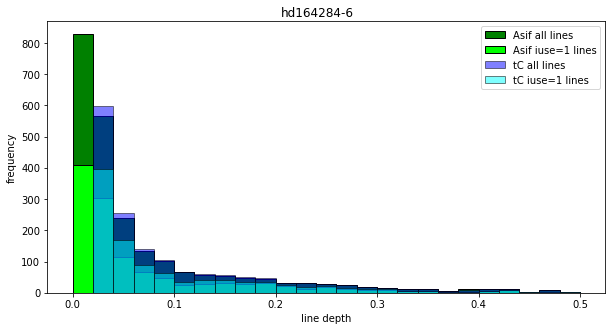

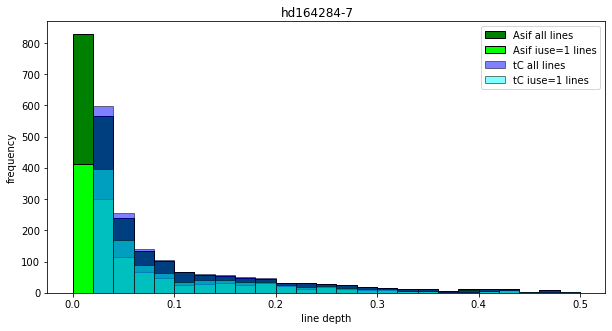

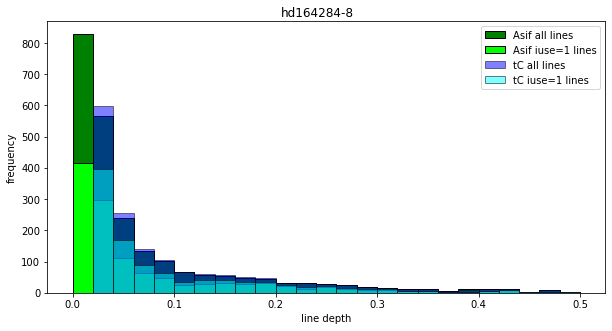

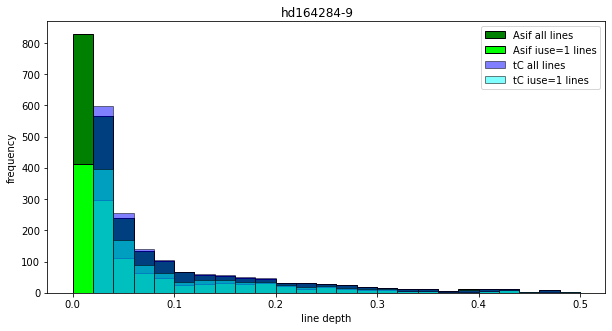

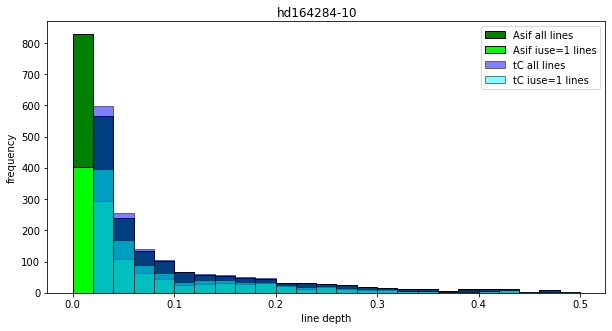

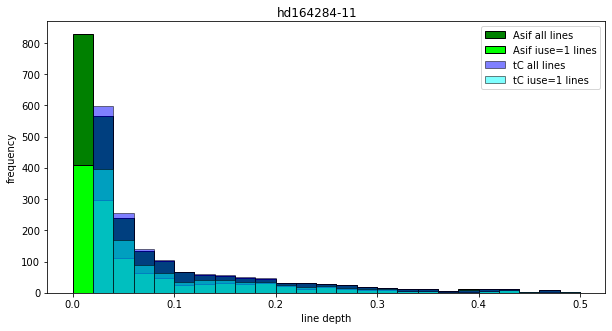

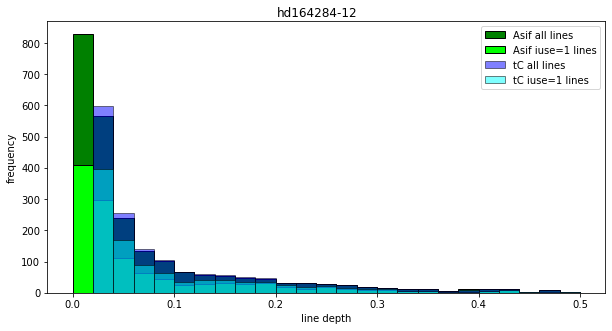

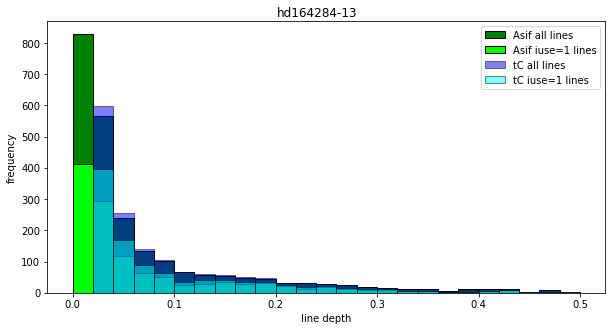

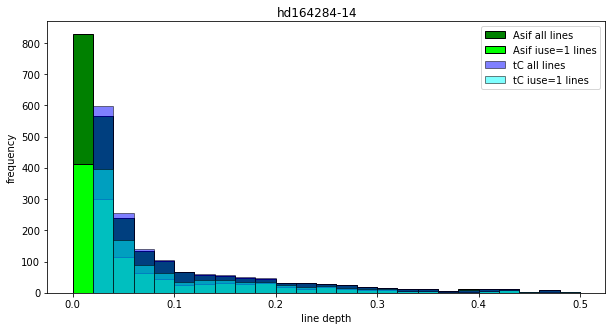

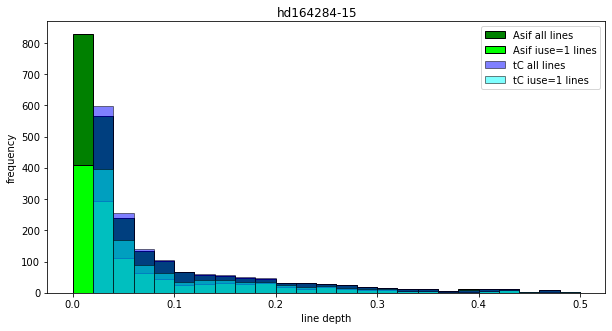

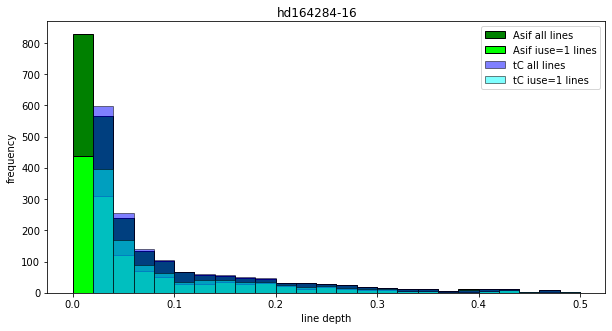

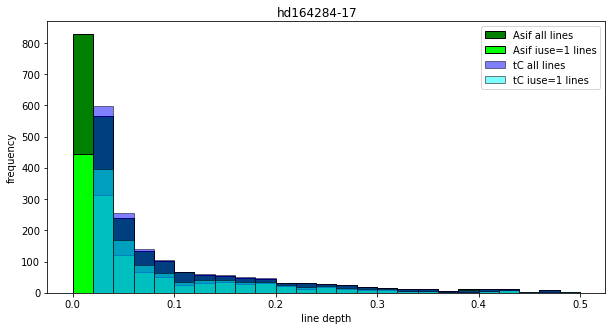

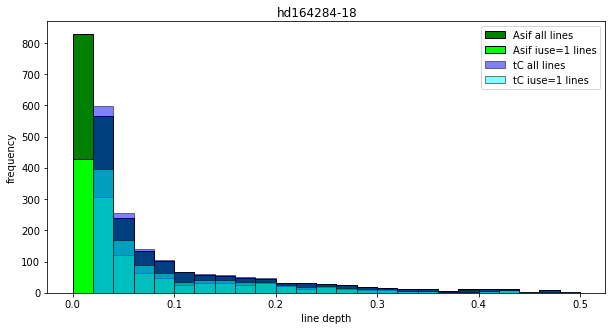

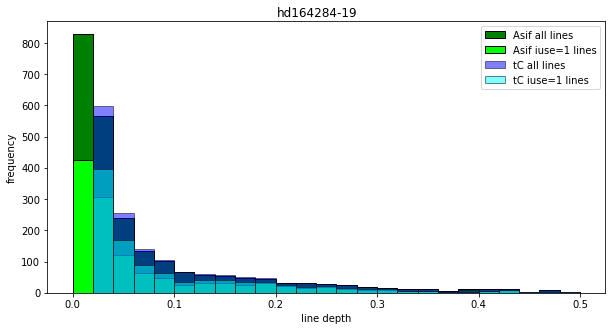

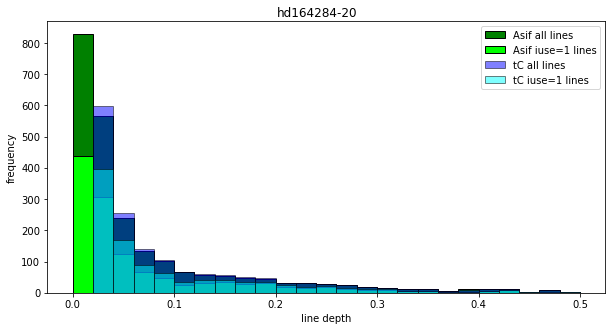

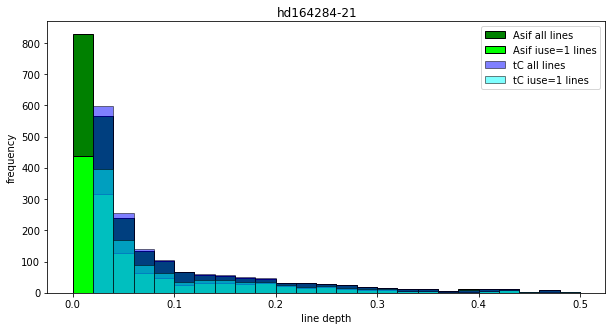

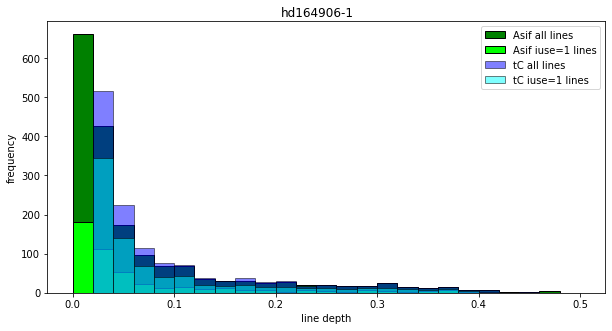

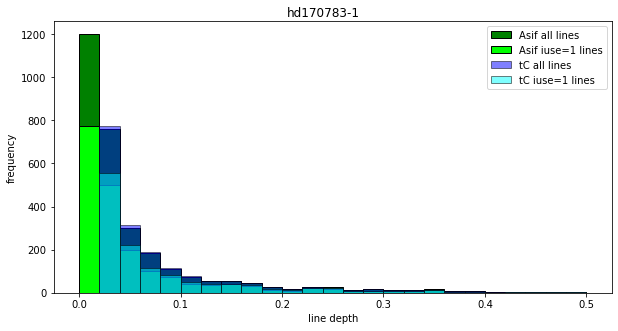

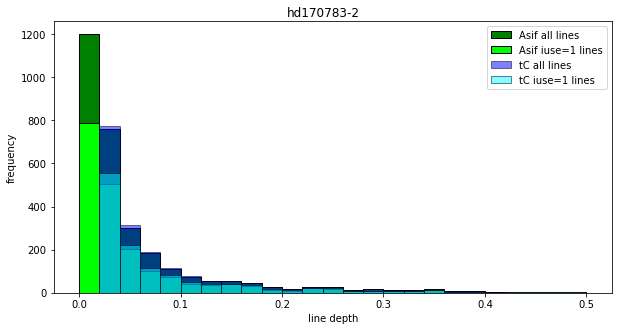

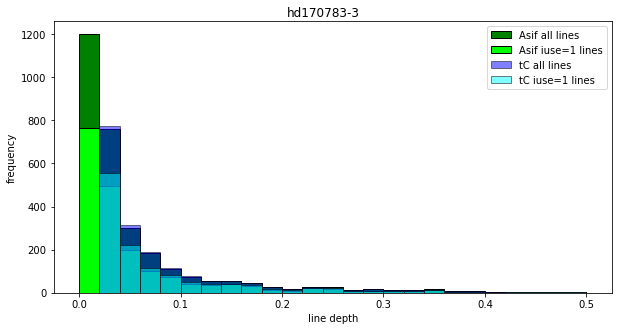

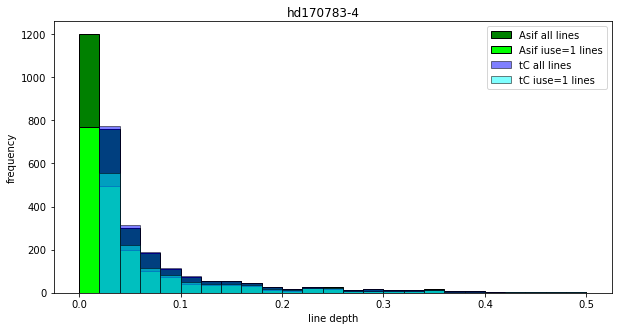

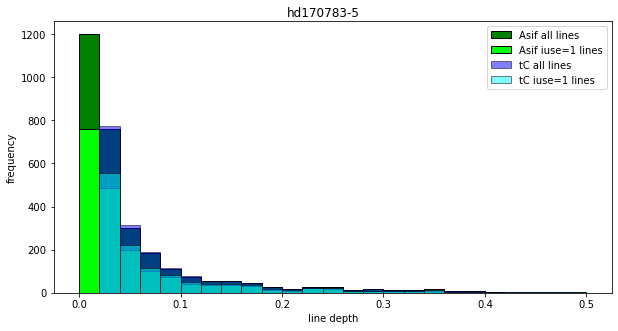

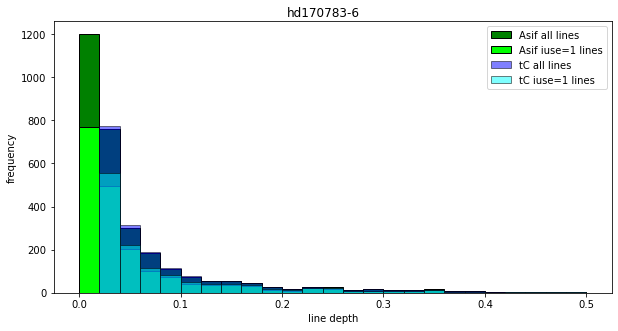

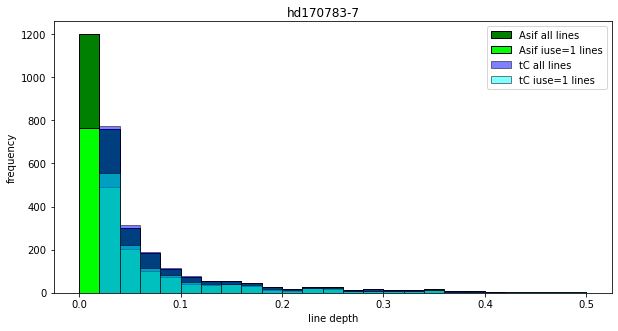

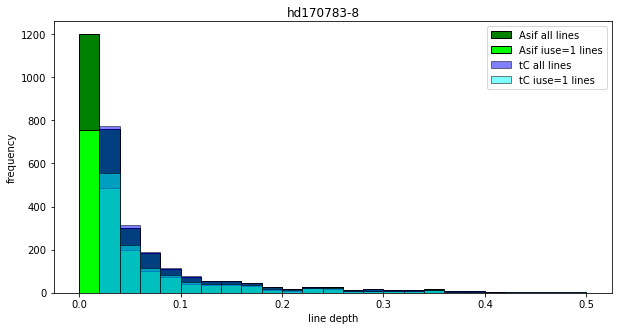

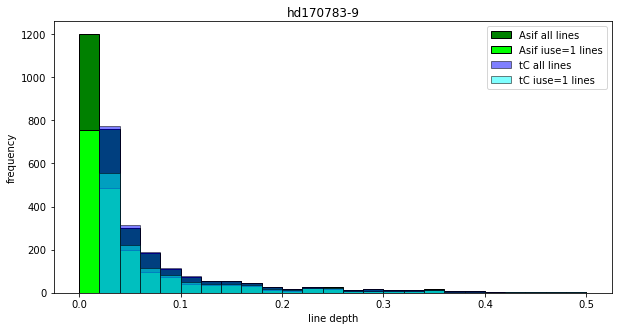

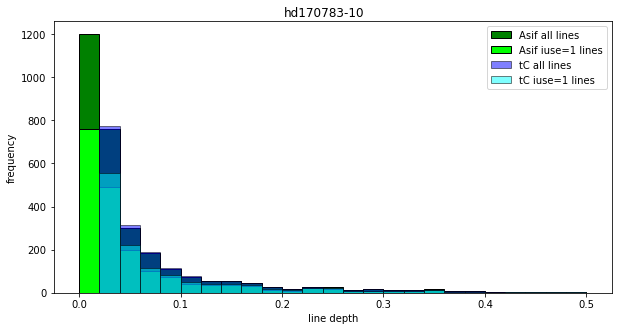

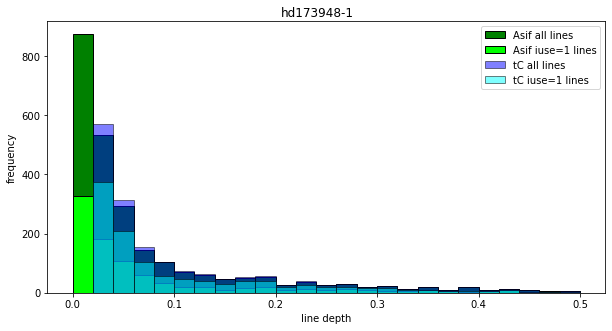

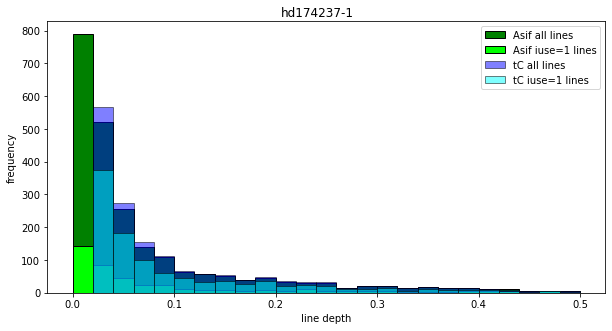

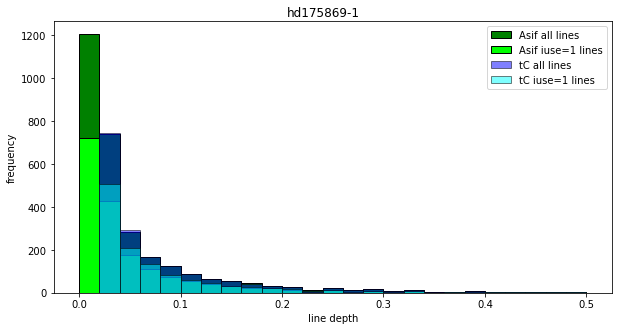

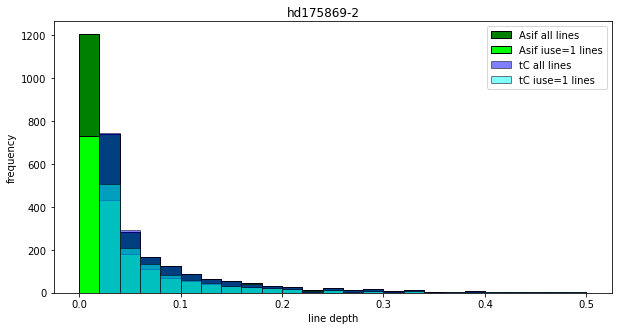

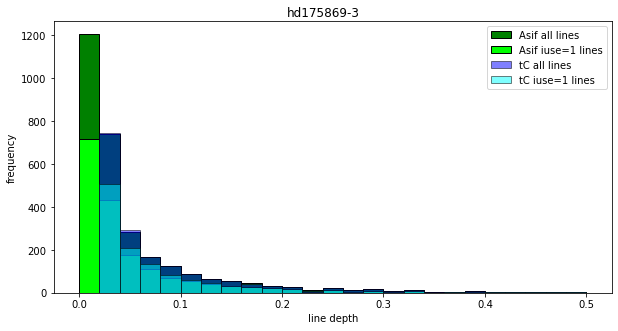

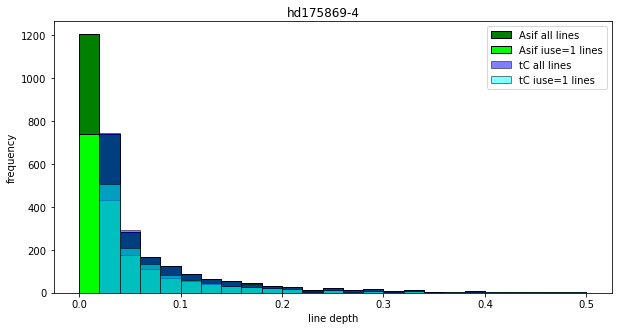

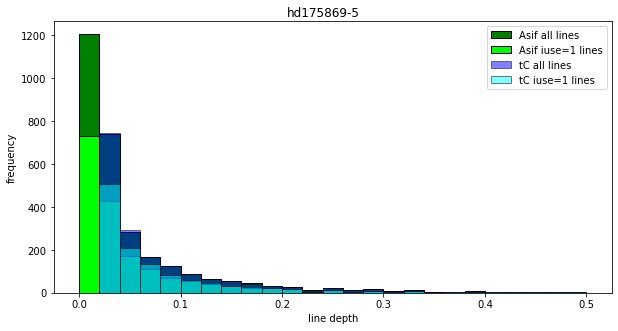

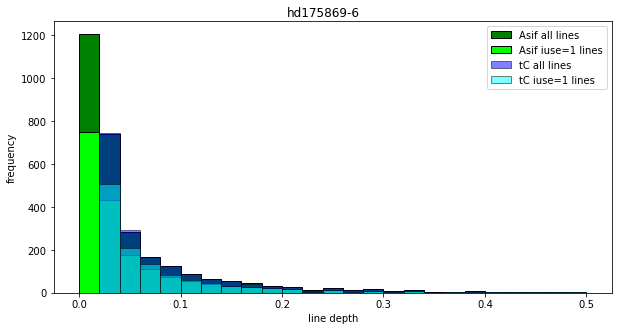

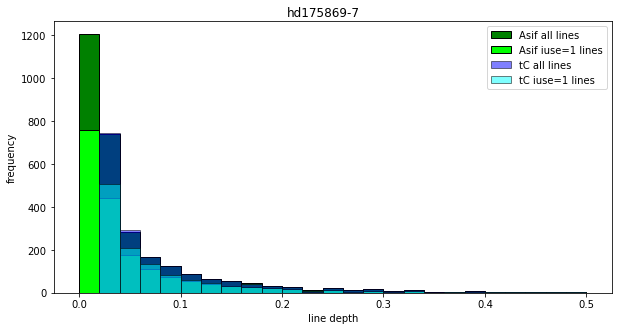

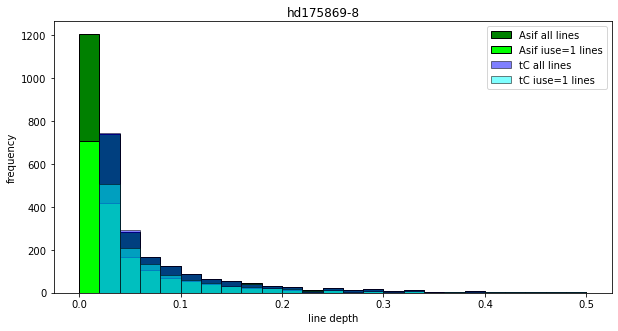

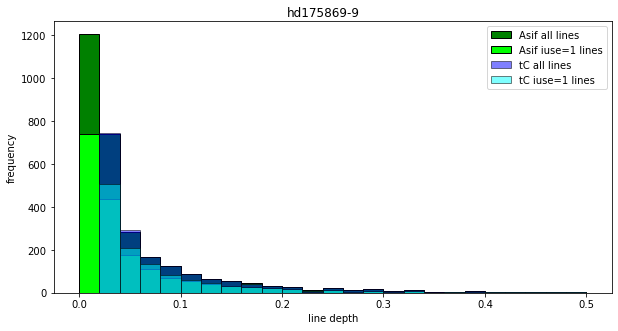

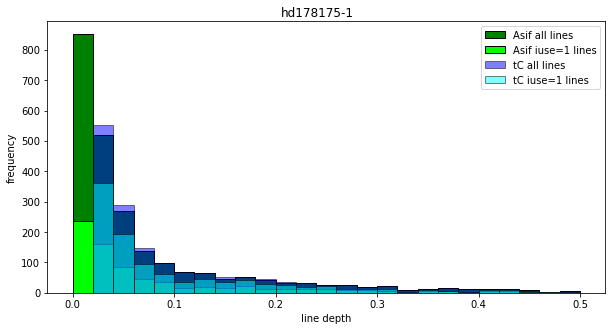

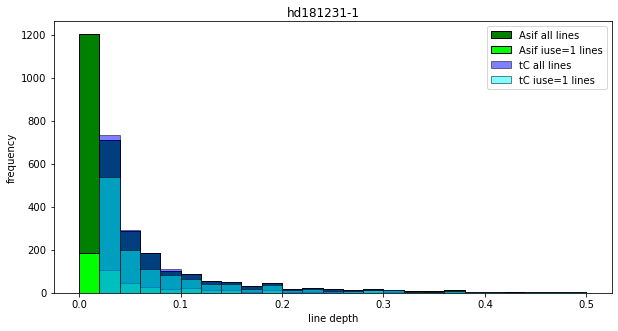

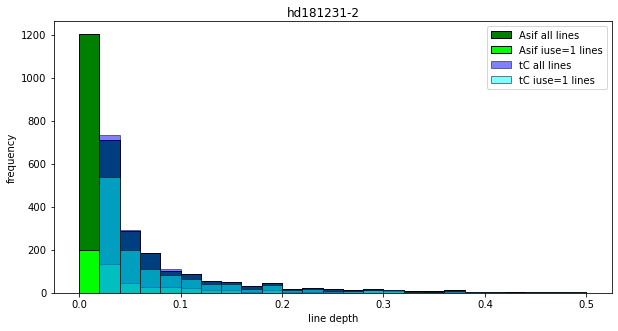

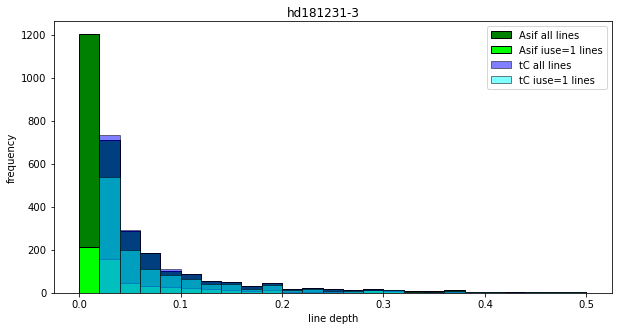

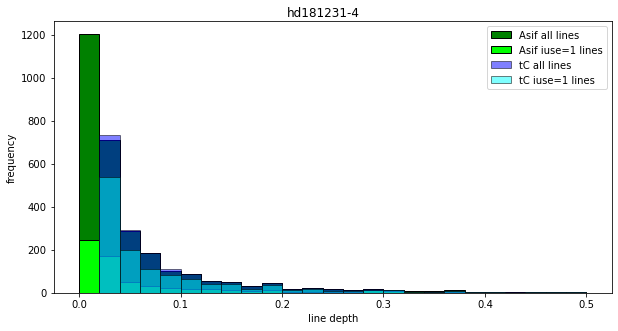

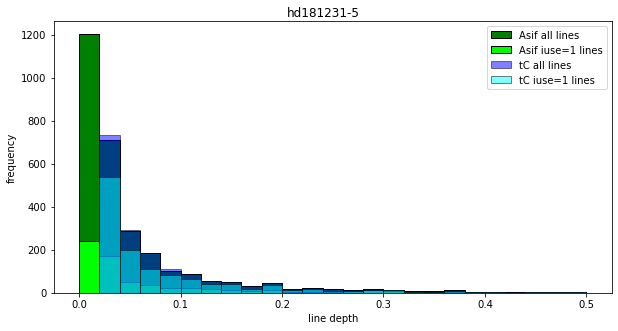

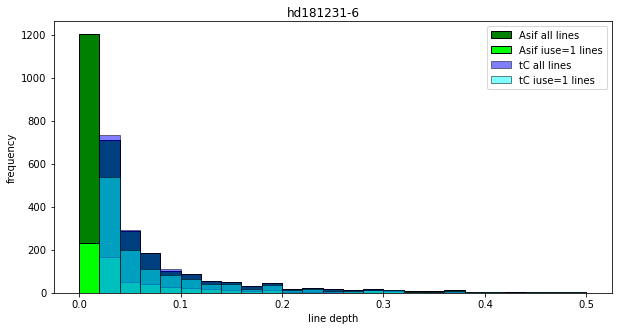

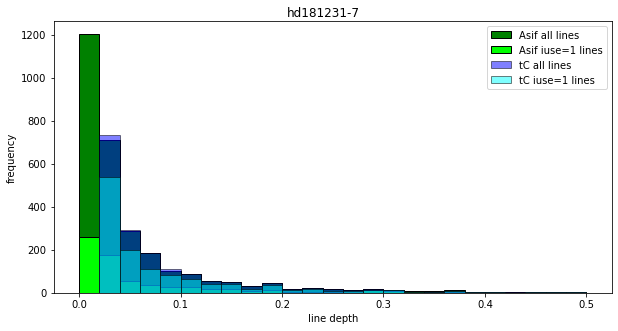

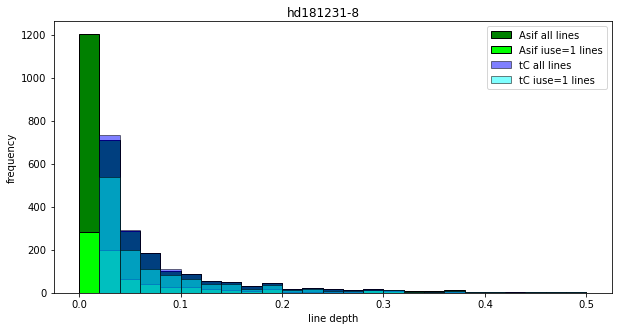

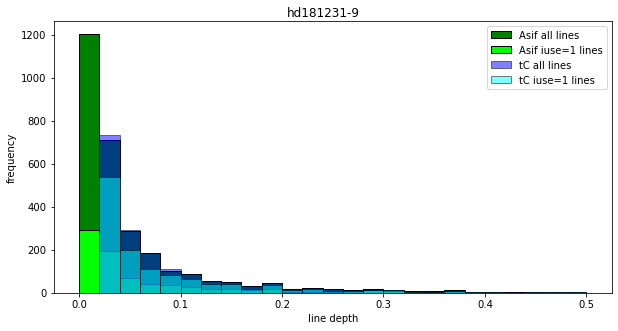

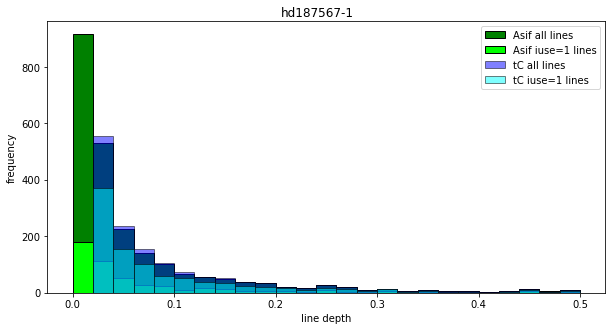

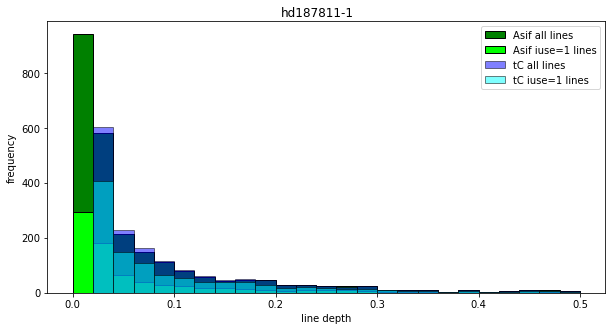

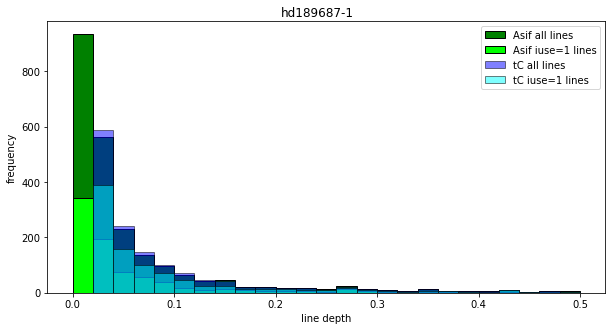

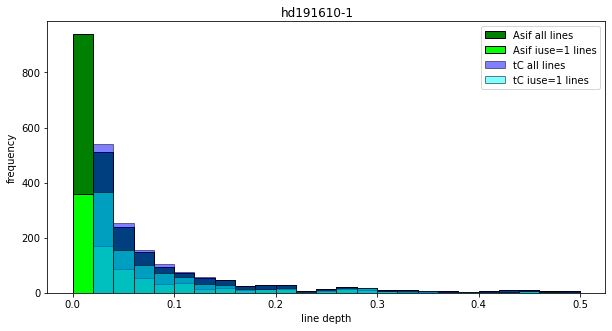

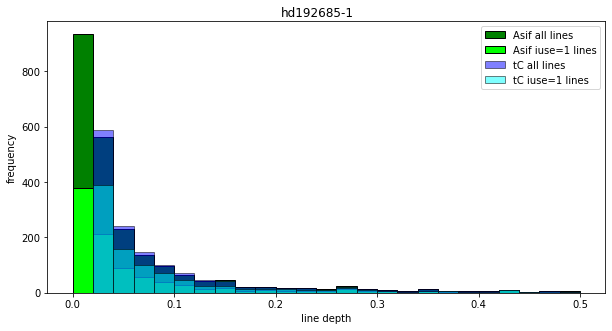

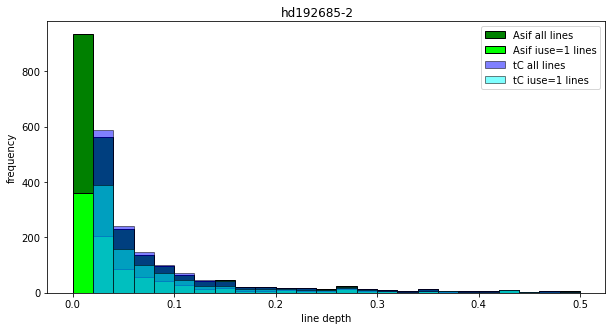

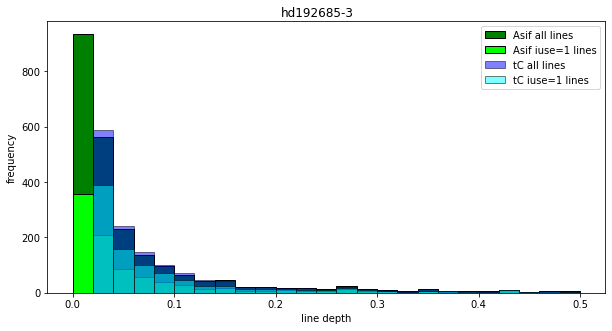

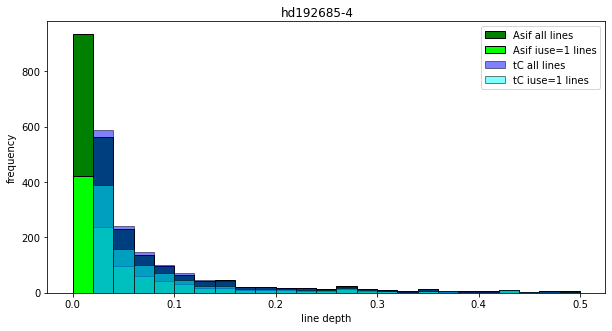

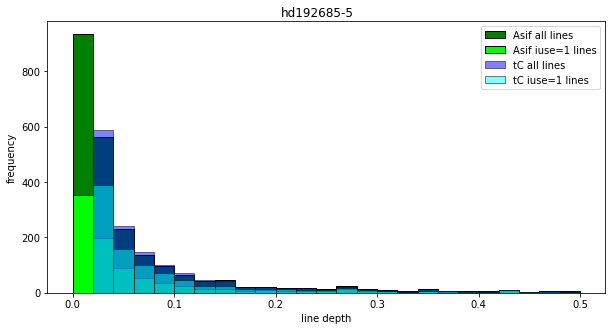

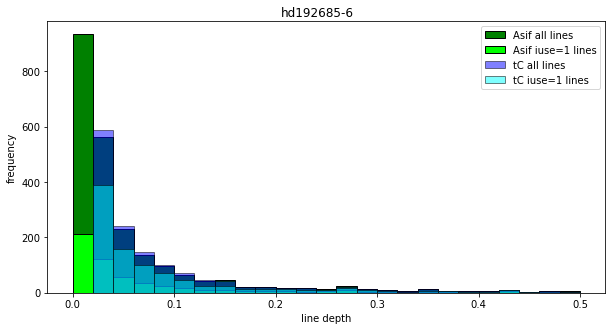

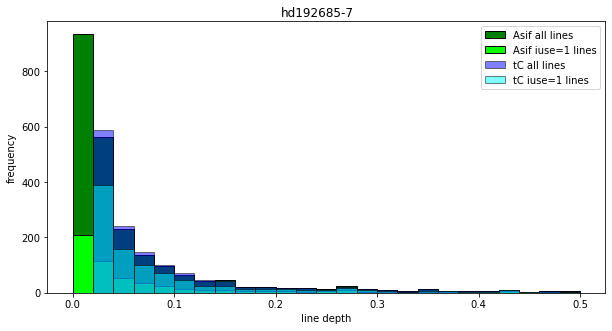

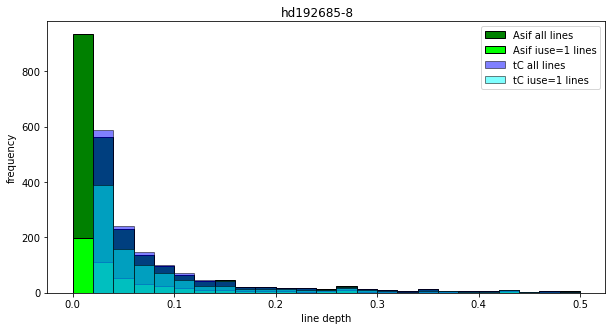

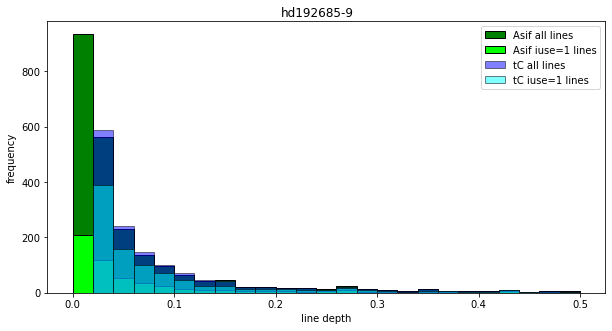

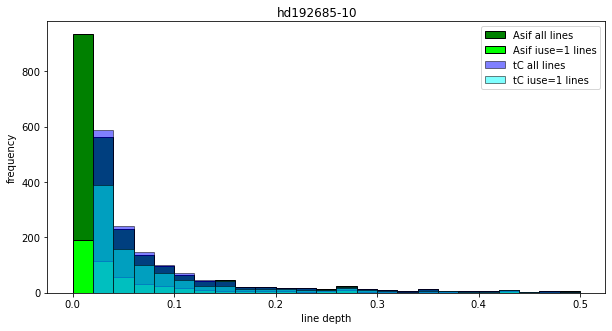

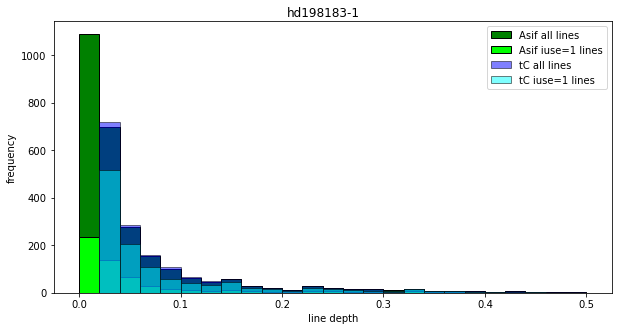

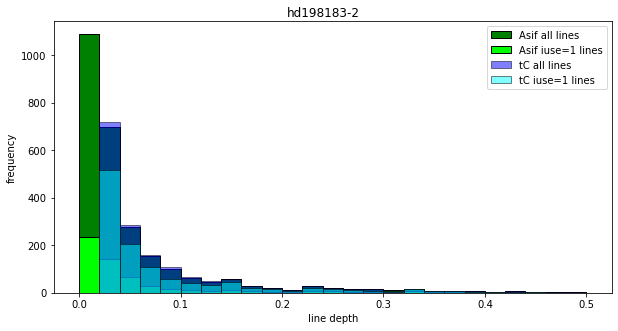

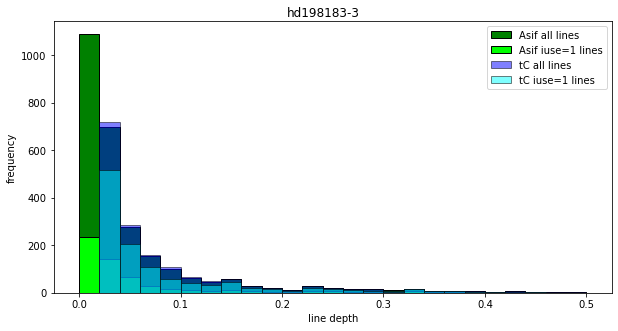

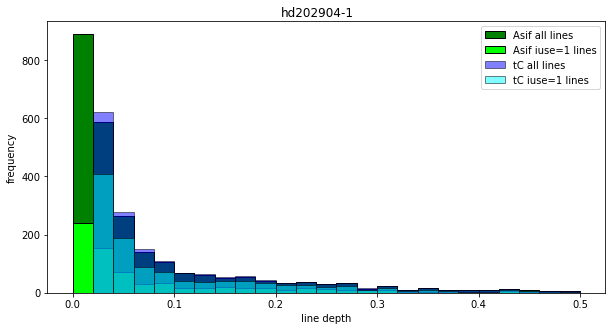

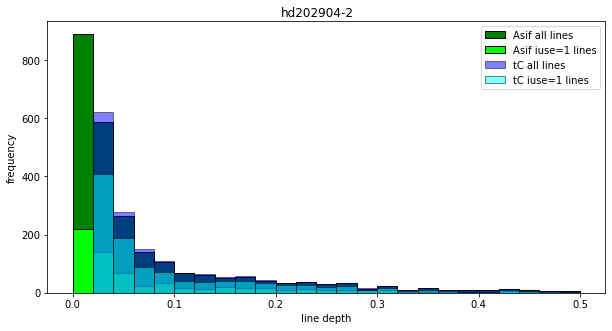

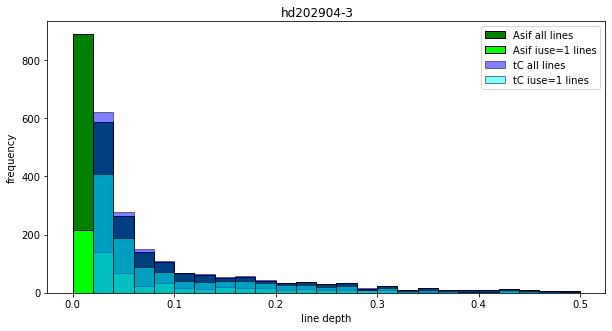

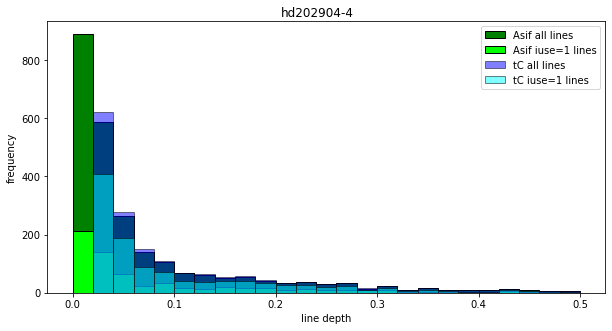

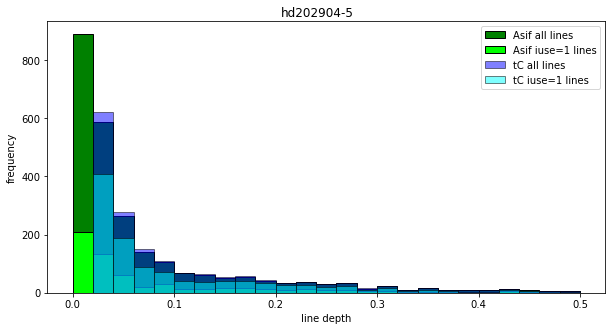

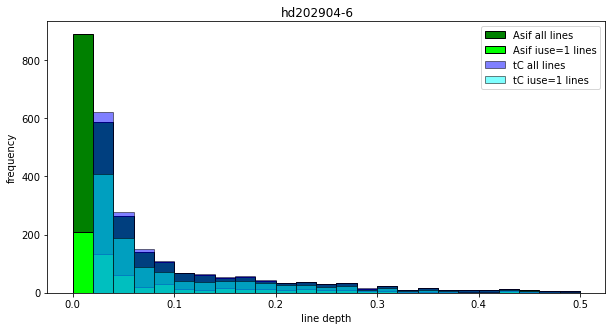

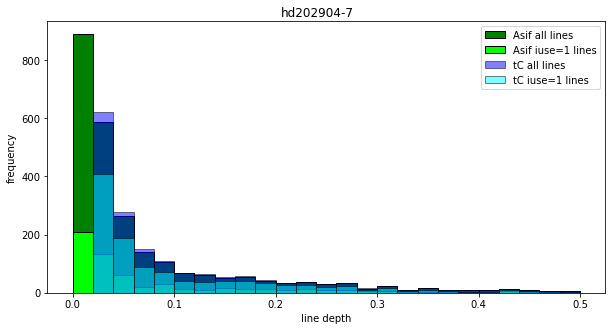

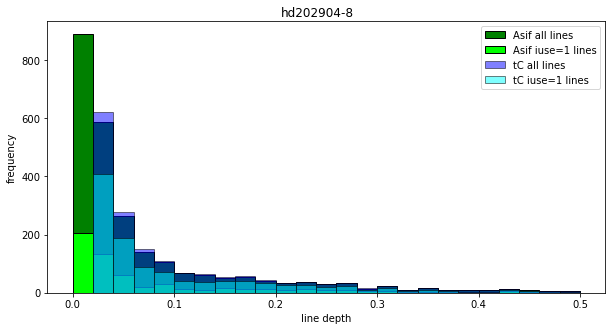

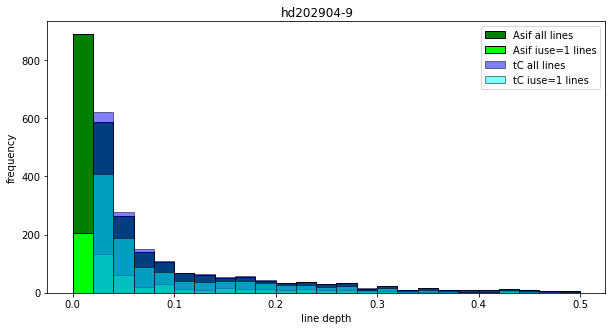

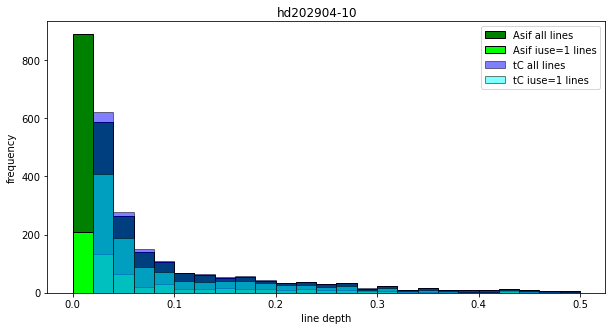

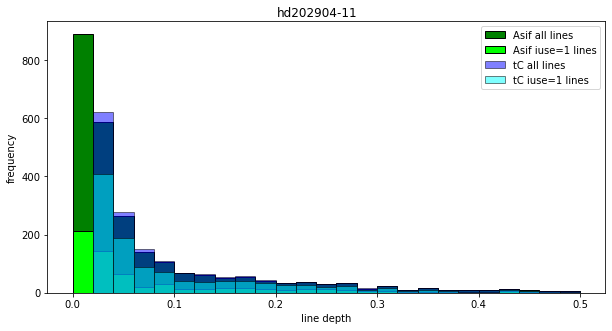

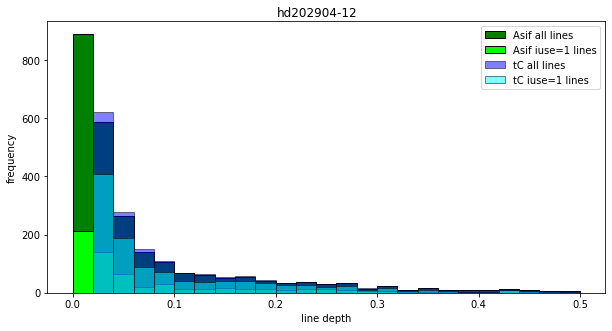

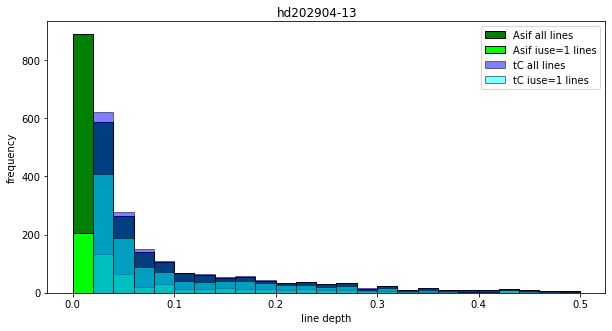

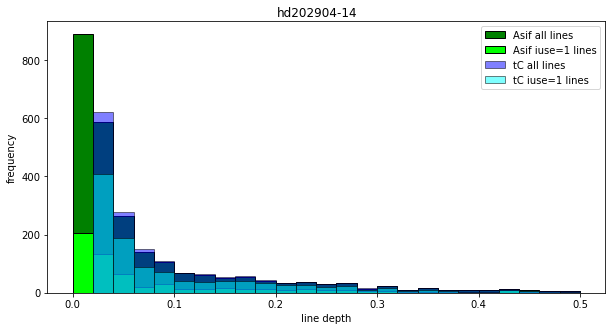

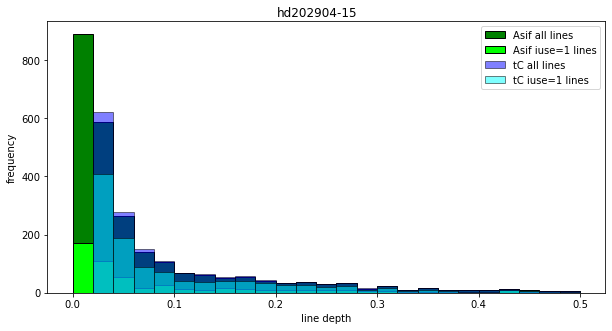

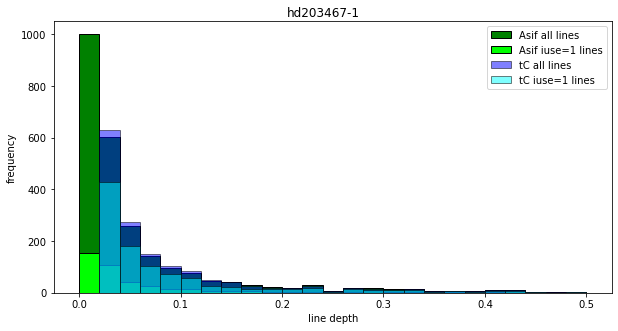

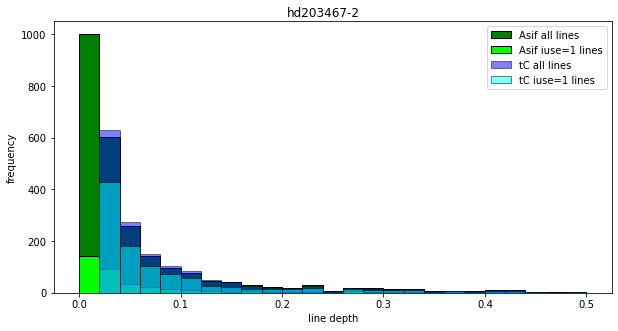

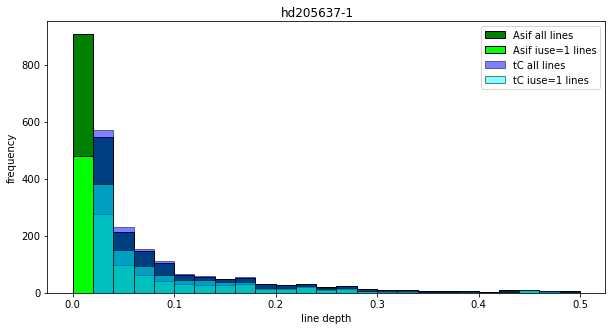

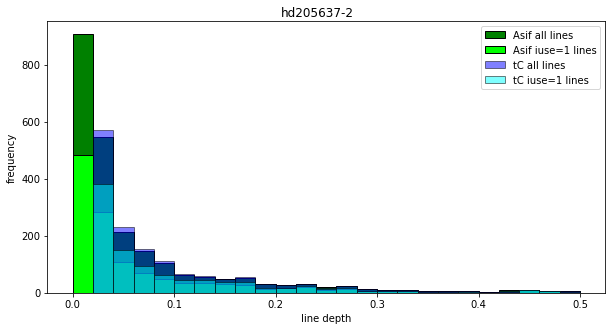

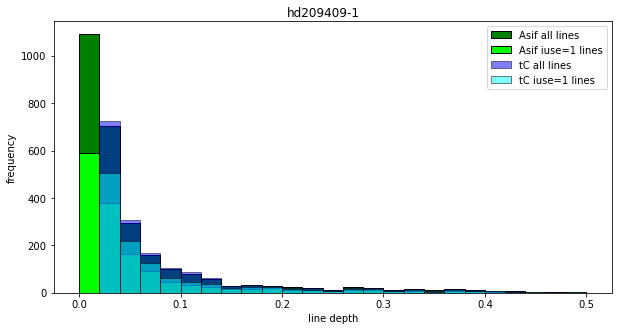

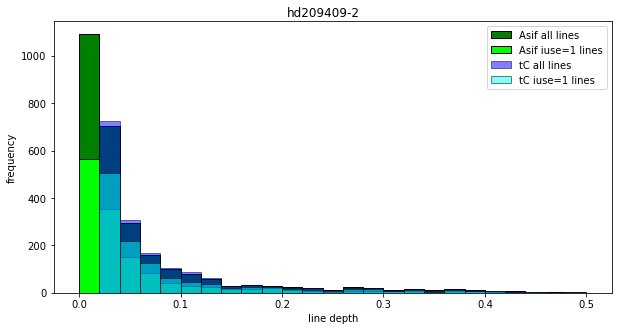

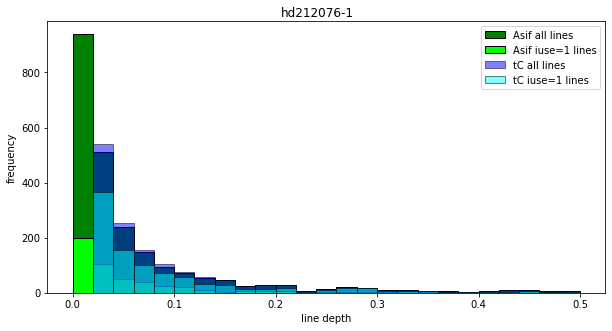

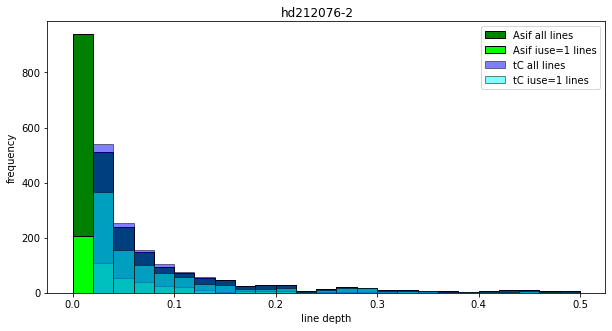

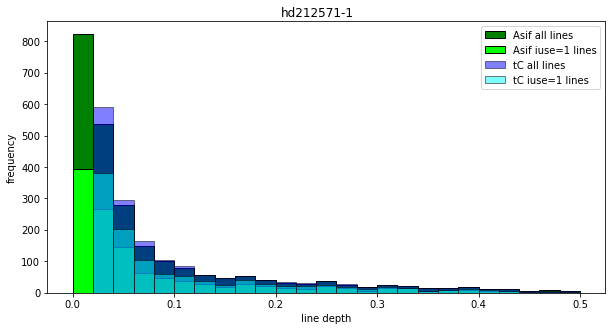

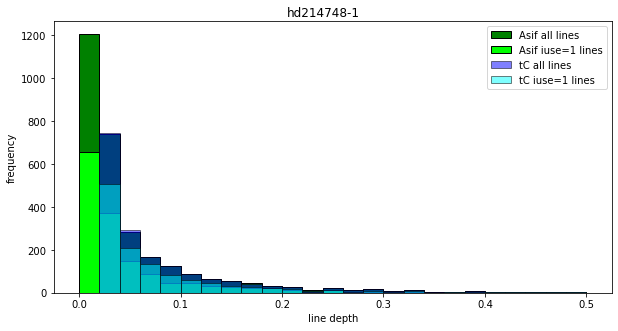

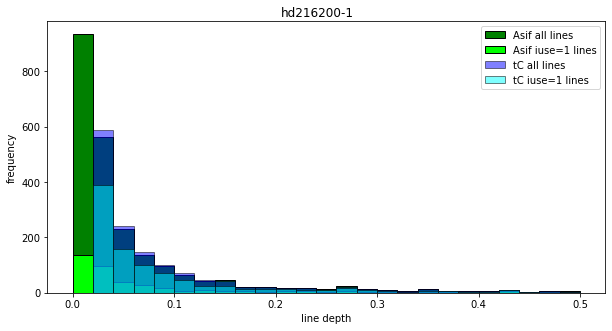

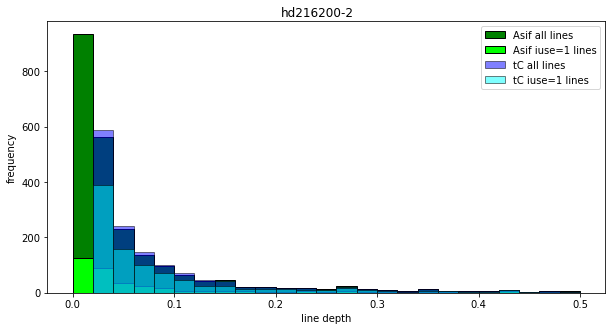

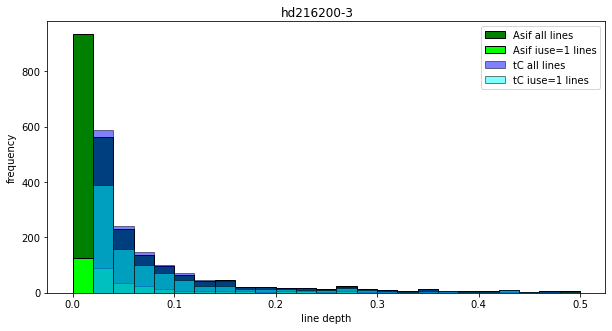

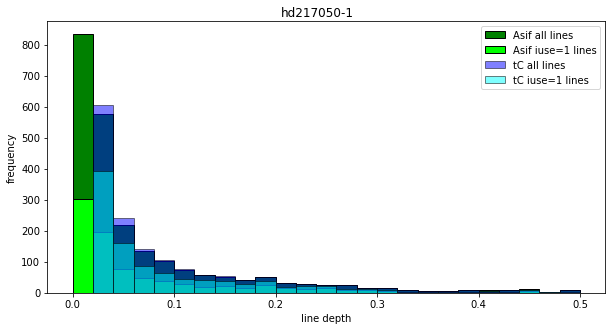

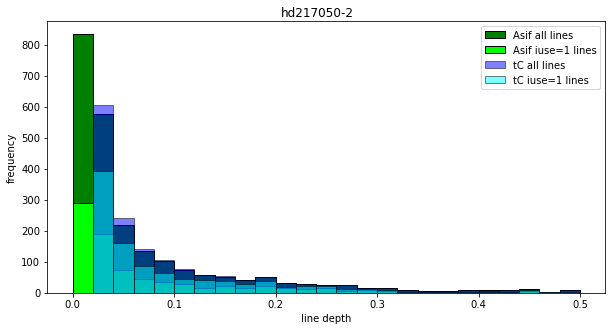

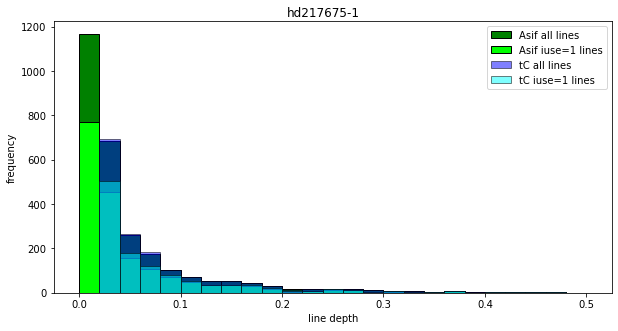

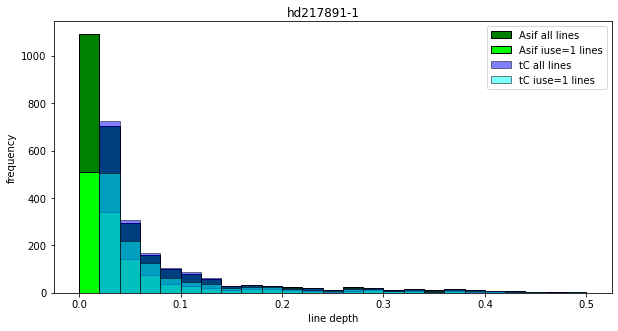

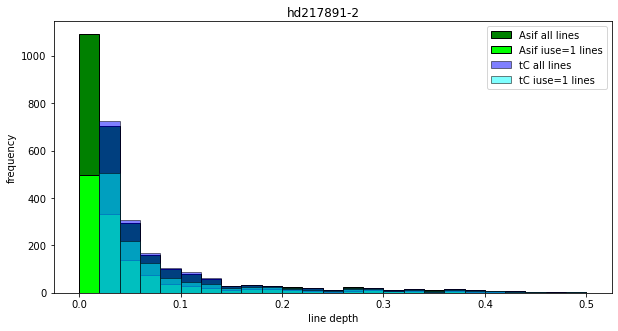

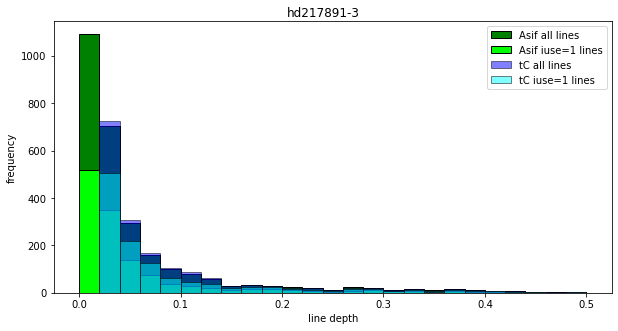

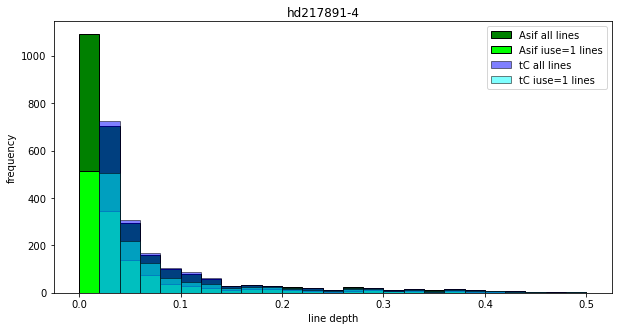

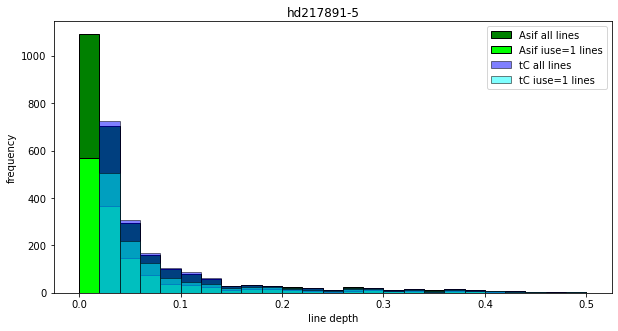

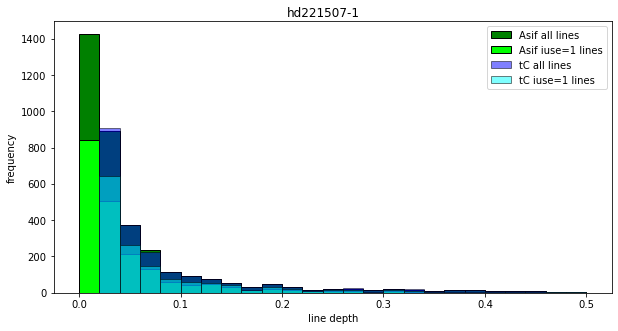

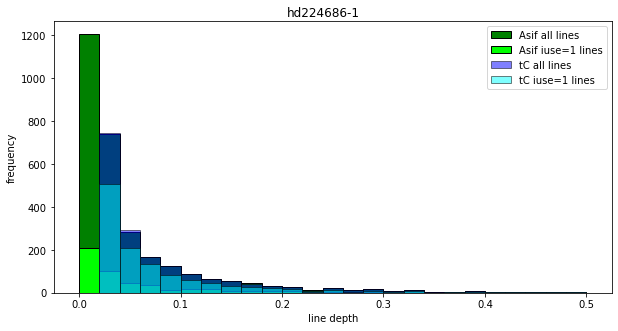

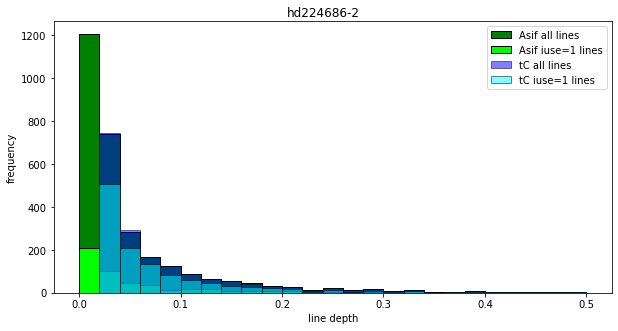

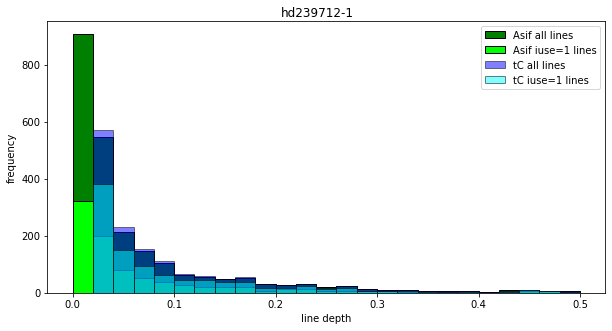

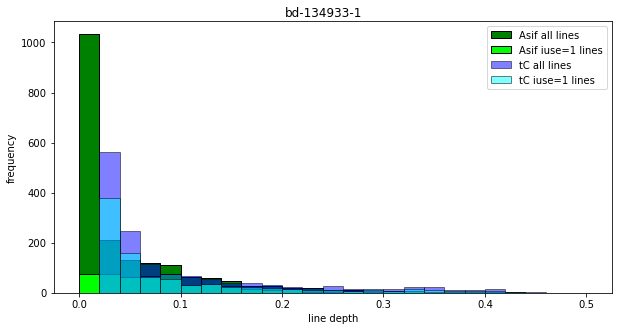

In [17]:



with PdfPages('{}/Mask_depth_hist_AsifClean.pdf'.format(path)) as pdf:
  for i in range(len(StarData["Name"])):

    star = StarData["Name"][i]
    modelcode = StarData["ModelCode"][i].upper()

    for obs in range(1,StarData['Nobs'][i]+1):


      Asif_mask = '{}/02-Mask-calculations/MaskCleaning/AsifMaskClean_tellClean/{}_clean_{}.mask'.format(path,star,obs)

      A_mask = pol.iolsd.read_mask(fname=Asif_mask)

      AM=[]
      for i in range(len(A_mask.iuse)):
        if A_mask.iuse[i] != 0:
          AM.append(A_mask.depth[i])


      if obs==1:
        tellClean_mask = '{}/02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_depth0.02.mask'.format(path,modelcode)
        tC_mask = pol.iolsd.read_mask(fname=tellClean_mask)
        tCM =[]
        for i in range(len(tC_mask.iuse)):
          if tC_mask.iuse[i] != 0:
            tCM.append(tC_mask.depth[i])

      fig, ax = plt.subplots(1,1, figsize=(10,5))

      ax.set_xlabel('line depth')
      ax.set_ylabel('frequency')
      b=25



      ax.hist(A_mask.depth,edgecolor='black',alpha = 1 ,bins=b, color='green',range=[0, 0.5],label='Asif all lines')
      ax.hist(AM,bins=b,edgecolor='black',alpha = 1,color='lime',range=[0, 0.5],label='Asif iuse=1 lines')

      ax.hist(tC_mask.depth,edgecolor='black',bins=b ,color ='blue',alpha = 0.5 ,range=[0, 0.5],label='tC all lines')
      ax.hist(tCM,bins=b,edgecolor='black' ,color = 'cyan',alpha = 0.5 ,range=[0, 0.5] ,label ='tC iuse=1 lines')

      ax.legend()
      fig.suptitle(star + '-'+ str(obs),y=0.92)

      pdf.savefig(fig)